In [ ]:
!git clone https://github.com/JingweiToo/Wrapper-Feature-Selection-Toolbox-Python.git

Cloning into 'Wrapper-Feature-Selection-Toolbox-Python'...
remote: Enumerating objects: 61, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 163 (delta 38), reused 0 (delta 0), pack-reused 102
Receiving objects: 100% (163/163), 81.66 KiB | 2.72 MiB/s, done.
Resolving deltas: 100% (101/101), done.


In [ ]:
cd Wrapper-Feature-Selection-Toolbox-Python/

/content/Wrapper-Feature-Selection-Toolbox-Python


In [ ]:
ls

Demo_PSO.py  Description.md  FS/  ionosphere.csv  LICENSE  README.md


In [ ]:
cd /content/drive/My Drive/FYP/Wrapper-Feature-Selection-Toolbox-Python-main (copy)/

/content/drive/My Drive/FYP/Wrapper-Feature-Selection-Toolbox-Python-main (copy)


## DUMMIES

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os

# load data
ds_name='SRBCT'
data  = pd.read_csv(('/content/drive/My Drive/FYP/Dataset/%s.csv')%(ds_name))
df=data
data  = data.values
feat  = np.asarray(data[:, 0:-1])   # feature vector
label = np.asarray(data[:, -1])     # label vector
n_samples,n_features=data.shape
# split data into train & validation (70 -- 30)
xtrain, xtest, ytrain, ytest = train_test_split(feat, label, test_size=0.3)
fold = {'xt':xtrain, 'yt':ytrain, 'xv':xtest, 'yv':ytest}


## creating directories

if not os.path.exists(('/content/drive/My Drive/FYP/Existing')):
  os.makedirs(('/content/drive/My Drive/FYP/Existing'))




## Particle Swarm Optimization ( PSO )
c=None
rt=None
algo_name='PSO'
if not os.path.exists((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name))):
  os.makedirs((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)))

hp=('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)
if not os.path.exists(('%s/%s')%(hp,ds_name)):
    reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
    results_csv=(('%s/%s/results_csv')%(hp,ds_name))
    temp_storage=('%s/%s/temp')%(hp,ds_name)
    results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
    os.makedirs(('%s/%s')%(hp,ds_name))
    os.makedirs(reduced_datasets)
    os.makedirs(results_csv)
    os.makedirs(results_graphs)
    os.makedirs(temp_storage)
  
else:
  print("Error Already File Exists!!!!")
  reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
  results_csv=(('%s/%s/results_csv')%(hp,ds_name))
  temp_storage=('%s/%s/temp')%(hp,ds_name)
  results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
  import sys
  #sys.exit("Error message")



# from FS.pso import jfs 
# from FS.utility import *
# parameter
k    = 5     # k-value in KNN
N    = 100    # number of particles
T    = 30   # maximum number of iterations
w    = 0.9
c1   = 2
c2   = 2
opts = {'k':k, 'fold':fold, 'N':N, 'T':T, 'w':w, 'c1':c1, 'c2':c2}

# perform feature selection
PSO(feat, label, opts)
plot_pdf('naive bayes')
plot_pdf('tree')
plot_pdf('svm_linear')
plot_pdf('knn')

print("For Naive Bayes")
mean_clf('naive bayes')
print("\nFor Tree")
mean_clf('tree')
print("\nFor SVM Linear")
mean_clf('svm_linear')
print("\nFor KNN")
mean_clf('knn')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os

# load data
ds_name='SRBCT'
data  = pd.read_csv(('/content/drive/My Drive/FYP/Dataset/%s.csv')%(ds_name))
df=data
data  = data.values
feat  = np.asarray(data[:, 0:-1])   # feature vector
label = np.asarray(data[:, -1])     # label vector
n_samples,n_features=data.shape
# split data into train & validation (70 -- 30)
xtrain, xtest, ytrain, ytest = train_test_split(feat, label, test_size=0.3)
fold = {'xt':xtrain, 'yt':ytrain, 'xv':xtest, 'yv':ytest}


## creating directories

if not os.path.exists(('/content/drive/My Drive/FYP/Existing')):
  os.makedirs(('/content/drive/My Drive/FYP/Existing'))
c=None
rt=None
algo_name='GA'
if not os.path.exists((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name))):
  os.makedirs((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)))

hp=('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)
if not os.path.exists(('%s/%s')%(hp,ds_name)):
    reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
    results_csv=(('%s/%s/results_csv')%(hp,ds_name))
    temp_storage=('%s/%s/temp')%(hp,ds_name)
    results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
    os.makedirs(('%s/%s')%(hp,ds_name))
    os.makedirs(reduced_datasets)
    os.makedirs(results_csv)
    os.makedirs(results_graphs)
    os.makedirs(temp_storage)
  
else:
  print("Error Already File Exists!!!!")
  reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
  results_csv=(('%s/%s/results_csv')%(hp,ds_name))
  temp_storage=('%s/%s/temp')%(hp,ds_name)
  results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
  import sys
  #sys.exit("Error message")
## Genetic Algorithm ( GA )

#from FS.ga import jfs 
# parameter
k    = 5     # k-value in KNN
N    = 100    # number of chromosomes
T    = 30   # maximum number of generations
CR   = 0.8
MR   = 0.01
opts = {'k':k, 'fold':fold, 'N':N, 'T':T, 'CR':CR, 'MR':MR}

# perform feature selection
GA(feat, label, opts)
plot_pdf('naive bayes')
plot_pdf('tree')
plot_pdf('svm_linear')
plot_pdf('knn')

print("For Naive Bayes")
mean_clf('naive bayes')
print("\nFor Tree")
mean_clf('tree')
print("\nFor SVM Linear")
mean_clf('svm_linear')
print("\nFor KNN")
mean_clf('knn')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os

# load data
ds_name='SRBCT'
data  = pd.read_csv(('/content/drive/My Drive/FYP/Dataset/%s.csv')%(ds_name))
df=data
data  = data.values
feat  = np.asarray(data[:, 0:-1])   # feature vector
label = np.asarray(data[:, -1])     # label vector
n_samples,n_features=data.shape
# split data into train & validation (70 -- 30)
xtrain, xtest, ytrain, ytest = train_test_split(feat, label, test_size=0.3)
fold = {'xt':xtrain, 'yt':ytrain, 'xv':xtest, 'yv':ytest}


## creating directories

if not os.path.exists(('/content/drive/My Drive/FYP/Existing')):
  os.makedirs(('/content/drive/My Drive/FYP/Existing'))
c=None
rt=None
algo_name='FA'
if not os.path.exists((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name))):
  os.makedirs((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)))

hp=('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)
if not os.path.exists(('%s/%s')%(hp,ds_name)):
    reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
    results_csv=(('%s/%s/results_csv')%(hp,ds_name))
    temp_storage=('%s/%s/temp')%(hp,ds_name)
    results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
    os.makedirs(('%s/%s')%(hp,ds_name))
    os.makedirs(reduced_datasets)
    os.makedirs(results_csv)
    os.makedirs(results_graphs)
    os.makedirs(temp_storage)
  
else:
  print("Error Already File Exists!!!!")
  reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
  results_csv=(('%s/%s/results_csv')%(hp,ds_name))
  temp_storage=('%s/%s/temp')%(hp,ds_name)
  results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
  import sys
  #sys.exit("Error message")
## Firefly Algorithm (FA)

#from FS.fa import jfs 
# parameter
k    = 5     # k-value in KNN
N    = 100    # number of chromosomes
T    = 30   # maximum number of generations
alpha  = 1       # constant
beta0  = 1       # light amplitude
gamma  = 1       # absorbtion coefficient
theta  = 0.97    # control alpha
opts = {'k':k, 'fold':fold, 'N':N, 'T':T, 'alpha':alpha, 'beta0':beta0, 'gamma':gamma, 'theta':theta}

# perform feature selection
FA(feat, label, opts)
plot_pdf('naive bayes')
plot_pdf('tree')
plot_pdf('svm_linear')
plot_pdf('knn')

print("For Naive Bayes")
mean_clf('naive bayes')
print("\nFor Tree")
mean_clf('tree')
print("\nFor SVM Linear")
mean_clf('svm_linear')
print("\nFor KNN")
mean_clf('knn')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os

# load data
ds_name='SRBCT'
data  = pd.read_csv(('/content/drive/My Drive/FYP/Dataset/%s.csv')%(ds_name))
df=data
data  = data.values
feat  = np.asarray(data[:, 0:-1])   # feature vector
label = np.asarray(data[:, -1])     # label vector
n_samples,n_features=data.shape
# split data into train & validation (70 -- 30)
xtrain, xtest, ytrain, ytest = train_test_split(feat, label, test_size=0.3)
fold = {'xt':xtrain, 'yt':ytrain, 'xv':xtest, 'yv':ytest}


## creating directories

if not os.path.exists(('/content/drive/My Drive/FYP/Existing')):
  os.makedirs(('/content/drive/My Drive/FYP/Existing'))
c=None
rt=None
algo_name='CS'
if not os.path.exists((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name))):
  os.makedirs((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)))

hp=('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)
if not os.path.exists(('%s/%s')%(hp,ds_name)):
    reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
    results_csv=(('%s/%s/results_csv')%(hp,ds_name))
    temp_storage=('%s/%s/temp')%(hp,ds_name)
    results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
    os.makedirs(('%s/%s')%(hp,ds_name))
    os.makedirs(reduced_datasets)
    os.makedirs(results_csv)
    os.makedirs(results_graphs)
    os.makedirs(temp_storage)
  
else:
  print("Error Already File Exists!!!!")
  reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
  results_csv=(('%s/%s/results_csv')%(hp,ds_name))
  temp_storage=('%s/%s/temp')%(hp,ds_name)
  results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
  import sys
  #sys.exit("Error message")
## Cuckoo Search (CS)
#rom FS.cs import jfs 
k    = 5     # k-value in KNN
N    = 100    # number of chromosomes
T    = 30   # maximum number of generations
Pa  = 0.25   # discovery rate
opts = {'k':k, 'fold':fold, 'N':N, 'T':T, 'Pa':Pa}

# perform feature selection
CS(feat, label, opts)
plot_pdf('naive bayes')
plot_pdf('tree')
plot_pdf('svm_linear')
plot_pdf('knn')

print("For Naive Bayes")
mean_clf('naive bayes')
print("\nFor Tree")
mean_clf('tree')
print("\nFor SVM Linear")
mean_clf('svm_linear')
print("\nFor KNN")
mean_clf('knn')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os

# load data
ds_name='SRBCT'
data  = pd.read_csv(('/content/drive/My Drive/FYP/Dataset/%s.csv')%(ds_name))
df=data
data  = data.values
feat  = np.asarray(data[:, 0:-1])   # feature vector
label = np.asarray(data[:, -1])     # label vector
n_samples,n_features=data.shape
# split data into train & validation (70 -- 30)
xtrain, xtest, ytrain, ytest = train_test_split(feat, label, test_size=0.3)
fold = {'xt':xtrain, 'yt':ytrain, 'xv':xtest, 'yv':ytest}


## creating directories

if not os.path.exists(('/content/drive/My Drive/FYP/Existing')):
  os.makedirs(('/content/drive/My Drive/FYP/Existing'))
c=None
rt=None
algo_name='DE'
if not os.path.exists((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name))):
  os.makedirs((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)))

hp=('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)
if not os.path.exists(('%s/%s')%(hp,ds_name)):
    reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
    results_csv=(('%s/%s/results_csv')%(hp,ds_name))
    temp_storage=('%s/%s/temp')%(hp,ds_name)
    results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
    os.makedirs(('%s/%s')%(hp,ds_name))
    os.makedirs(reduced_datasets)
    os.makedirs(results_csv)
    os.makedirs(results_graphs)
    os.makedirs(temp_storage)
  
else:
  print("Error Already File Exists!!!!")
  reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
  results_csv=(('%s/%s/results_csv')%(hp,ds_name))
  temp_storage=('%s/%s/temp')%(hp,ds_name)
  results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
  import sys
  #sys.exit("Error message")
##  Differential Evolution (DE)
#from FS.de import jfs 
k    = 5     # k-value in KNN
N    = 100    # number of chromosomes
T    = 30   # maximum number of generations
CR = 0.9    # crossover rate
F  = 0.5    # constant factor
opts = {'k':k, 'fold':fold, 'N':N, 'T':T, 'CR':CR, 'F':F}
# perform feature selection
DE(feat, label, opts)
plot_pdf('naive bayes')
plot_pdf('tree')
plot_pdf('svm_linear')
plot_pdf('knn')

print("For Naive Bayes")
mean_clf('naive bayes')
print("\nFor Tree")
mean_clf('tree')
print("\nFor SVM Linear")
mean_clf('svm_linear')
print("\nFor KNN")
mean_clf('knn')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os

# load data
ds_name='SRBCT'
data  = pd.read_csv(('/content/drive/My Drive/FYP/Dataset/%s.csv')%(ds_name))
df=data
data  = data.values
feat  = np.asarray(data[:, 0:-1])   # feature vector
label = np.asarray(data[:, -1])     # label vector
n_samples,n_features=data.shape
# split data into train & validation (70 -- 30)
xtrain, xtest, ytrain, ytest = train_test_split(feat, label, test_size=0.3)
fold = {'xt':xtrain, 'yt':ytrain, 'xv':xtest, 'yv':ytest}


## creating directories

if not os.path.exists(('/content/drive/My Drive/FYP/Existing')):
  os.makedirs(('/content/drive/My Drive/FYP/Existing'))
c=None
rt=None
algo_name='WOA'
if not os.path.exists((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name))):
  os.makedirs((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)))

hp=('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)
if not os.path.exists(('%s/%s')%(hp,ds_name)):
    reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
    results_csv=(('%s/%s/results_csv')%(hp,ds_name))
    temp_storage=('%s/%s/temp')%(hp,ds_name)
    results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
    os.makedirs(('%s/%s')%(hp,ds_name))
    os.makedirs(reduced_datasets)
    os.makedirs(results_csv)
    os.makedirs(results_graphs)
    os.makedirs(temp_storage)
  
else:
  print("Error Already File Exists!!!!")
  reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
  results_csv=(('%s/%s/results_csv')%(hp,ds_name))
  temp_storage=('%s/%s/temp')%(hp,ds_name)
  results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
  import sys
  #sys.exit("Error message")
## Whale Optimization Algorithm (WOA)

#from FS.woa import jfs 
k    = 5     # k-value in KNN
N    = 100    # number of chromosomes
T    = 30   # maximum number of generations
b  = 1    # constant
opts = {'k':k, 'fold':fold, 'N':N, 'T':T, 'b':b}
# perform feature selection
WOA(feat, label, opts)
plot_pdf('naive bayes')
plot_pdf('tree')
plot_pdf('svm_linear')
plot_pdf('knn')

print("For Naive Bayes")
mean_clf('naive bayes')
print("\nFor Tree")
mean_clf('tree')
print("\nFor SVM Linear")
mean_clf('svm_linear')
print("\nFor KNN")
mean_clf('knn')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os

# load data
ds_name='SRBCT'
data  = pd.read_csv(('/content/drive/My Drive/FYP/Dataset/%s.csv')%(ds_name))
df=data
data  = data.values
feat  = np.asarray(data[:, 0:-1])   # feature vector
label = np.asarray(data[:, -1])     # label vector
n_samples,n_features=data.shape
# split data into train & validation (70 -- 30)
xtrain, xtest, ytrain, ytest = train_test_split(feat, label, test_size=0.3)
fold = {'xt':xtrain, 'yt':ytrain, 'xv':xtest, 'yv':ytest}


## creating directories

if not os.path.exists(('/content/drive/My Drive/FYP/Existing')):
  os.makedirs(('/content/drive/My Drive/FYP/Existing'))
c=None
rt=None
algo_name='BA'
if not os.path.exists((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name))):
  os.makedirs((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)))

hp=('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)
if not os.path.exists(('%s/%s')%(hp,ds_name)):
    reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
    results_csv=(('%s/%s/results_csv')%(hp,ds_name))
    temp_storage=('%s/%s/temp')%(hp,ds_name)
    results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
    os.makedirs(('%s/%s')%(hp,ds_name))
    os.makedirs(reduced_datasets)
    os.makedirs(results_csv)
    os.makedirs(results_graphs)
    os.makedirs(temp_storage)
  
else:
  print("Error Already File Exists!!!!")
  reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
  results_csv=(('%s/%s/results_csv')%(hp,ds_name))
  temp_storage=('%s/%s/temp')%(hp,ds_name)
  results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
  import sys
  #sys.exit("Error message")
## Bat Algorithm (BA)
#from FS.ba import jfs 
k    = 5     # k-value in KNN
N    = 100    # number of chromosomes
T    = 30   # maximum number of generations
fmax   = 2      # maximum frequency
fmin   = 0      # minimum frequency
alpha  = 0.9    # constant
gamma  = 0.9    # constant
A      = 2      # maximum loudness
r      = 1      # maximum pulse rate
opts = {'k':k, 'fold':fold, 'N':N, 'T':T, 'fmax':fmax, 'fmin':fmin, 'alpha':alpha, 'gamma':gamma, 'A':A, 'r':r}
# perform feature selection
BA(feat, label, opts)
plot_pdf('naive bayes')
plot_pdf('tree')
plot_pdf('svm_linear')
plot_pdf('knn')

print("For Naive Bayes")
mean_clf('naive bayes')
print("\nFor Tree")
mean_clf('tree')
print("\nFor SVM Linear")
mean_clf('svm_linear')
print("\nFor KNN")
mean_clf('knn')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os

# load data
ds_name='SRBCT'
data  = pd.read_csv(('/content/drive/My Drive/FYP/Dataset/%s.csv')%(ds_name))
df=data
data  = data.values
feat  = np.asarray(data[:, 0:-1])   # feature vector
label = np.asarray(data[:, -1])     # label vector
n_samples,n_features=data.shape
# split data into train & validation (70 -- 30)
xtrain, xtest, ytrain, ytest = train_test_split(feat, label, test_size=0.3)
fold = {'xt':xtrain, 'yt':ytrain, 'xv':xtest, 'yv':ytest}


## creating directories

if not os.path.exists(('/content/drive/My Drive/FYP/Existing')):
  os.makedirs(('/content/drive/My Drive/FYP/Existing'))
c=None
rt=None
algo_name='FPA'
if not os.path.exists((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name))):
  os.makedirs((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)))

hp=('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)
if not os.path.exists(('%s/%s')%(hp,ds_name)):
    reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
    results_csv=(('%s/%s/results_csv')%(hp,ds_name))
    temp_storage=('%s/%s/temp')%(hp,ds_name)
    results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
    os.makedirs(('%s/%s')%(hp,ds_name))
    os.makedirs(reduced_datasets)
    os.makedirs(results_csv)
    os.makedirs(results_graphs)
    os.makedirs(temp_storage)
  
else:
  print("Error Already File Exists!!!!")
  reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
  results_csv=(('%s/%s/results_csv')%(hp,ds_name))
  temp_storage=('%s/%s/temp')%(hp,ds_name)
  results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
  import sys
  #sys.exit("Error message")
## Flower Pollination Algorithm (FPA)
#from FS.fpa import jfs 
k    = 5     # k-value in KNN
N    = 100    # number of chromosomes
T    = 30   # maximum number of generations
P  = 0.8      # switch probability
opts = {'k':k, 'fold':fold, 'N':N, 'T':T, 'P':P}
# perform feature selection
FPA(feat, label, opts)
plot_pdf('naive bayes')
plot_pdf('tree')
plot_pdf('svm_linear')
plot_pdf('knn')

print("For Naive Bayes")
mean_clf('naive bayes')
print("\nFor Tree")
mean_clf('tree')
print("\nFor SVM Linear")
mean_clf('svm_linear')
print("\nFor KNN")
mean_clf('knn')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os

# load data
ds_name='SRBCT'
data  = pd.read_csv(('/content/drive/My Drive/FYP/Dataset/%s.csv')%(ds_name))
df=data
data  = data.values
feat  = np.asarray(data[:, 0:-1])   # feature vector
label = np.asarray(data[:, -1])     # label vector
n_samples,n_features=data.shape
# split data into train & validation (70 -- 30)
xtrain, xtest, ytrain, ytest = train_test_split(feat, label, test_size=0.3)
fold = {'xt':xtrain, 'yt':ytrain, 'xv':xtest, 'yv':ytest}


## creating directories

if not os.path.exists(('/content/drive/My Drive/FYP/Existing')):
  os.makedirs(('/content/drive/My Drive/FYP/Existing'))
c=None
rt=None
algo_name='GWO'
if not os.path.exists((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name))):
  os.makedirs((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)))

hp=('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)
if not os.path.exists(('%s/%s')%(hp,ds_name)):
    reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
    results_csv=(('%s/%s/results_csv')%(hp,ds_name))
    temp_storage=('%s/%s/temp')%(hp,ds_name)
    results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
    os.makedirs(('%s/%s')%(hp,ds_name))
    os.makedirs(reduced_datasets)
    os.makedirs(results_csv)
    os.makedirs(results_graphs)
    os.makedirs(temp_storage)
  
else:
  print("Error Already File Exists!!!!")
  reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
  results_csv=(('%s/%s/results_csv')%(hp,ds_name))
  temp_storage=('%s/%s/temp')%(hp,ds_name)
  results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
  import sys
  #sys.exit("Error message")
## Grey Wolf Optimizer	


#from FS.gwo import jfs 
k    = 5     # k-value in KNN
N    = 100    # number of chromosomes
T    = 30   # maximum number of generations
opts = {'k':k, 'fold':fold, 'N':N, 'T':T}
# perform feature selection
GWO(feat, label, opts)
plot_pdf('naive bayes')
plot_pdf('tree')
plot_pdf('svm_linear')
plot_pdf('knn')

print("For Naive Bayes")
mean_clf('naive bayes')
print("\nFor Tree")
mean_clf('tree')
print("\nFor SVM Linear")
mean_clf('svm_linear')
print("\nFor KNN")
mean_clf('knn')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os

# load data
ds_name='SRBCT'
data  = pd.read_csv(('/content/drive/My Drive/FYP/Dataset/%s.csv')%(ds_name))
df=data
data  = data.values
feat  = np.asarray(data[:, 0:-1])   # feature vector
label = np.asarray(data[:, -1])     # label vector
n_samples,n_features=data.shape
# split data into train & validation (70 -- 30)
xtrain, xtest, ytrain, ytest = train_test_split(feat, label, test_size=0.3)
fold = {'xt':xtrain, 'yt':ytrain, 'xv':xtest, 'yv':ytest}


## creating directories

if not os.path.exists(('/content/drive/My Drive/FYP/Existing')):
  os.makedirs(('/content/drive/My Drive/FYP/Existing'))
c=None
rt=None
algo_name='HHO'
if not os.path.exists((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name))):
  os.makedirs((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)))

hp=('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)
if not os.path.exists(('%s/%s')%(hp,ds_name)):
    reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
    results_csv=(('%s/%s/results_csv')%(hp,ds_name))
    temp_storage=('%s/%s/temp')%(hp,ds_name)
    results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
    os.makedirs(('%s/%s')%(hp,ds_name))
    os.makedirs(reduced_datasets)
    os.makedirs(results_csv)
    os.makedirs(results_graphs)
    os.makedirs(temp_storage)
  
else:
  print("Error Already File Exists!!!!")
  reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
  results_csv=(('%s/%s/results_csv')%(hp,ds_name))
  temp_storage=('%s/%s/temp')%(hp,ds_name)
  results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
  import sys
  #sys.exit("Error message")
## Harris Hawk Optimization	

#from FS.hho import jfs 
k    = 5     # k-value in KNN
N    = 100    # number of chromosomes
T    = 30   # maximum number of generations
opts = {'k':k, 'fold':fold, 'N':N, 'T':T}
# perform feature selection
HHO(feat, label, opts)
plot_pdf('naive bayes')
plot_pdf('tree')
plot_pdf('svm_linear')
plot_pdf('knn')

print("For Naive Bayes")
mean_clf('naive bayes')
print("\nFor Tree")
mean_clf('tree')
print("\nFor SVM Linear")
mean_clf('svm_linear')
print("\nFor KNN")
mean_clf('knn')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os

# load data
ds_name='SRBCT'
data  = pd.read_csv(('/content/drive/My Drive/FYP/Dataset/%s.csv')%(ds_name))
df=data
data  = data.values
feat  = np.asarray(data[:, 0:-1])   # feature vector
label = np.asarray(data[:, -1])     # label vector
n_samples,n_features=data.shape
# split data into train & validation (70 -- 30)
xtrain, xtest, ytrain, ytest = train_test_split(feat, label, test_size=0.3)
fold = {'xt':xtrain, 'yt':ytrain, 'xv':xtest, 'yv':ytest}


## creating directories

if not os.path.exists(('/content/drive/My Drive/FYP/Existing')):
  os.makedirs(('/content/drive/My Drive/FYP/Existing'))
c=None
rt=None
algo_name='SSA'
if not os.path.exists((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name))):
  os.makedirs((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)))

hp=('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)
if not os.path.exists(('%s/%s')%(hp,ds_name)):
    reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
    results_csv=(('%s/%s/results_csv')%(hp,ds_name))
    temp_storage=('%s/%s/temp')%(hp,ds_name)
    results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
    os.makedirs(('%s/%s')%(hp,ds_name))
    os.makedirs(reduced_datasets)
    os.makedirs(results_csv)
    os.makedirs(results_graphs)
    os.makedirs(temp_storage)
  
else:
  print("Error Already File Exists!!!!")
  reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
  results_csv=(('%s/%s/results_csv')%(hp,ds_name))
  temp_storage=('%s/%s/temp')%(hp,ds_name)
  results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
  import sys
  #sys.exit("Error message")
## Salp Swarm Algorithm	
#from FS.ssa import jfs 
k    = 5     # k-value in KNN
N    = 100    # number of chromosomes
T    = 30   # maximum number of generations
opts = {'k':k, 'fold':fold, 'N':N, 'T':T}
# perform feature selection
SSA(feat, label, opts)
plot_pdf('naive bayes')
plot_pdf('tree')
plot_pdf('svm_linear')
plot_pdf('knn')

print("For Naive Bayes")
mean_clf('naive bayes')
print("\nFor Tree")
mean_clf('tree')
print("\nFor SVM Linear")
mean_clf('svm_linear')
print("\nFor KNN")
mean_clf('knn')

## MAIN

In [ ]:
from contextlib import redirect_stdout
import datetime
ds_name='Yale'
with open(('/content/drive/My Drive/FYP/output_screen/%s_%s.txt')%(ds_name,datetime.datetime.now()), 'w') as f:
    with redirect_stdout(f):
      import numpy as np
      import pandas as pd
      from sklearn.neighbors import KNeighborsClassifier
      from sklearn.model_selection import train_test_split
      import matplotlib.pyplot as plt
      import os

      # load data
      #ds_name='dbworld_bodies'
      data  = pd.read_csv(('/content/drive/My Drive/FYP/Dataset/%s.csv')%(ds_name))
      df=data
      data  = data.values
      feat  = np.asarray(data[:, 0:-1])   # feature vector
      label = np.asarray(data[:, -1])     # label vector
      n_samples,n_features=data.shape
      # split data into train & validation (70 -- 30)
      xtrain, xtest, ytrain, ytest = train_test_split(feat, label, test_size=0.3)
      fold = {'xt':xtrain, 'yt':ytrain, 'xv':xtest, 'yv':ytest}

      gbest_tracer=0
      ## creating directories

      if not os.path.exists(('/content/drive/My Drive/FYP/Existing')):
        os.makedirs(('/content/drive/My Drive/FYP/Existing'))




      ## Particle Swarm Optimization ( PSO )
      c=None
      rt=None
      algo_name='PSO'
      if not os.path.exists((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name))):
        os.makedirs((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)))

      hp=('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)
      if not os.path.exists(('%s/%s')%(hp,ds_name)):
          reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
          results_csv=(('%s/%s/results_csv')%(hp,ds_name))
          temp_storage=('%s/%s/temp')%(hp,ds_name)
          results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
          os.makedirs(('%s/%s')%(hp,ds_name))
          os.makedirs(reduced_datasets)
          os.makedirs(results_csv)
          os.makedirs(results_graphs)
          os.makedirs(temp_storage)
        
      else:
        print("Error Already File Exists!!!!")
        reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
        results_csv=(('%s/%s/results_csv')%(hp,ds_name))
        temp_storage=('%s/%s/temp')%(hp,ds_name)
        results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
        import sys
        #sys.exit("Error message")



      # from FS.pso import jfs 
      # from FS.utility import *
      # parameter
      k    = 5     # k-value in KNN
      N    = 100    # number of particles
      T    = 30   # maximum number of iterations
      w    = 0.9
      c1   = 2
      c2   = 2
      opts = {'k':k, 'fold':fold, 'N':N, 'T':T, 'w':w, 'c1':c1, 'c2':c2}

      # perform feature selection
      PSO(feat, label, opts)
      plot_pdf('naive bayes')
      plot_pdf('tree')
      plot_pdf('svm_linear')
      plot_pdf('knn')

      print("For Naive Bayes")
      mean_clf('naive bayes')
      print("\nFor Tree")
      mean_clf('tree')
      print("\nFor SVM Linear")
      mean_clf('svm_linear')
      print("\nFor KNN")
      mean_clf('knn')

      ###############################################################

      ## creating directories

      if not os.path.exists(('/content/drive/My Drive/FYP/Existing')):
        os.makedirs(('/content/drive/My Drive/FYP/Existing'))
      c=None
      rt=None
      algo_name='GA'
      if not os.path.exists((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name))):
        os.makedirs((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)))

      hp=('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)
      if not os.path.exists(('%s/%s')%(hp,ds_name)):
          reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
          results_csv=(('%s/%s/results_csv')%(hp,ds_name))
          temp_storage=('%s/%s/temp')%(hp,ds_name)
          results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
          os.makedirs(('%s/%s')%(hp,ds_name))
          os.makedirs(reduced_datasets)
          os.makedirs(results_csv)
          os.makedirs(results_graphs)
          os.makedirs(temp_storage)
        
      else:
        print("Error Already File Exists!!!!")
        reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
        results_csv=(('%s/%s/results_csv')%(hp,ds_name))
        temp_storage=('%s/%s/temp')%(hp,ds_name)
        results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
        import sys
        #sys.exit("Error message")
      ## Genetic Algorithm ( GA )

      #from FS.ga import jfs 
      # parameter
      k    = 5     # k-value in KNN
      N    = 100    # number of chromosomes
      T    = 30   # maximum number of generations
      CR   = 0.8
      MR   = 0.01
      opts = {'k':k, 'fold':fold, 'N':N, 'T':T, 'CR':CR, 'MR':MR}

      # perform feature selection
      GA(feat, label, opts)
      plot_pdf('naive bayes')
      plot_pdf('tree')
      plot_pdf('svm_linear')
      plot_pdf('knn')

      print("For Naive Bayes")
      mean_clf('naive bayes')
      print("\nFor Tree")
      mean_clf('tree')
      print("\nFor SVM Linear")
      mean_clf('svm_linear')
      print("\nFor KNN")
      mean_clf('knn')

      #######################################################################################

      ## creating directories

      if not os.path.exists(('/content/drive/My Drive/FYP/Existing')):
        os.makedirs(('/content/drive/My Drive/FYP/Existing'))
      c=None
      rt=None
      algo_name='FA'
      if not os.path.exists((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name))):
        os.makedirs((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)))

      hp=('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)
      if not os.path.exists(('%s/%s')%(hp,ds_name)):
          reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
          results_csv=(('%s/%s/results_csv')%(hp,ds_name))
          temp_storage=('%s/%s/temp')%(hp,ds_name)
          results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
          os.makedirs(('%s/%s')%(hp,ds_name))
          os.makedirs(reduced_datasets)
          os.makedirs(results_csv)
          os.makedirs(results_graphs)
          os.makedirs(temp_storage)
        
      else:
        print("Error Already File Exists!!!!")
        reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
        results_csv=(('%s/%s/results_csv')%(hp,ds_name))
        temp_storage=('%s/%s/temp')%(hp,ds_name)
        results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
        import sys
        #sys.exit("Error message")
      ## Firefly Algorithm (FA)

      #from FS.fa import jfs 
      # parameter
      k    = 5     # k-value in KNN
      N    = 100    # number of chromosomes
      T    = 30   # maximum number of generations
      alpha  = 1       # constant
      beta0  = 1       # light amplitude
      gamma  = 1       # absorbtion coefficient
      theta  = 0.97    # control alpha
      opts = {'k':k, 'fold':fold, 'N':N, 'T':T, 'alpha':alpha, 'beta0':beta0, 'gamma':gamma, 'theta':theta}

      # perform feature selection
      FA(feat, label, opts)
      plot_pdf('naive bayes')
      plot_pdf('tree')
      plot_pdf('svm_linear')
      plot_pdf('knn')

      print("For Naive Bayes")
      mean_clf('naive bayes')
      print("\nFor Tree")
      mean_clf('tree')
      print("\nFor SVM Linear")
      mean_clf('svm_linear')
      print("\nFor KNN")
      mean_clf('knn')


      ##########################################################################################

      ## creating directories

      if not os.path.exists(('/content/drive/My Drive/FYP/Existing')):
        os.makedirs(('/content/drive/My Drive/FYP/Existing'))
      c=None
      rt=None
      algo_name='CS'
      if not os.path.exists((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name))):
        os.makedirs((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)))

      hp=('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)
      if not os.path.exists(('%s/%s')%(hp,ds_name)):
          reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
          results_csv=(('%s/%s/results_csv')%(hp,ds_name))
          temp_storage=('%s/%s/temp')%(hp,ds_name)
          results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
          os.makedirs(('%s/%s')%(hp,ds_name))
          os.makedirs(reduced_datasets)
          os.makedirs(results_csv)
          os.makedirs(results_graphs)
          os.makedirs(temp_storage)
        
      else:
        print("Error Already File Exists!!!!")
        reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
        results_csv=(('%s/%s/results_csv')%(hp,ds_name))
        temp_storage=('%s/%s/temp')%(hp,ds_name)
        results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
        import sys
        #sys.exit("Error message")
      ## Cuckoo Search (CS)
      #rom FS.cs import jfs 
      k    = 5     # k-value in KNN
      N    = 100    # number of chromosomes
      T    = 30   # maximum number of generations
      Pa  = 0.25   # discovery rate
      opts = {'k':k, 'fold':fold, 'N':N, 'T':T, 'Pa':Pa}

      # perform feature selection
      CS(feat, label, opts)
      plot_pdf('naive bayes')
      plot_pdf('tree')
      plot_pdf('svm_linear')
      plot_pdf('knn')

      print("For Naive Bayes")
      mean_clf('naive bayes')
      print("\nFor Tree")
      mean_clf('tree')
      print("\nFor SVM Linear")
      mean_clf('svm_linear')
      print("\nFor KNN")
      mean_clf('knn')


      #################################################################################

      ## creating directories

      if not os.path.exists(('/content/drive/My Drive/FYP/Existing')):
        os.makedirs(('/content/drive/My Drive/FYP/Existing'))
      c=None
      rt=None
      algo_name='DE'
      if not os.path.exists((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name))):
        os.makedirs((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)))

      hp=('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)
      if not os.path.exists(('%s/%s')%(hp,ds_name)):
          reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
          results_csv=(('%s/%s/results_csv')%(hp,ds_name))
          temp_storage=('%s/%s/temp')%(hp,ds_name)
          results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
          os.makedirs(('%s/%s')%(hp,ds_name))
          os.makedirs(reduced_datasets)
          os.makedirs(results_csv)
          os.makedirs(results_graphs)
          os.makedirs(temp_storage)
        
      else:
        print("Error Already File Exists!!!!")
        reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
        results_csv=(('%s/%s/results_csv')%(hp,ds_name))
        temp_storage=('%s/%s/temp')%(hp,ds_name)
        results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
        import sys
        #sys.exit("Error message")
      ##  Differential Evolution (DE)
      #from FS.de import jfs 
      k    = 5     # k-value in KNN
      N    = 100    # number of chromosomes
      T    = 30   # maximum number of generations
      CR = 0.9    # crossover rate
      F  = 0.5    # constant factor
      opts = {'k':k, 'fold':fold, 'N':N, 'T':T, 'CR':CR, 'F':F}
      # perform feature selection
      DE(feat, label, opts)
      plot_pdf('naive bayes')
      plot_pdf('tree')
      plot_pdf('svm_linear')
      plot_pdf('knn')

      print("For Naive Bayes")
      mean_clf('naive bayes')
      print("\nFor Tree")
      mean_clf('tree')
      print("\nFor SVM Linear")
      mean_clf('svm_linear')
      print("\nFor KNN")
      mean_clf('knn')


      #################################################################################

      ## creating directories

      if not os.path.exists(('/content/drive/My Drive/FYP/Existing')):
        os.makedirs(('/content/drive/My Drive/FYP/Existing'))
      c=None
      rt=None
      algo_name='WOA'
      if not os.path.exists((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name))):
        os.makedirs((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)))

      hp=('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)
      if not os.path.exists(('%s/%s')%(hp,ds_name)):
          reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
          results_csv=(('%s/%s/results_csv')%(hp,ds_name))
          temp_storage=('%s/%s/temp')%(hp,ds_name)
          results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
          os.makedirs(('%s/%s')%(hp,ds_name))
          os.makedirs(reduced_datasets)
          os.makedirs(results_csv)
          os.makedirs(results_graphs)
          os.makedirs(temp_storage)
        
      else:
        print("Error Already File Exists!!!!")
        reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
        results_csv=(('%s/%s/results_csv')%(hp,ds_name))
        temp_storage=('%s/%s/temp')%(hp,ds_name)
        results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
        import sys
        #sys.exit("Error message")
      ## Whale Optimization Algorithm (WOA)

      #from FS.woa import jfs 
      k    = 5     # k-value in KNN
      N    = 100    # number of chromosomes
      T    = 30   # maximum number of generations
      b  = 1    # constant
      opts = {'k':k, 'fold':fold, 'N':N, 'T':T, 'b':b}
      # perform feature selection
      WOA(feat, label, opts)
      plot_pdf('naive bayes')
      plot_pdf('tree')
      plot_pdf('svm_linear')
      plot_pdf('knn')

      print("For Naive Bayes")
      mean_clf('naive bayes')
      print("\nFor Tree")
      mean_clf('tree')
      print("\nFor SVM Linear")
      mean_clf('svm_linear')
      print("\nFor KNN")
      mean_clf('knn')

      #################################################################################

      ## creating directories

      if not os.path.exists(('/content/drive/My Drive/FYP/Existing')):
        os.makedirs(('/content/drive/My Drive/FYP/Existing'))
      c=None
      rt=None
      algo_name='BA'
      if not os.path.exists((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name))):
        os.makedirs((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)))

      hp=('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)
      if not os.path.exists(('%s/%s')%(hp,ds_name)):
          reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
          results_csv=(('%s/%s/results_csv')%(hp,ds_name))
          temp_storage=('%s/%s/temp')%(hp,ds_name)
          results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
          os.makedirs(('%s/%s')%(hp,ds_name))
          os.makedirs(reduced_datasets)
          os.makedirs(results_csv)
          os.makedirs(results_graphs)
          os.makedirs(temp_storage)
        
      else:
        print("Error Already File Exists!!!!")
        reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
        results_csv=(('%s/%s/results_csv')%(hp,ds_name))
        temp_storage=('%s/%s/temp')%(hp,ds_name)
        results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
        import sys
        #sys.exit("Error message")
      ## Bat Algorithm (BA)
      #from FS.ba import jfs 
      k    = 5     # k-value in KNN
      N    = 100    # number of chromosomes
      T    = 30   # maximum number of generations
      fmax   = 2      # maximum frequency
      fmin   = 0      # minimum frequency
      alpha  = 0.9    # constant
      gamma  = 0.9    # constant
      A      = 2      # maximum loudness
      r      = 1      # maximum pulse rate
      opts = {'k':k, 'fold':fold, 'N':N, 'T':T, 'fmax':fmax, 'fmin':fmin, 'alpha':alpha, 'gamma':gamma, 'A':A, 'r':r}
      # perform feature selection
      BA(feat, label, opts)
      plot_pdf('naive bayes')
      plot_pdf('tree')
      plot_pdf('svm_linear')
      plot_pdf('knn')

      print("For Naive Bayes")
      mean_clf('naive bayes')
      print("\nFor Tree")
      mean_clf('tree')
      print("\nFor SVM Linear")
      mean_clf('svm_linear')
      print("\nFor KNN")
      mean_clf('knn')

      ###########################################################################################

      ## creating directories

      if not os.path.exists(('/content/drive/My Drive/FYP/Existing')):
        os.makedirs(('/content/drive/My Drive/FYP/Existing'))
      c=None
      rt=None
      algo_name='FPA'
      if not os.path.exists((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name))):
        os.makedirs((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)))

      hp=('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)
      if not os.path.exists(('%s/%s')%(hp,ds_name)):
          reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
          results_csv=(('%s/%s/results_csv')%(hp,ds_name))
          temp_storage=('%s/%s/temp')%(hp,ds_name)
          results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
          os.makedirs(('%s/%s')%(hp,ds_name))
          os.makedirs(reduced_datasets)
          os.makedirs(results_csv)
          os.makedirs(results_graphs)
          os.makedirs(temp_storage)
        
      else:
        print("Error Already File Exists!!!!")
        reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
        results_csv=(('%s/%s/results_csv')%(hp,ds_name))
        temp_storage=('%s/%s/temp')%(hp,ds_name)
        results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
        import sys
        #sys.exit("Error message")
      ## Flower Pollination Algorithm (FPA)
      #from FS.fpa import jfs 
      k    = 5     # k-value in KNN
      N    = 100    # number of chromosomes
      T    = 30   # maximum number of generations
      P  = 0.8      # switch probability
      opts = {'k':k, 'fold':fold, 'N':N, 'T':T, 'P':P}
      # perform feature selection
      FPA(feat, label, opts)
      plot_pdf('naive bayes')
      plot_pdf('tree')
      plot_pdf('svm_linear')
      plot_pdf('knn')

      print("For Naive Bayes")
      mean_clf('naive bayes')
      print("\nFor Tree")
      mean_clf('tree')
      print("\nFor SVM Linear")
      mean_clf('svm_linear')
      print("\nFor KNN")
      mean_clf('knn')


      ##################################################################################

      ## creating directories

      if not os.path.exists(('/content/drive/My Drive/FYP/Existing')):
        os.makedirs(('/content/drive/My Drive/FYP/Existing'))
      c=None
      rt=None
      algo_name='GWO'
      if not os.path.exists((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name))):
        os.makedirs((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)))

      hp=('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)
      if not os.path.exists(('%s/%s')%(hp,ds_name)):
          reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
          results_csv=(('%s/%s/results_csv')%(hp,ds_name))
          temp_storage=('%s/%s/temp')%(hp,ds_name)
          results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
          os.makedirs(('%s/%s')%(hp,ds_name))
          os.makedirs(reduced_datasets)
          os.makedirs(results_csv)
          os.makedirs(results_graphs)
          os.makedirs(temp_storage)
        
      else:
        print("Error Already File Exists!!!!")
        reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
        results_csv=(('%s/%s/results_csv')%(hp,ds_name))
        temp_storage=('%s/%s/temp')%(hp,ds_name)
        results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
        import sys
        #sys.exit("Error message")
      ## Grey Wolf Optimizer	


      #from FS.gwo import jfs 
      k    = 5     # k-value in KNN
      N    = 100    # number of chromosomes
      T    = 30   # maximum number of generations
      opts = {'k':k, 'fold':fold, 'N':N, 'T':T}
      # perform feature selection
      GWO(feat, label, opts)
      plot_pdf('naive bayes')
      plot_pdf('tree')
      plot_pdf('svm_linear')
      plot_pdf('knn')

      print("For Naive Bayes")
      mean_clf('naive bayes')
      print("\nFor Tree")
      mean_clf('tree')
      print("\nFor SVM Linear")
      mean_clf('svm_linear')
      print("\nFor KNN")
      mean_clf('knn')

      #################################################################################


      ## creating directories

      if not os.path.exists(('/content/drive/My Drive/FYP/Existing')):
        os.makedirs(('/content/drive/My Drive/FYP/Existing'))
      c=None
      rt=None
      algo_name='HHO'
      if not os.path.exists((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name))):
        os.makedirs((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)))

      hp=('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)
      if not os.path.exists(('%s/%s')%(hp,ds_name)):
          reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
          results_csv=(('%s/%s/results_csv')%(hp,ds_name))
          temp_storage=('%s/%s/temp')%(hp,ds_name)
          results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
          os.makedirs(('%s/%s')%(hp,ds_name))
          os.makedirs(reduced_datasets)
          os.makedirs(results_csv)
          os.makedirs(results_graphs)
          os.makedirs(temp_storage)
        
      else:
        print("Error Already File Exists!!!!")
        reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
        results_csv=(('%s/%s/results_csv')%(hp,ds_name))
        temp_storage=('%s/%s/temp')%(hp,ds_name)
        results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
        import sys
        #sys.exit("Error message")
      ## Harris Hawk Optimization	

      #from FS.hho import jfs 
      k    = 5     # k-value in KNN
      N    = 100    # number of chromosomes
      T    = 30   # maximum number of generations
      opts = {'k':k, 'fold':fold, 'N':N, 'T':T}
      # perform feature selection
      HHO(feat, label, opts)
      plot_pdf('naive bayes')
      plot_pdf('tree')
      plot_pdf('svm_linear')
      plot_pdf('knn')

      print("For Naive Bayes")
      mean_clf('naive bayes')
      print("\nFor Tree")
      mean_clf('tree')
      print("\nFor SVM Linear")
      mean_clf('svm_linear')
      print("\nFor KNN")
      mean_clf('knn')


      ################################################################################

      ## creating directories

      if not os.path.exists(('/content/drive/My Drive/FYP/Existing')):
        os.makedirs(('/content/drive/My Drive/FYP/Existing'))
      c=None
      rt=None
      algo_name='SSA'
      if not os.path.exists((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name))):
        os.makedirs((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)))

      hp=('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)
      if not os.path.exists(('%s/%s')%(hp,ds_name)):
          reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
          results_csv=(('%s/%s/results_csv')%(hp,ds_name))
          temp_storage=('%s/%s/temp')%(hp,ds_name)
          results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
          os.makedirs(('%s/%s')%(hp,ds_name))
          os.makedirs(reduced_datasets)
          os.makedirs(results_csv)
          os.makedirs(results_graphs)
          os.makedirs(temp_storage)
        
      else:
        print("Error Already File Exists!!!!")
        reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
        results_csv=(('%s/%s/results_csv')%(hp,ds_name))
        temp_storage=('%s/%s/temp')%(hp,ds_name)
        results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
        import sys
        #sys.exit("Error message")
      ## Salp Swarm Algorithm	
      #from FS.ssa import jfs 
      k    = 5     # k-value in KNN
      N    = 100    # number of chromosomes
      T    = 30   # maximum number of generations
      opts = {'k':k, 'fold':fold, 'N':N, 'T':T}
      # perform feature selection
      SSA(feat, label, opts)
      plot_pdf('naive bayes')
      plot_pdf('tree')
      plot_pdf('svm_linear')
      plot_pdf('knn')

      print("For Naive Bayes")
      mean_clf('naive bayes')
      print("\nFor Tree")
      mean_clf('tree')
      print("\nFor SVM Linear")
      mean_clf('svm_linear')
      print("\nFor KNN")
      mean_clf('knn')


Iteration: 1
Best (PSO): 0.45021288813270943
Total time taken: 0.072456
Save reduced dataset at iteration: 1
NO. of Features Selected: 2216
Selected Features:  [   0    4    5 ... 4693 4694 4701]
Naive Bayes Train-accuracy:  0.9861464004839684  Test-accuracy:  0.8142857142857143
Trees Train-accuracy:  0.9861464004839684  Test-accuracy:  0.830952380952381
SVM Linear Train-accuracy:  0.9861464004839684  Test-accuracy:  0.880952380952381
Knn Train-accuracy:  0.9861464004839684  Test-accuracy:  0.6047619047619048
Iteration: 2
Best (PSO): 0.45021288813270943
Total time taken: 0.125558
Save reduced dataset at iteration: 2
NO. of Features Selected: 2216
Selected Features:  [   0    4    5 ... 4693 4694 4701]
Naive Bayes Train-accuracy:  0.9861464004839684  Test-accuracy:  0.8142857142857143
Trees Train-accuracy:  0.9861464004839684  Test-accuracy:  0.8166666666666667
SVM Linear Train-accuracy:  0.9861464004839684  Test-accuracy:  0.880952380952381
Knn Train-accuracy:  0.9861464004839684  Test

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly cl

For Naive Bayes
Iteration                   15.500000
# of particles             100.000000
Total # of features       4703.000000
# of features selected    2089.033333
Running Time of FS           0.825389
Fit-time                     0.004480
Score-time                   0.006920
Train_Accuracy               0.986146
Test_Accuracy                0.873810
Train_precision              0.987589
Test_precision               0.840079
Train_recall                 0.984889
Test_recall                  0.841000
Train_F-measure              0.986146
Test_F-measure               0.873810
Train_AUC                    0.984889
Test_AUC                     0.841000
dtype: float64

For Tree
Iteration                   15.500000
# of particles             100.000000
Total # of features       4703.000000
# of features selected    2089.033333
Running Time of FS           0.825389
Fit-time                     0.006984
Score-time                   0.005588
Train_Accuracy               0.986146
Test_Accu

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much mem

For Naive Bayes
Iteration                   16.000000
# of particles             100.000000
Total # of features       4703.000000
# of features selected    2157.068966
Running Time of FS           0.375428
Fit-time                     0.004804
Score-time                   0.007042
Train_Accuracy               0.986146
Test_Accuracy                0.880706
Train_precision              0.987589
Test_precision               0.840903
Train_recall                 0.984889
Test_recall                  0.848132
Train_F-measure              0.986146
Test_F-measure               0.880706
Train_AUC                    0.984889
Test_AUC                     0.848132
dtype: float64

For Tree
Iteration                   16.000000
# of particles             100.000000
Total # of features       4703.000000
# of features selected    2157.068966
Running Time of FS           0.375428
Fit-time                     0.006991
Score-time                   0.005565
Train_Accuracy               0.986146
Test_Accu

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much mem

For Naive Bayes
Iteration                   16.000000
# of particles             100.000000
Total # of features       4703.000000
# of features selected    2292.206897
Running Time of FS          30.223714
Fit-time                     0.005028
Score-time                   0.006860
Train_Accuracy               0.986146
Test_Accuracy                0.838095
Train_precision              0.987589
Test_precision               0.794524
Train_recall                 0.984889
Test_recall                  0.809339
Train_F-measure              0.986146
Test_F-measure               0.838095
Train_AUC                    0.984889
Test_AUC                     0.809339
dtype: float64

For Tree
Iteration                   16.000000
# of particles             100.000000
Total # of features       4703.000000
# of features selected    2292.206897
Running Time of FS          30.223714
Fit-time                     0.007276
Score-time                   0.005481
Train_Accuracy               0.986146
Test_Accu

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much mem

For Naive Bayes
Iteration                   16.000000
# of particles             100.000000
Total # of features       4703.000000
# of features selected    2216.103448
Running Time of FS           0.941569
Fit-time                     0.004965
Score-time                   0.006873
Train_Accuracy               0.986146
Test_Accuracy                0.886700
Train_precision              0.987589
Test_precision               0.852722
Train_recall                 0.984889
Test_recall                  0.856753
Train_F-measure              0.986146
Test_F-measure               0.886700
Train_AUC                    0.984889
Test_AUC                     0.856753
dtype: float64

For Tree
Iteration                   16.000000
# of particles             100.000000
Total # of features       4703.000000
# of features selected    2216.103448
Running Time of FS           0.941569
Fit-time                     0.007242
Score-time                   0.005536
Train_Accuracy               0.986146
Test_Accu

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much mem

For Naive Bayes
Iteration                   16.000000
# of particles             100.000000
Total # of features       4703.000000
# of features selected    2221.965517
Running Time of FS           0.559932
Fit-time                     0.004944
Score-time                   0.006959
Train_Accuracy               0.986146
Test_Accuracy                0.872989
Train_precision              0.987589
Test_precision               0.835324
Train_recall                 0.984889
Test_recall                  0.847356
Train_F-measure              0.986146
Test_F-measure               0.872989
Train_AUC                    0.984889
Test_AUC                     0.847356
dtype: float64

For Tree
Iteration                   16.000000
# of particles             100.000000
Total # of features       4703.000000
# of features selected    2221.965517
Running Time of FS           0.559932
Fit-time                     0.007375
Score-time                   0.005731
Train_Accuracy               0.986146
Test_Accu

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much mem

For Naive Bayes
Iteration                   16.000000
# of particles             100.000000
Total # of features       4703.000000
# of features selected      36.000000
Running Time of FS           0.542510
Fit-time                     0.001038
Score-time                   0.006327
Train_Accuracy               0.811796
Test_Accuracy                0.646305
Train_precision              0.868687
Test_precision               0.610160
Train_recall                 0.807663
Test_recall                  0.670431
Train_F-measure              0.811796
Test_F-measure               0.646305
Train_AUC                    0.943117
Test_AUC                     0.832625
dtype: float64

For Tree
Iteration                   16.000000
# of particles             100.000000
Total # of features       4703.000000
# of features selected      36.000000
Running Time of FS           0.542510
Fit-time                     0.000886
Score-time                   0.005507
Train_Accuracy               0.941061
Test_Accu

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much mem

For Naive Bayes
Iteration                   16.000000
# of particles             100.000000
Total # of features       4703.000000
# of features selected    2234.862069
Running Time of FS           1.099111
Fit-time                     0.004732
Score-time                   0.007012
Train_Accuracy               0.986146
Test_Accuracy                0.862644
Train_precision              0.987589
Test_precision               0.825415
Train_recall                 0.984889
Test_recall                  0.824943
Train_F-measure              0.986146
Test_F-measure               0.862644
Train_AUC                    0.984889
Test_AUC                     0.824943
dtype: float64

For Tree
Iteration                   16.000000
# of particles             100.000000
Total # of features       4703.000000
# of features selected    2234.862069
Running Time of FS           1.099111
Fit-time                     0.007349
Score-time                   0.005578
Train_Accuracy               0.986146
Test_Accu

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much mem

For Naive Bayes
Iteration                   16.000000
# of particles             100.000000
Total # of features       4703.000000
# of features selected    2241.896552
Running Time of FS           0.506422
Fit-time                     0.004769
Score-time                   0.006855
Train_Accuracy               0.986146
Test_Accuracy                0.861002
Train_precision              0.987589
Test_precision               0.820094
Train_recall                 0.984889
Test_recall                  0.830718
Train_F-measure              0.986146
Test_F-measure               0.861002
Train_AUC                    0.984889
Test_AUC                     0.830718
dtype: float64

For Tree
Iteration                   16.000000
# of particles             100.000000
Total # of features       4703.000000
# of features selected    2241.896552
Running Time of FS           0.506422
Fit-time                     0.007460
Score-time                   0.005568
Train_Accuracy               0.986146
Test_Accu

NameError: ignored

<Figure size 640x480 with 0 Axes>

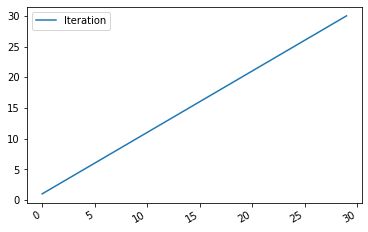

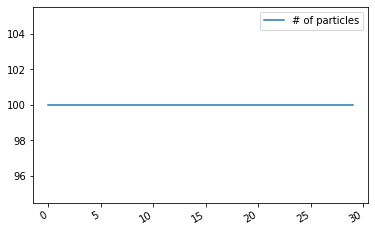

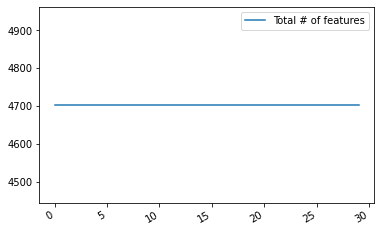

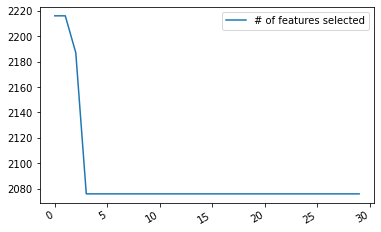

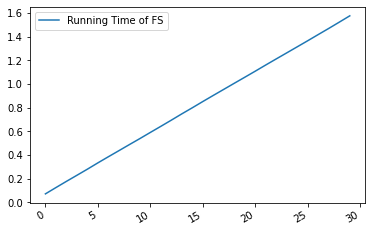

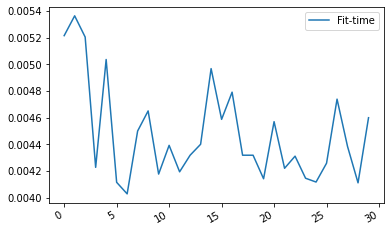

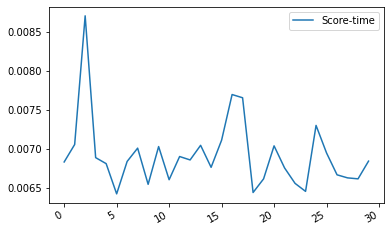

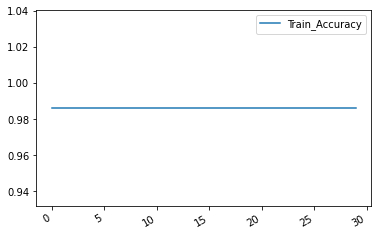

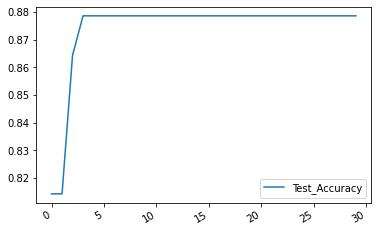

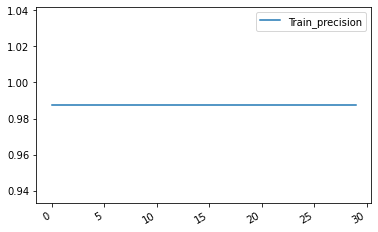

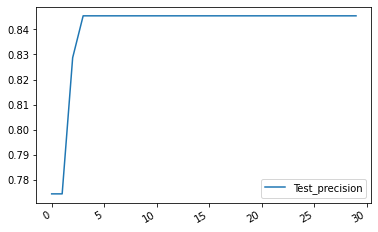

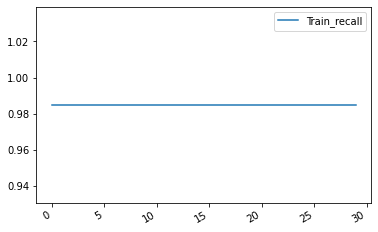

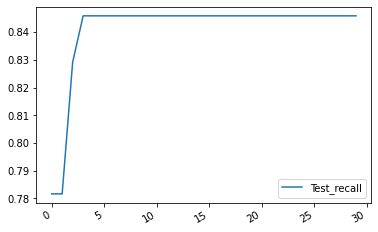

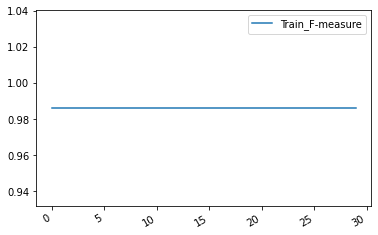

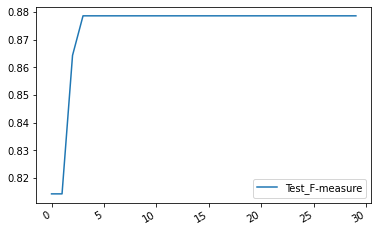

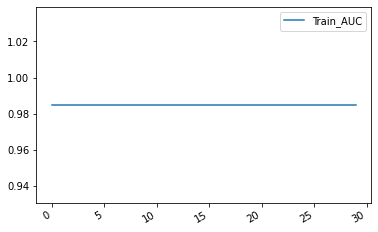

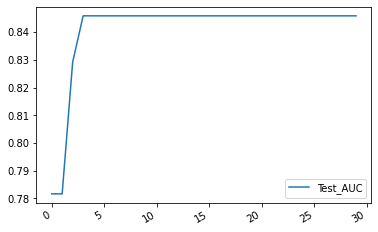

<Figure size 640x480 with 0 Axes>

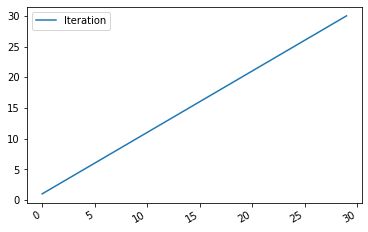

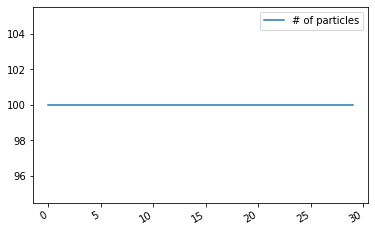

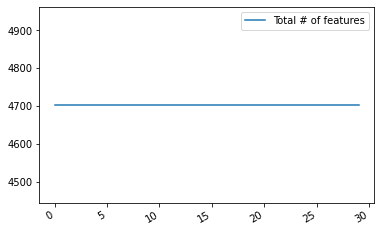

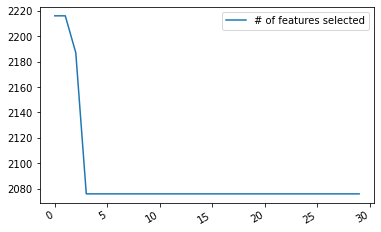

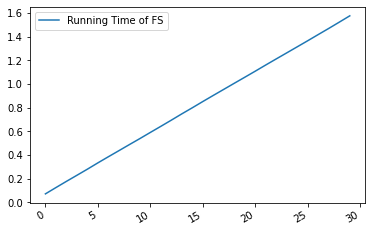

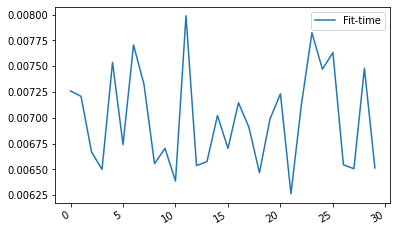

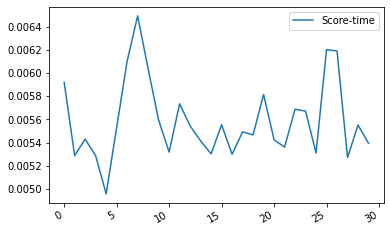

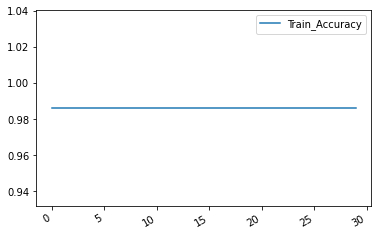

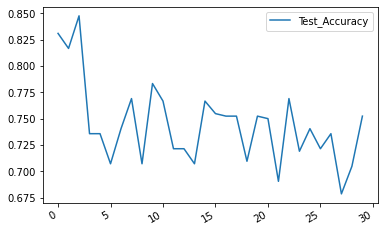

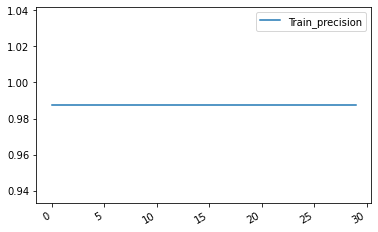

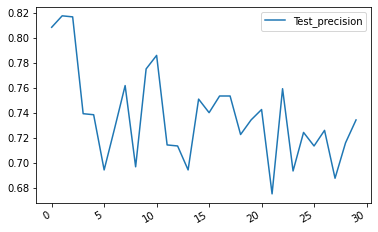

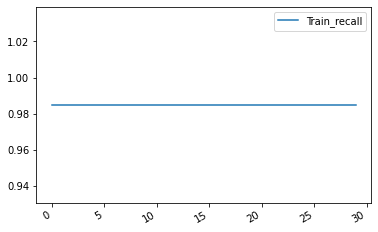

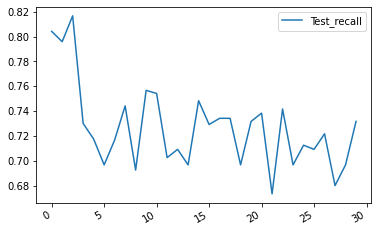

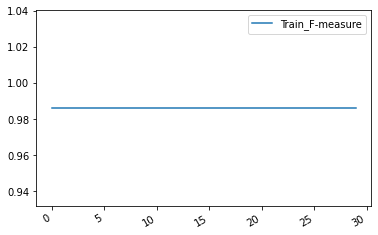

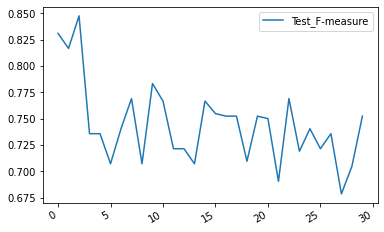

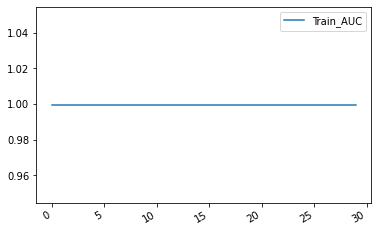

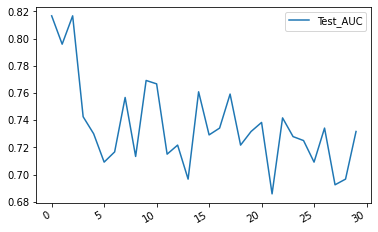

<Figure size 640x480 with 0 Axes>

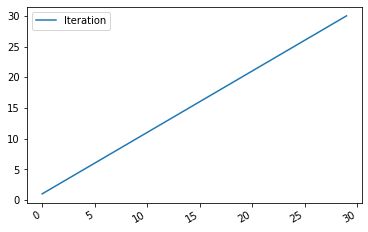

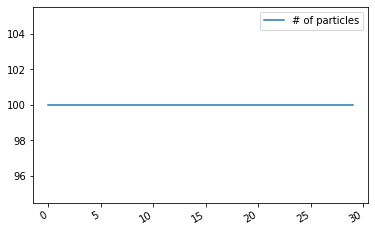

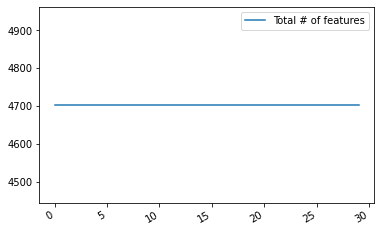

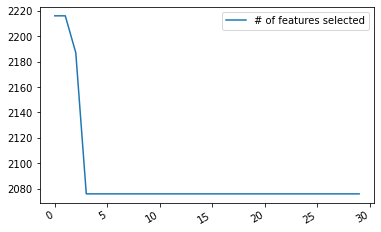

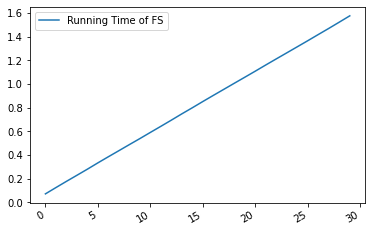

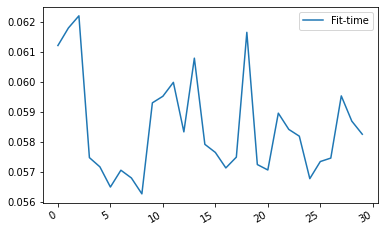

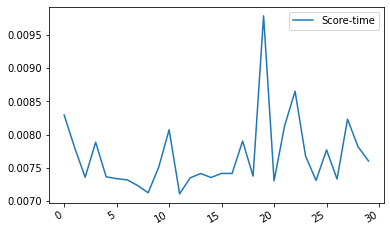

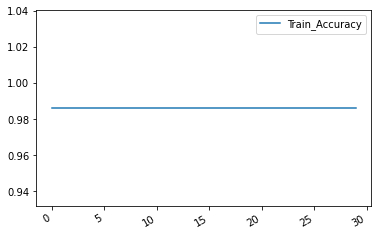

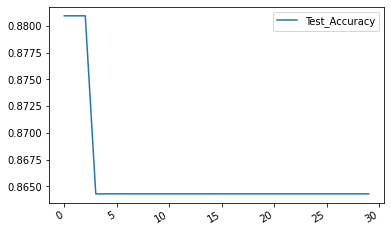

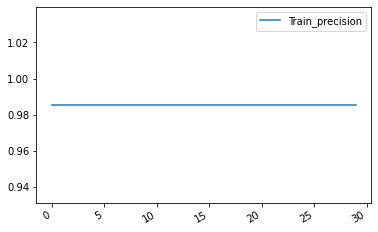

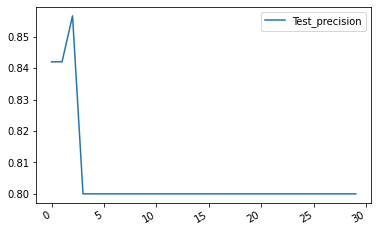

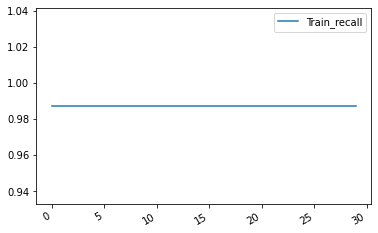

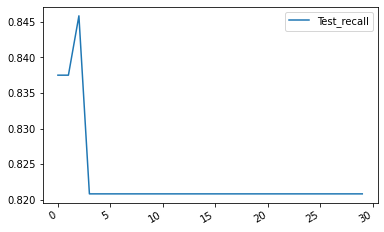

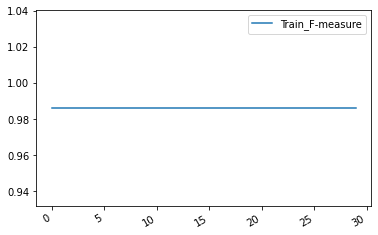

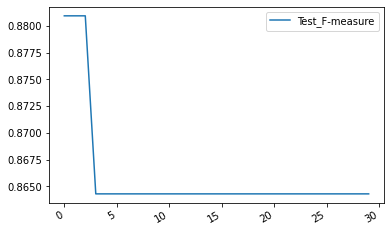

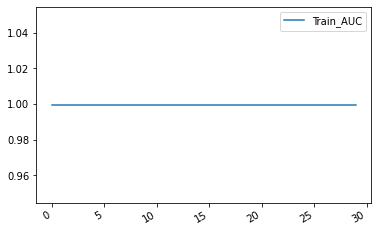

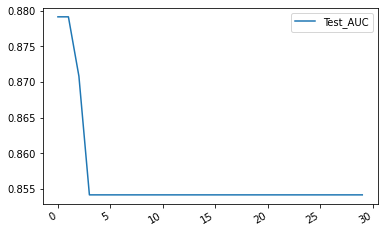

<Figure size 640x480 with 0 Axes>

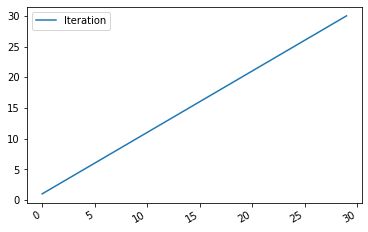

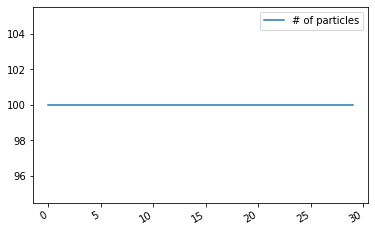

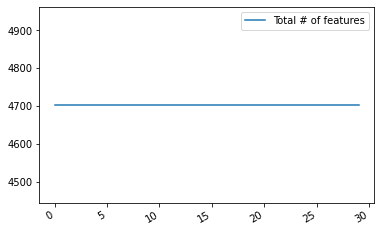

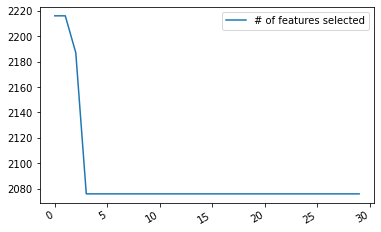

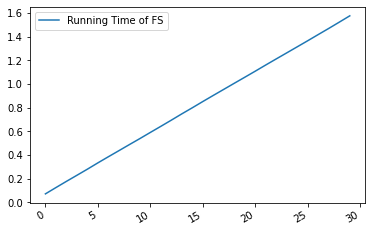

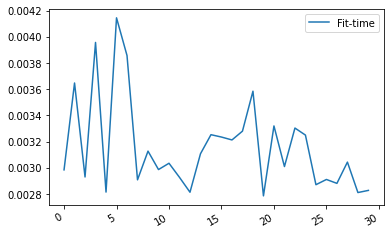

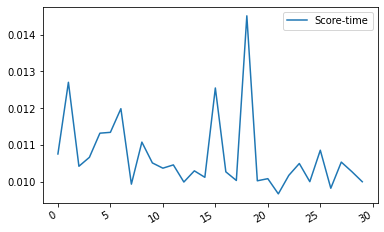

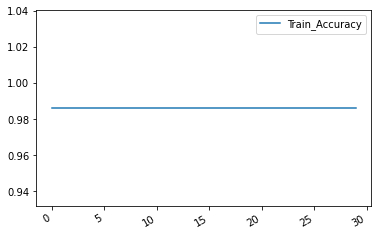

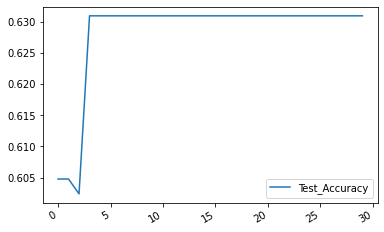

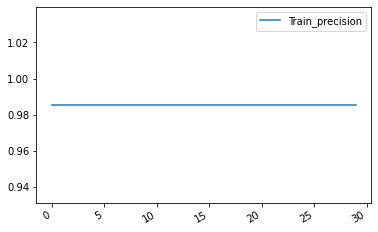

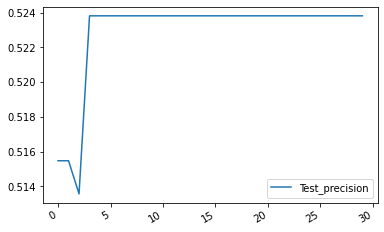

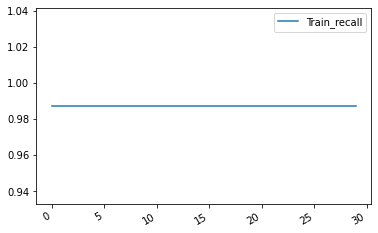

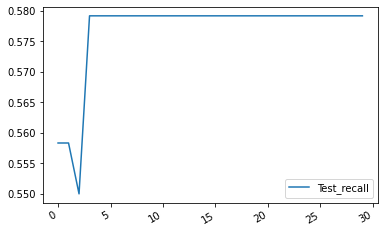

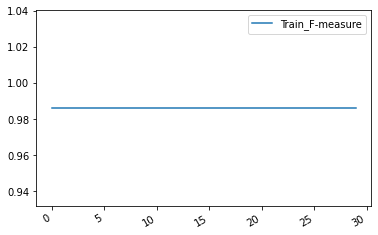

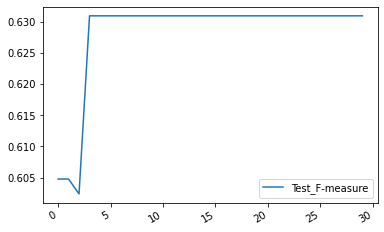

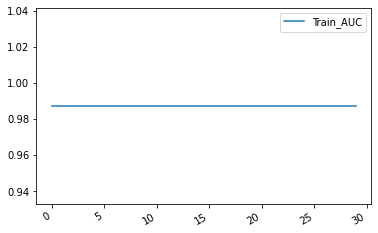

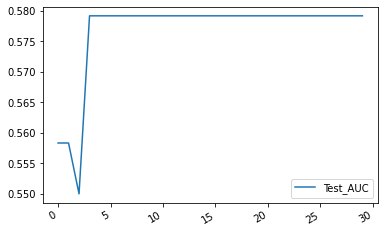

<Figure size 640x480 with 0 Axes>

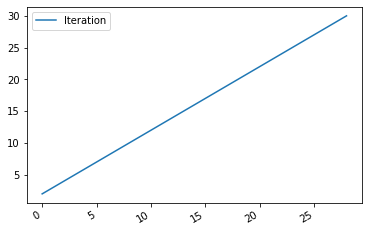

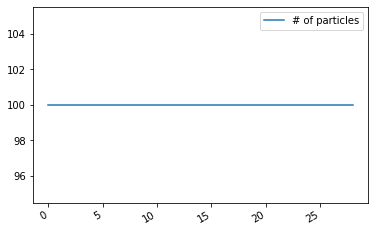

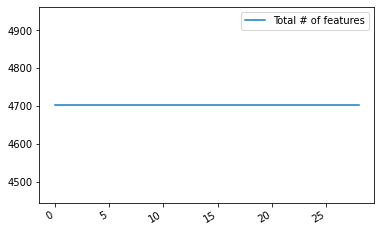

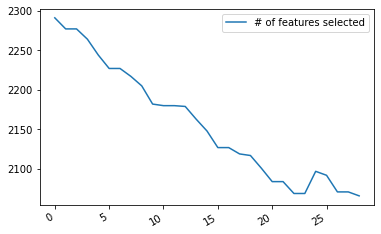

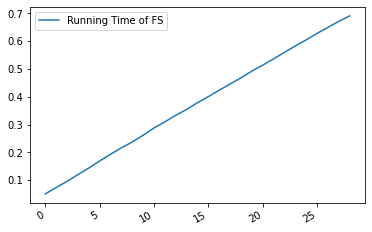

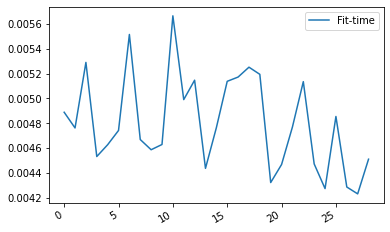

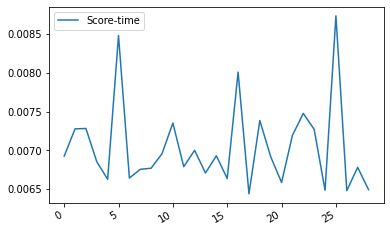

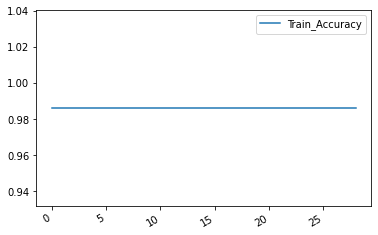

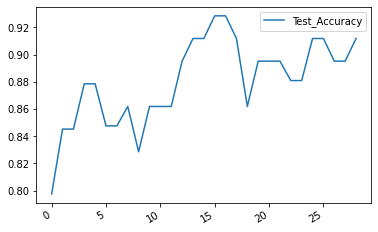

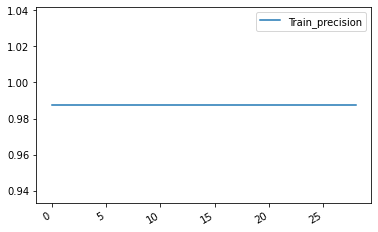

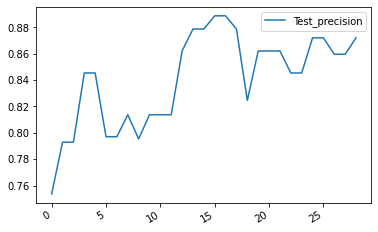

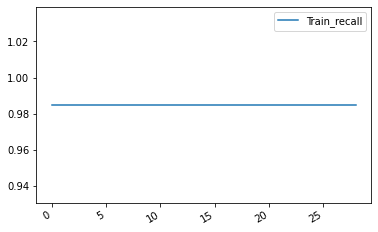

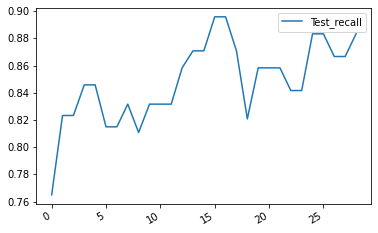

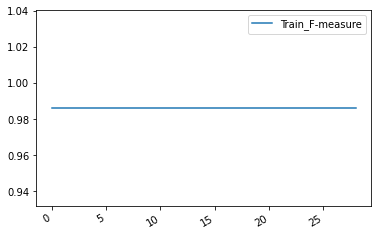

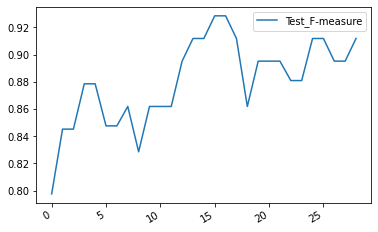

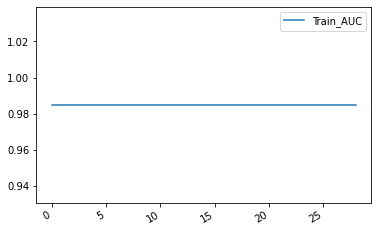

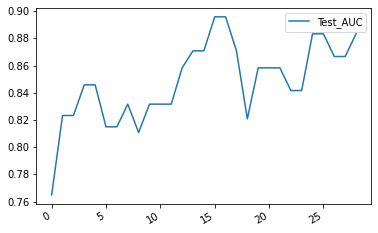

<Figure size 640x480 with 0 Axes>

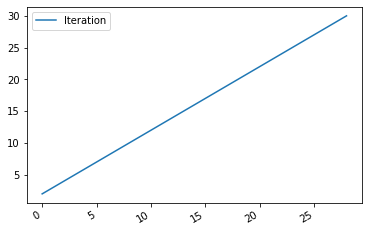

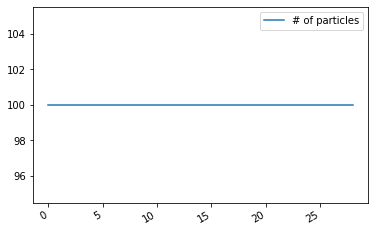

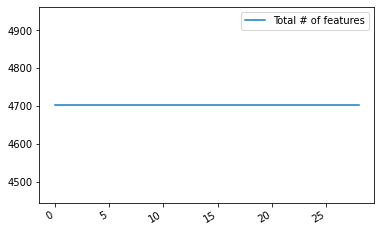

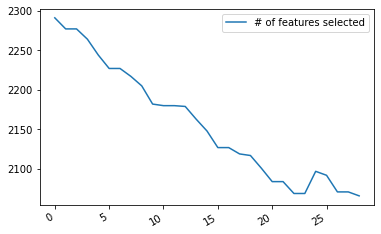

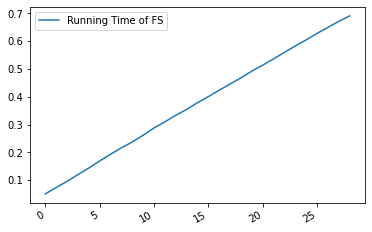

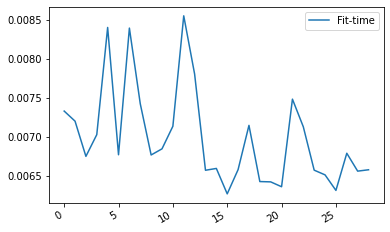

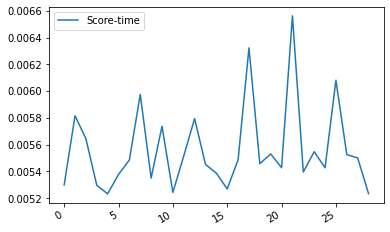

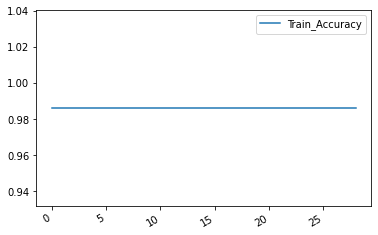

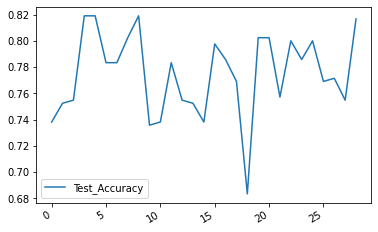

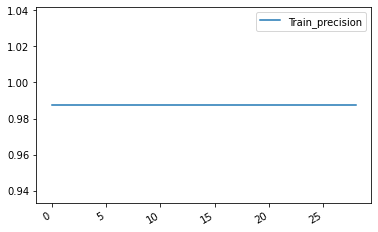

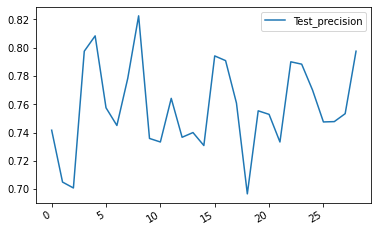

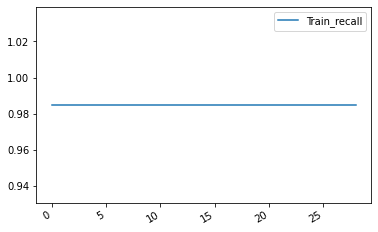

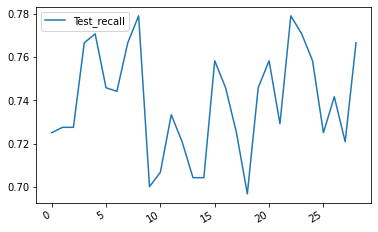

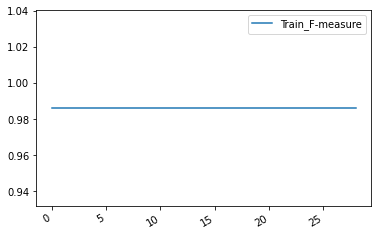

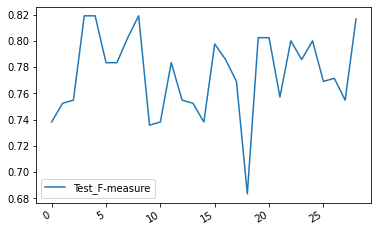

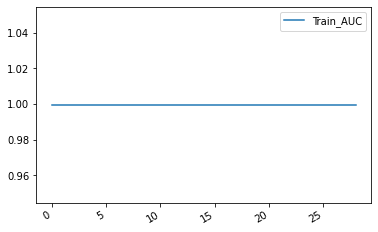

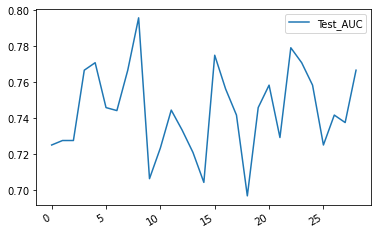

<Figure size 640x480 with 0 Axes>

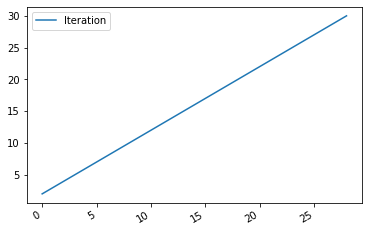

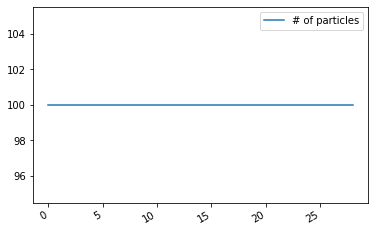

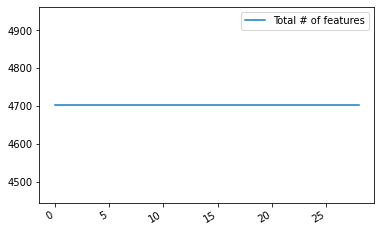

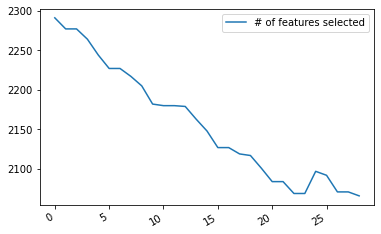

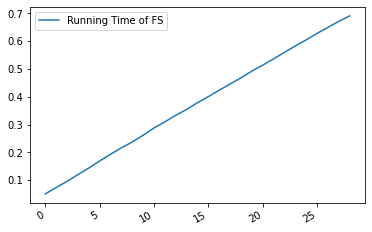

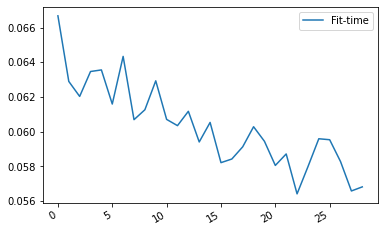

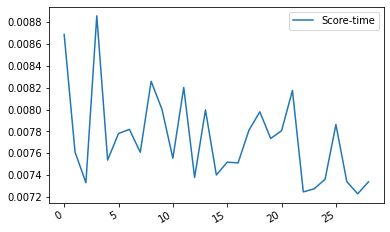

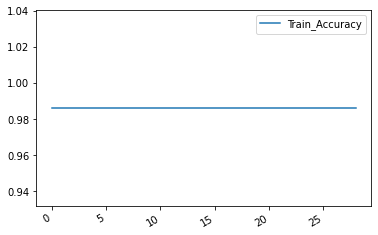

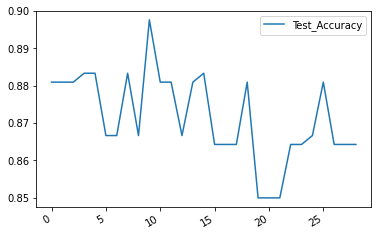

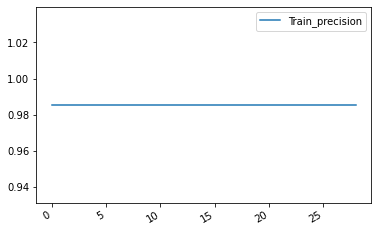

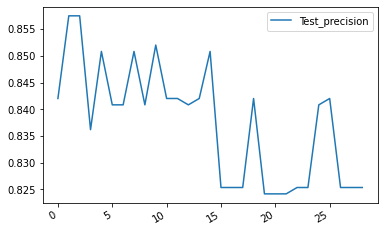

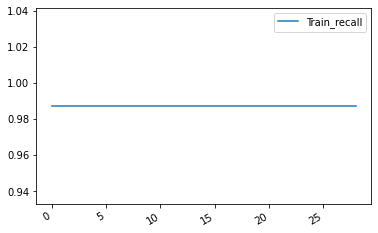

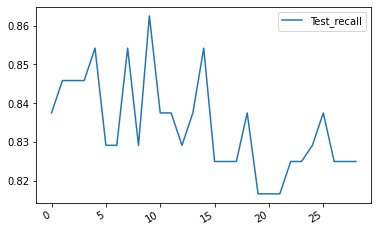

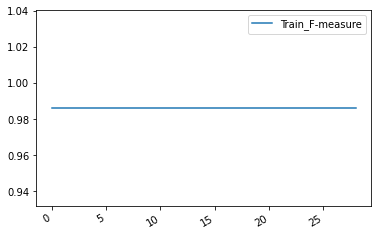

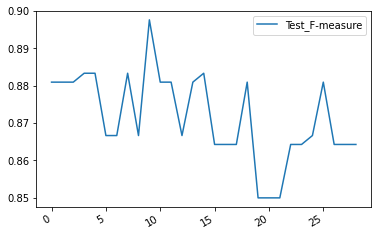

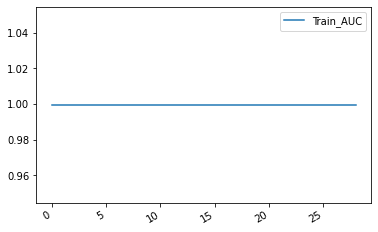

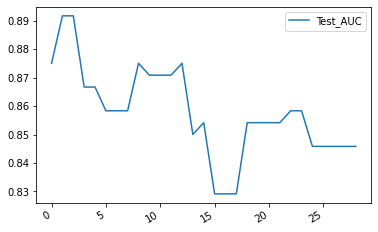

<Figure size 640x480 with 0 Axes>

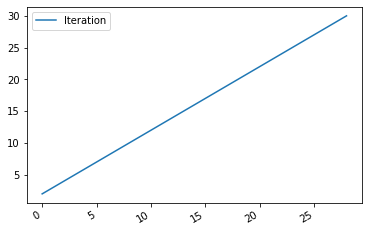

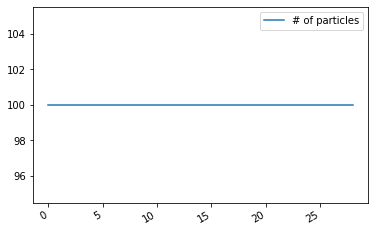

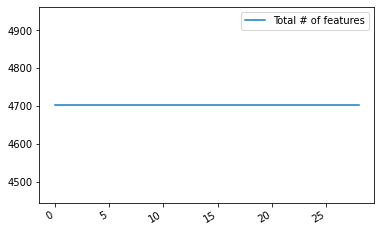

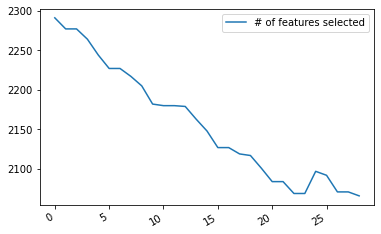

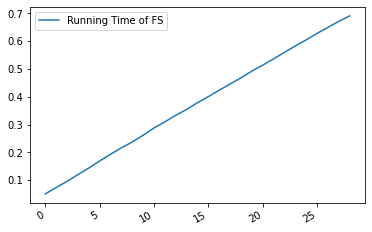

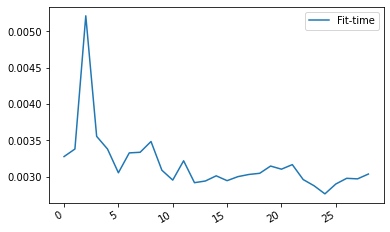

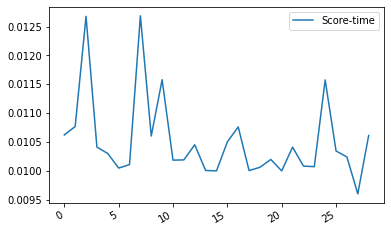

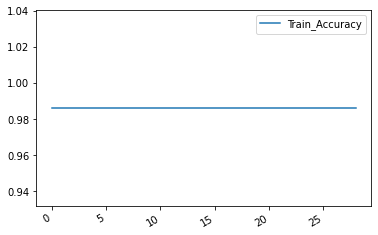

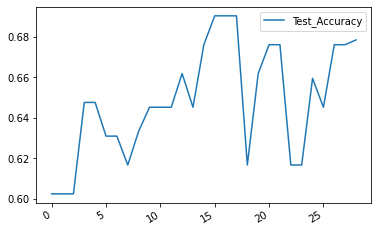

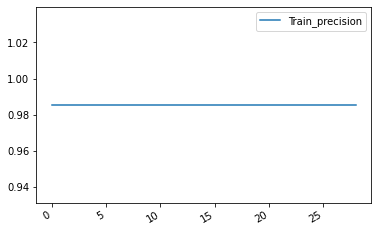

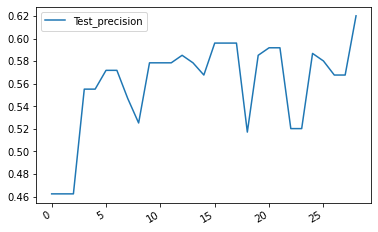

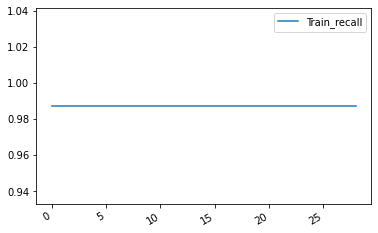

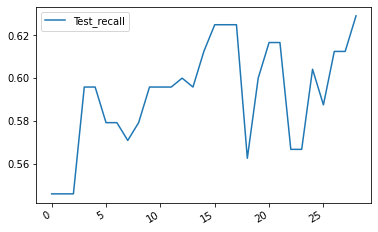

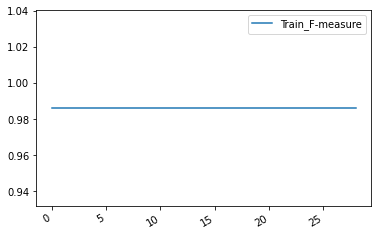

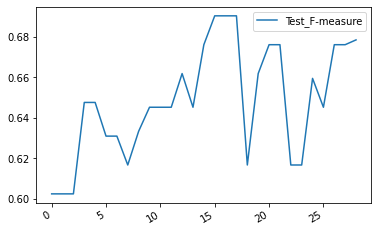

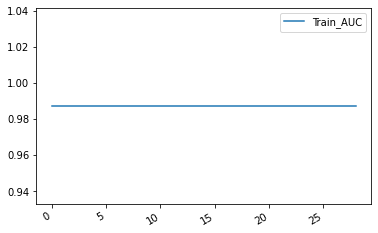

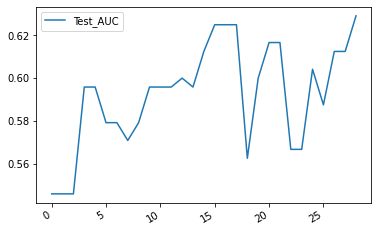

<Figure size 640x480 with 0 Axes>

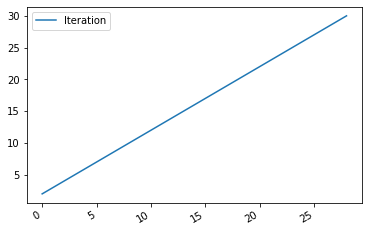

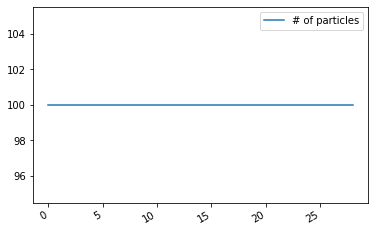

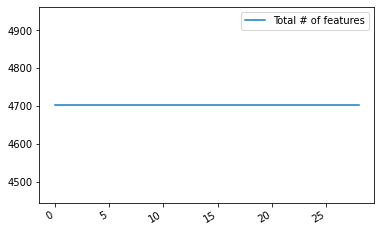

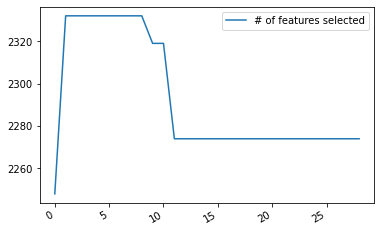

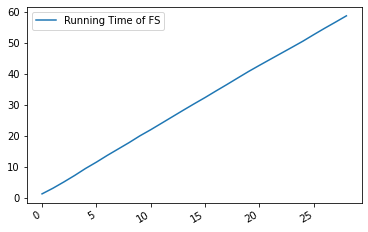

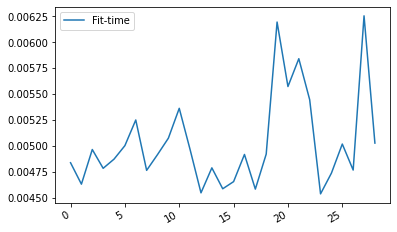

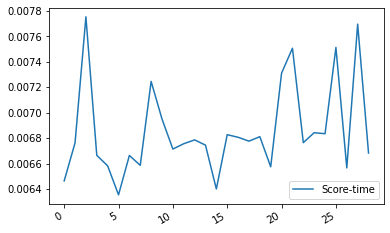

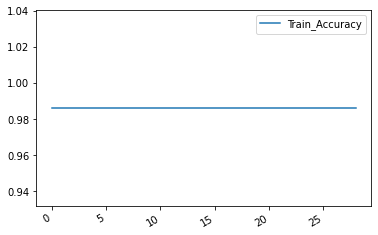

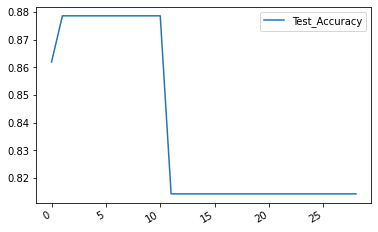

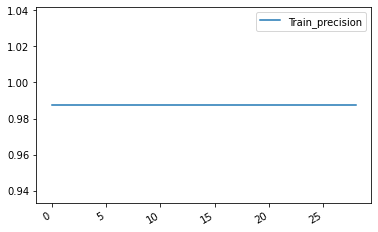

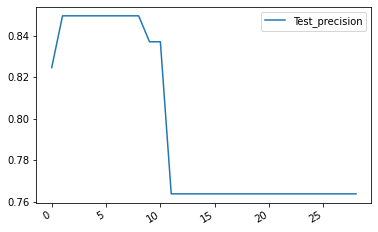

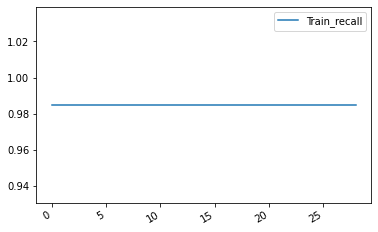

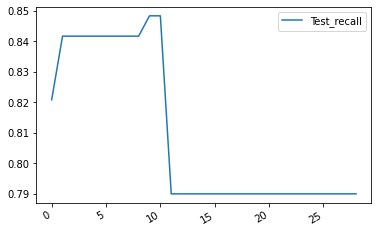

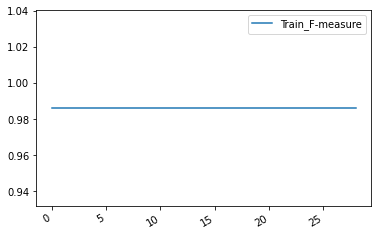

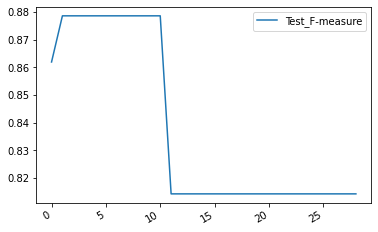

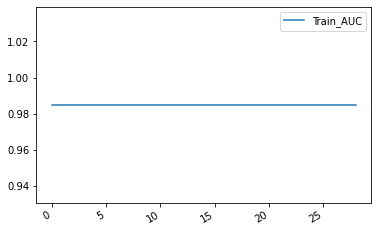

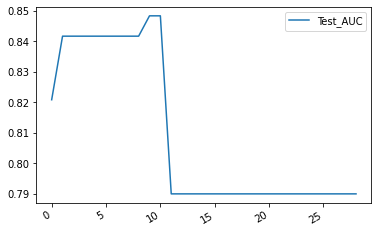

<Figure size 640x480 with 0 Axes>

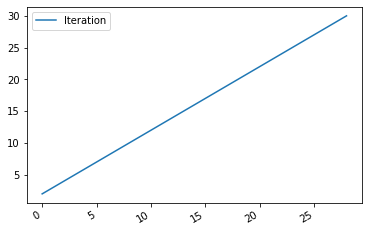

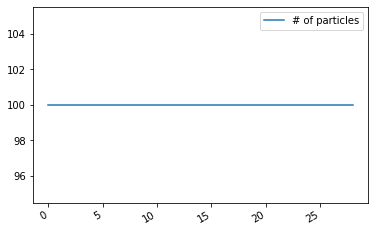

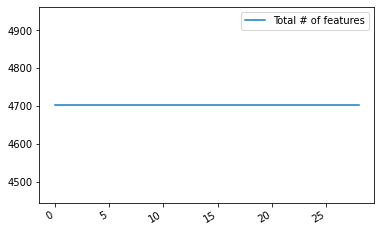

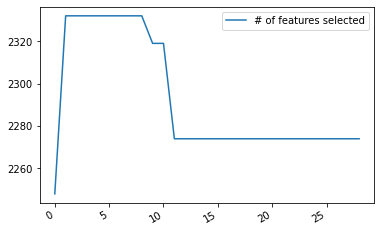

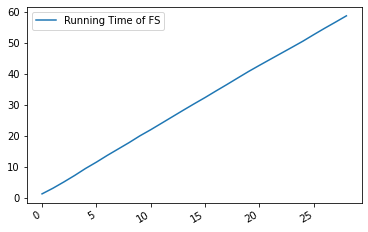

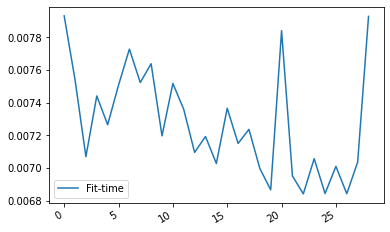

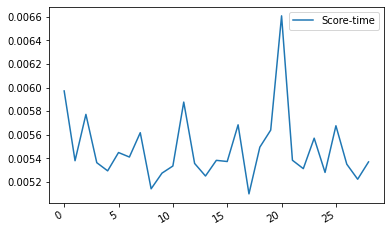

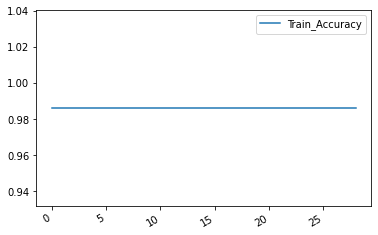

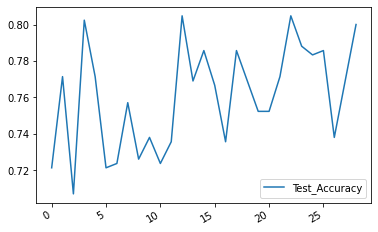

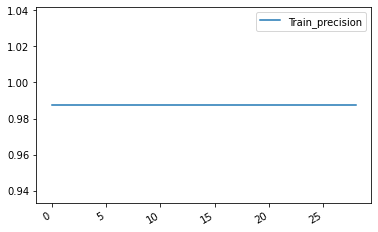

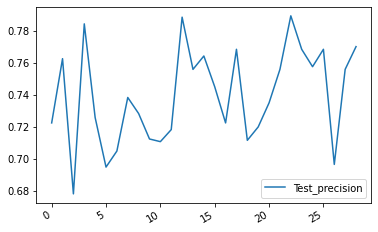

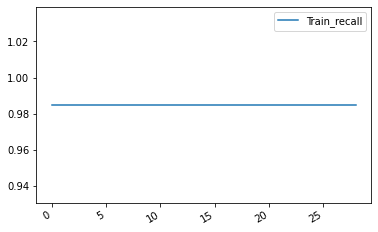

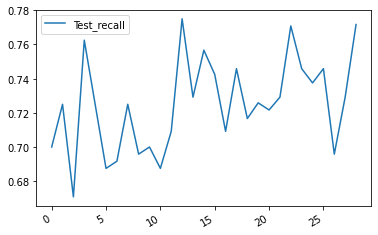

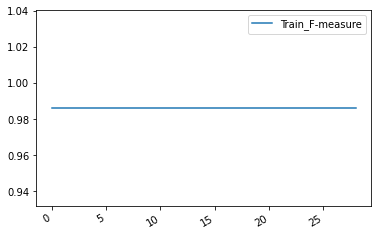

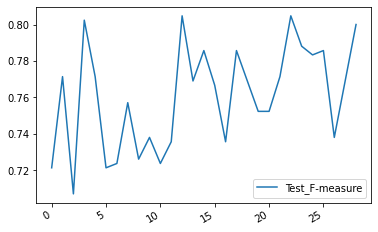

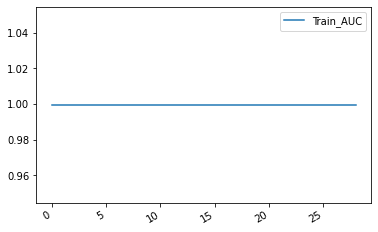

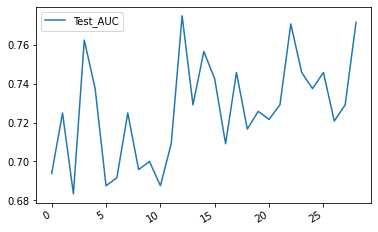

<Figure size 640x480 with 0 Axes>

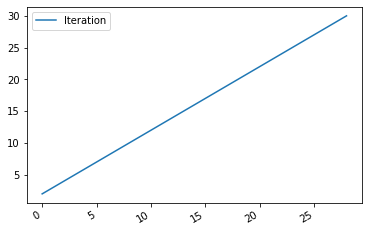

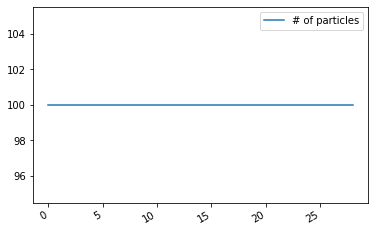

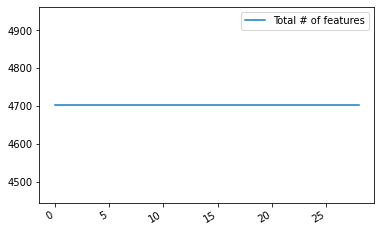

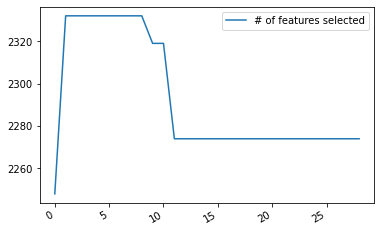

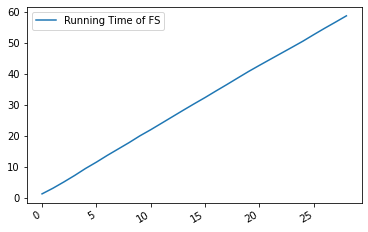

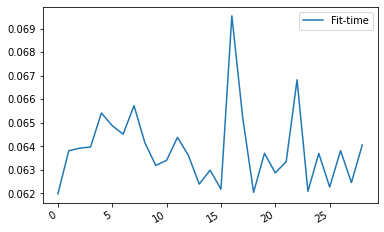

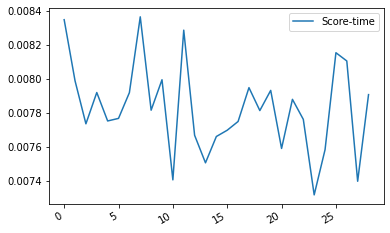

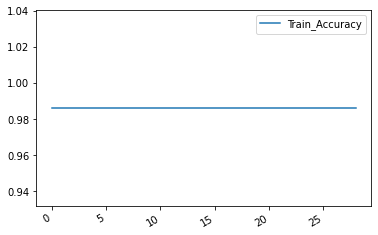

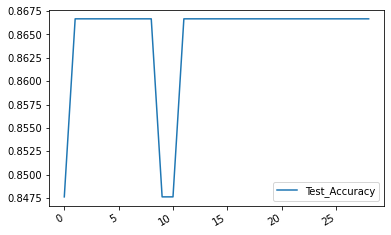

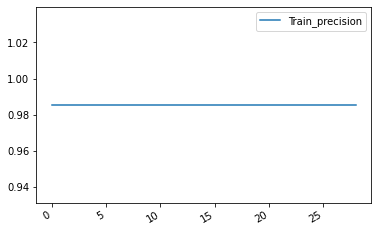

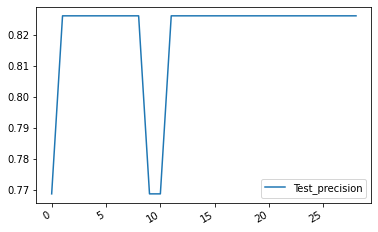

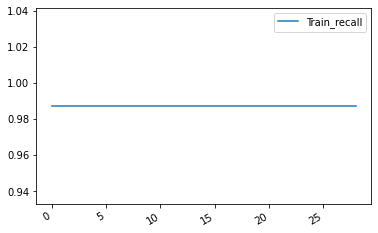

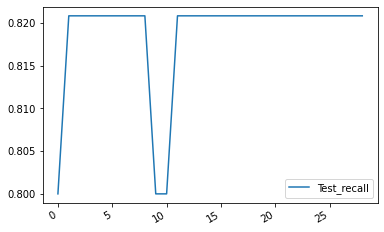

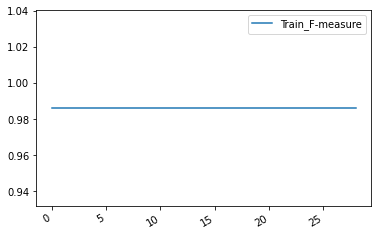

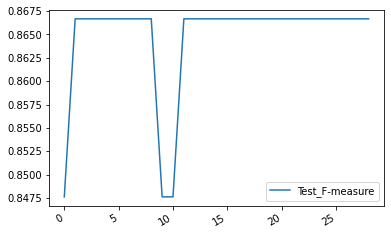

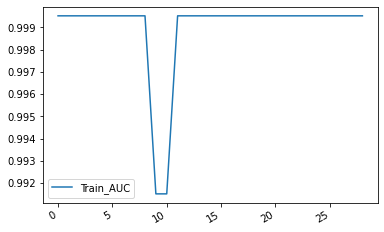

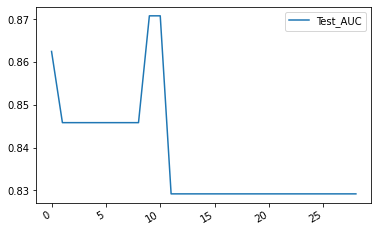

<Figure size 640x480 with 0 Axes>

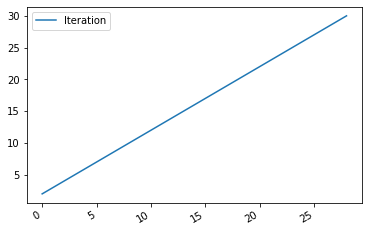

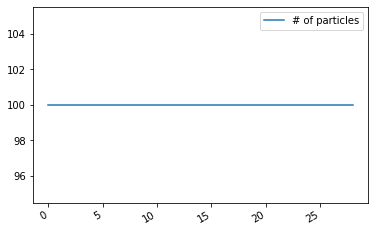

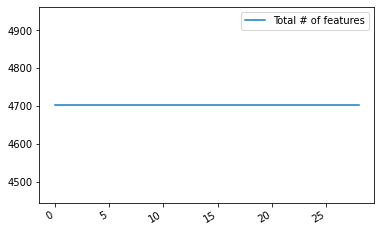

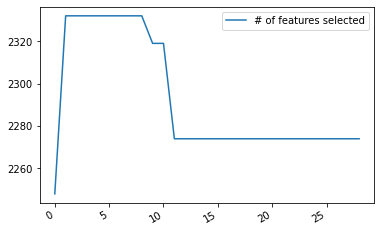

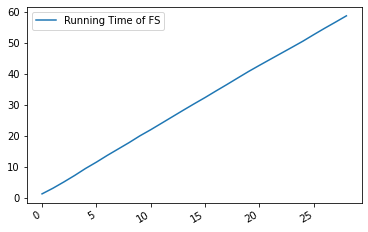

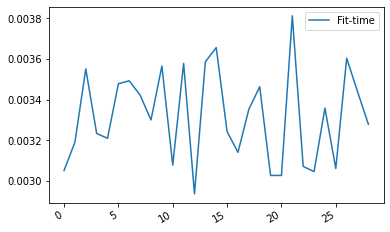

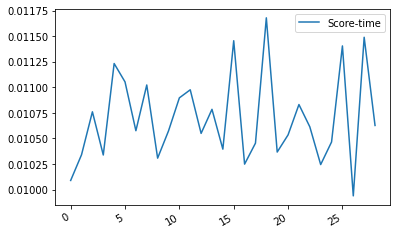

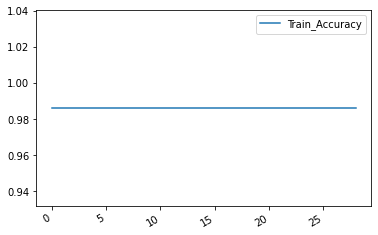

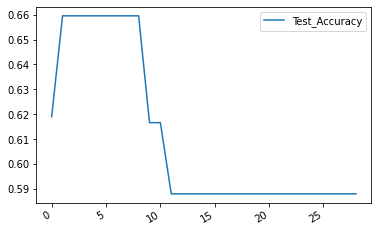

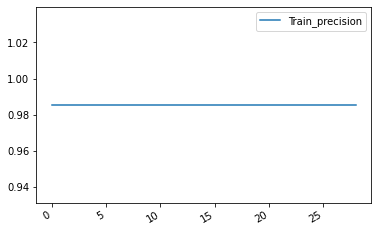

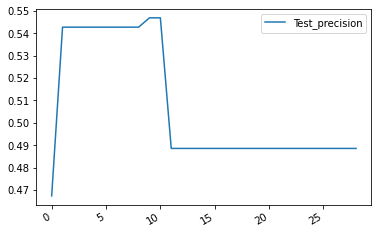

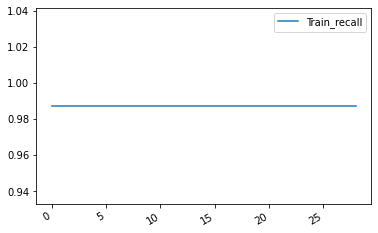

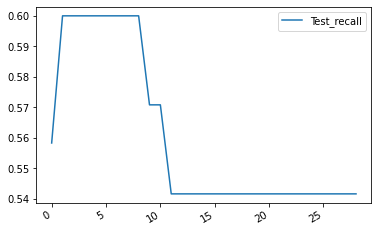

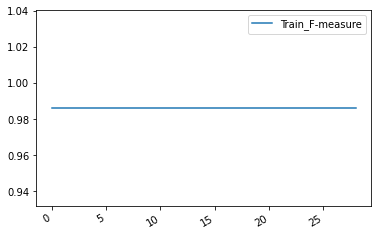

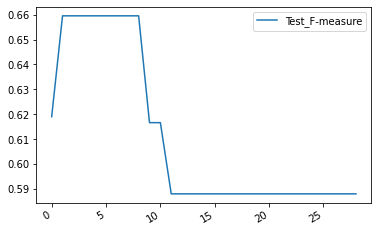

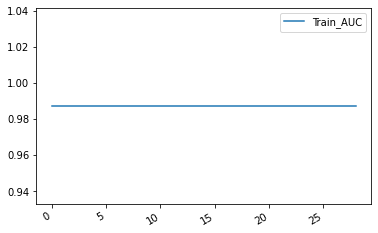

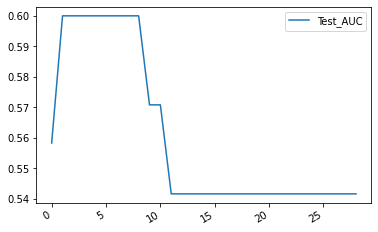

<Figure size 640x480 with 0 Axes>

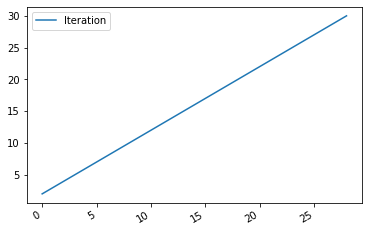

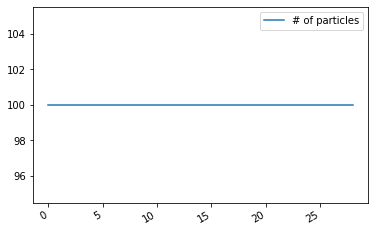

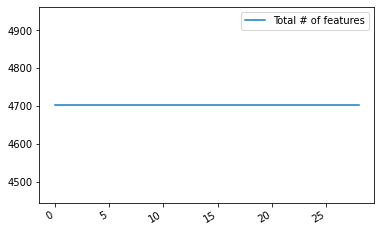

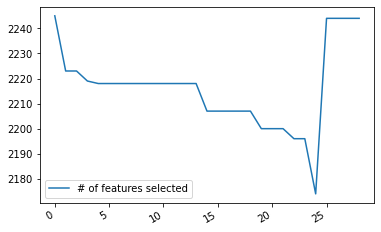

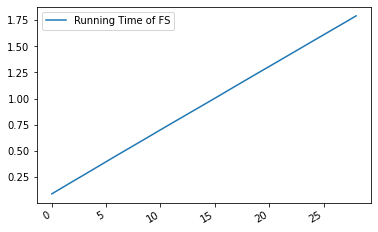

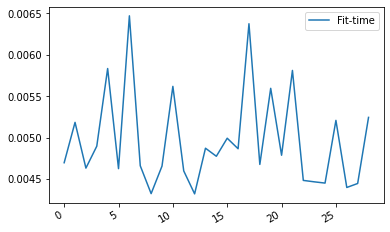

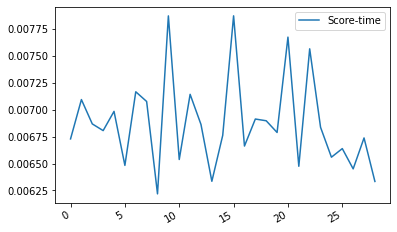

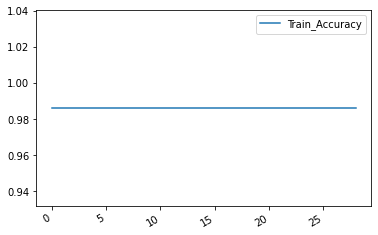

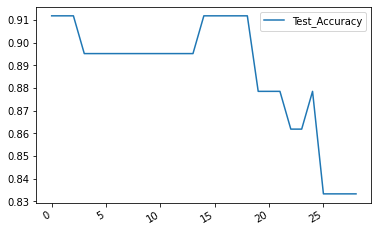

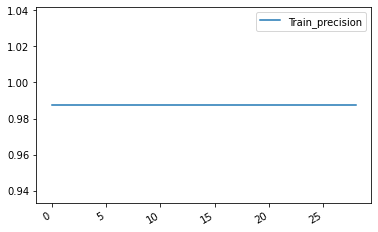

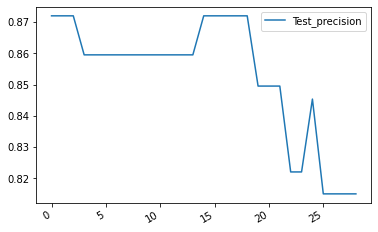

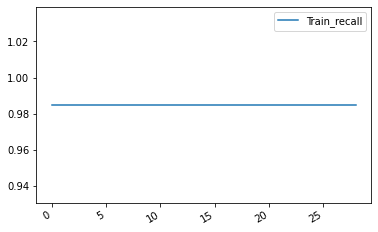

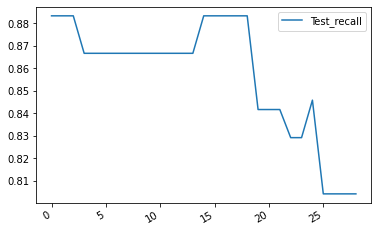

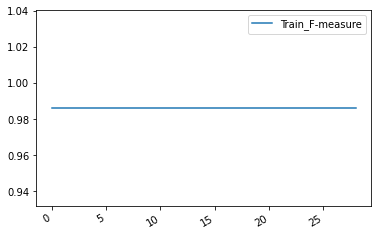

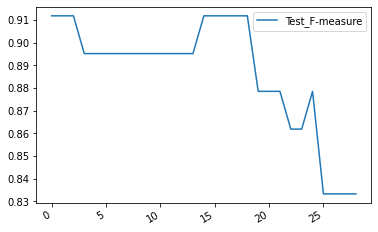

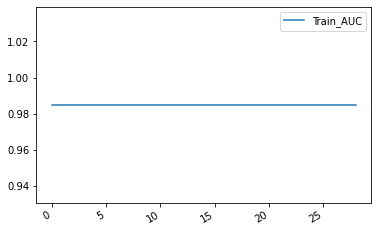

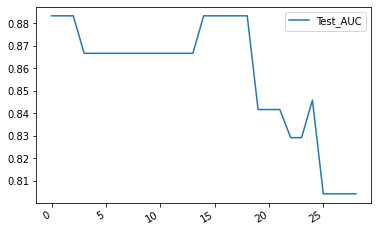

<Figure size 640x480 with 0 Axes>

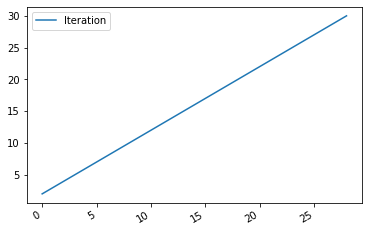

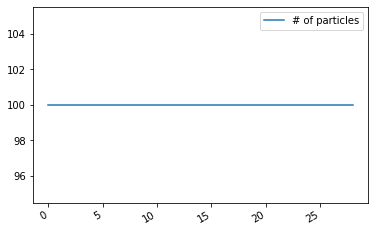

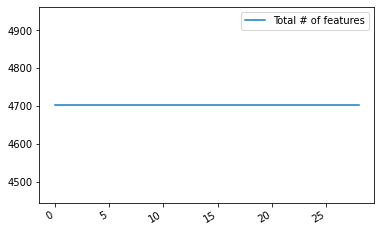

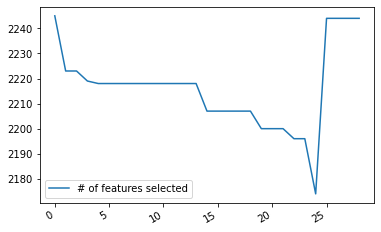

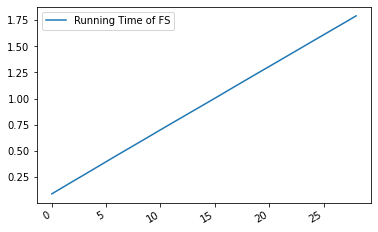

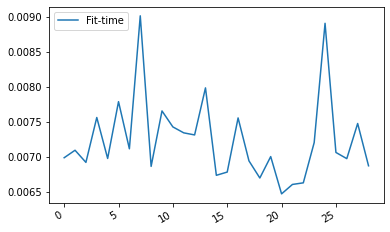

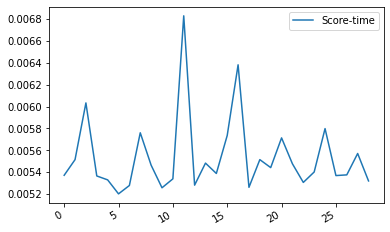

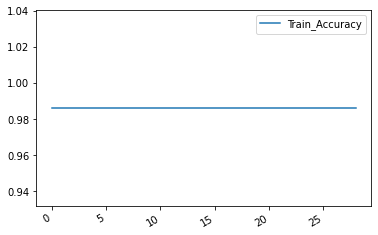

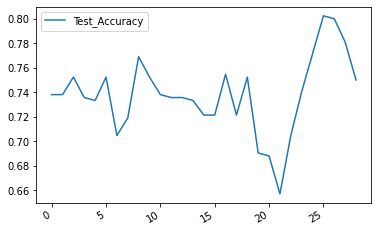

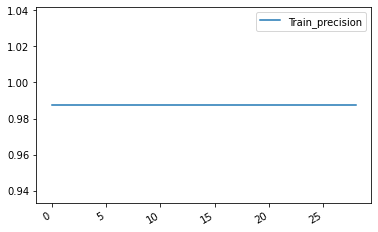

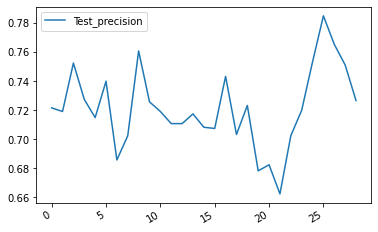

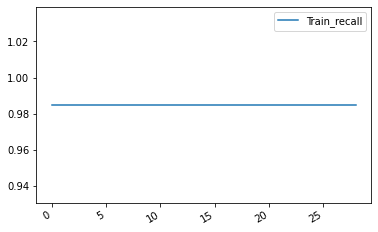

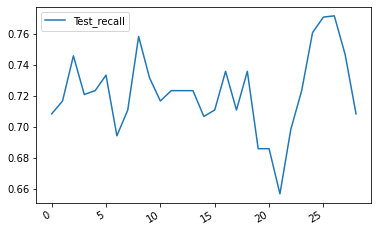

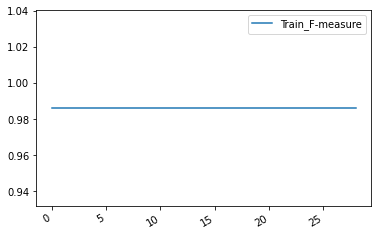

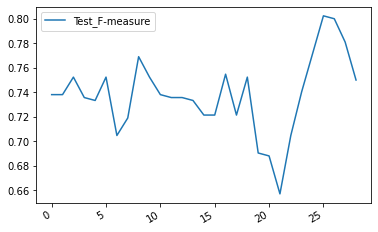

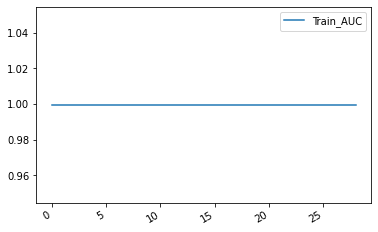

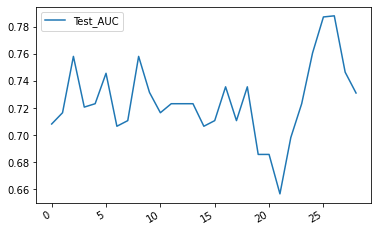

<Figure size 640x480 with 0 Axes>

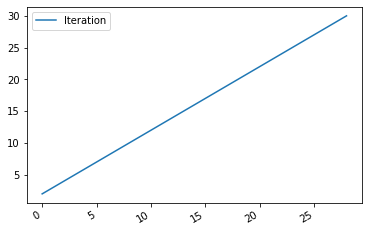

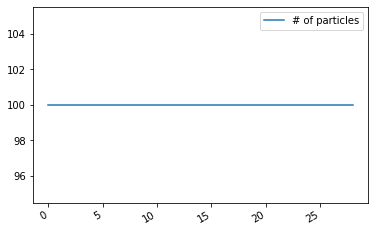

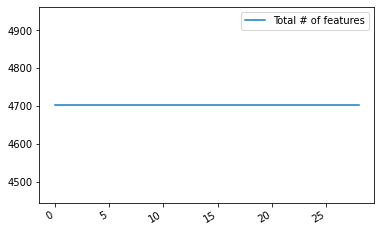

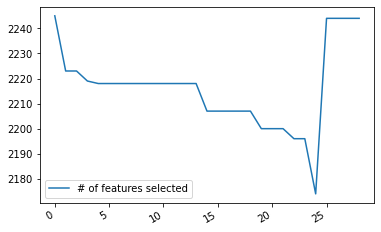

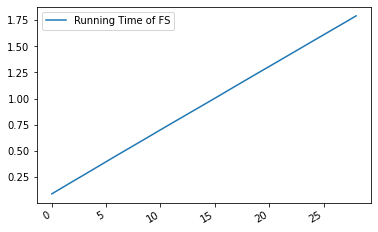

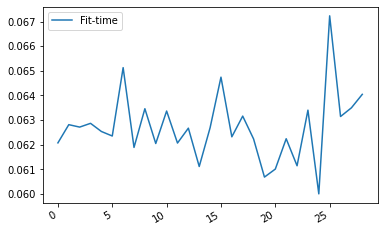

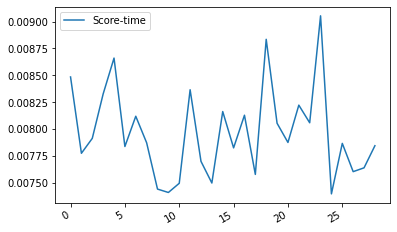

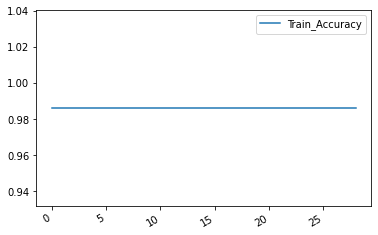

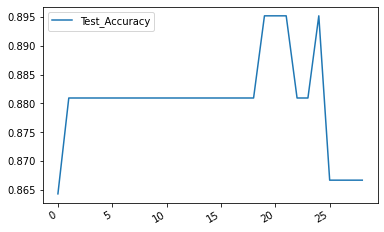

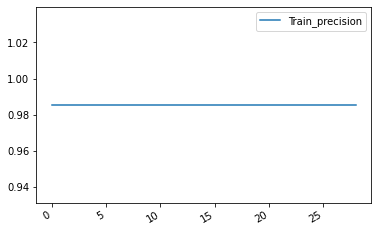

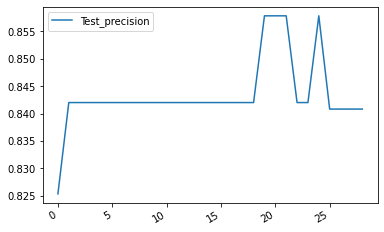

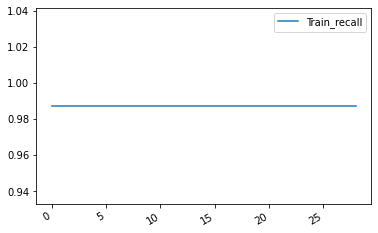

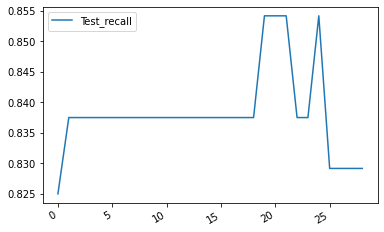

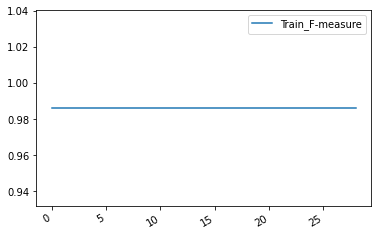

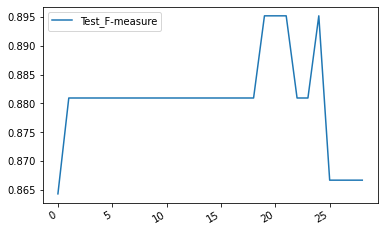

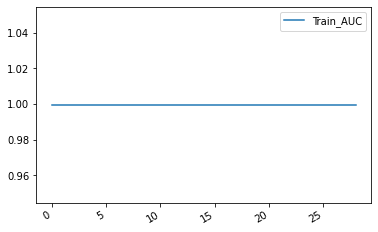

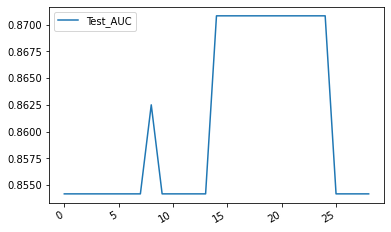

<Figure size 640x480 with 0 Axes>

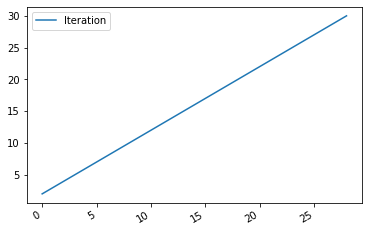

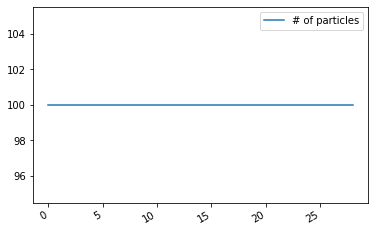

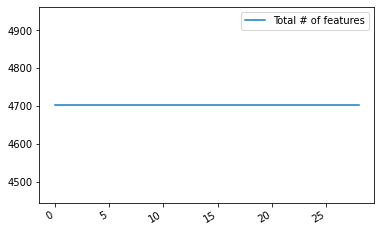

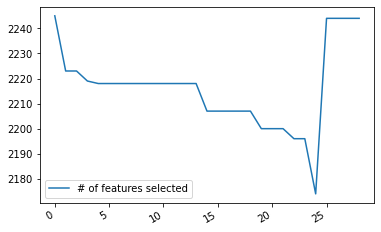

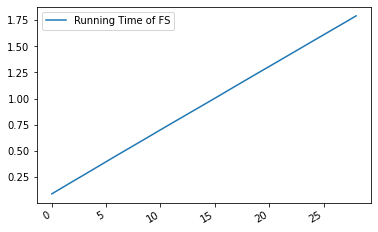

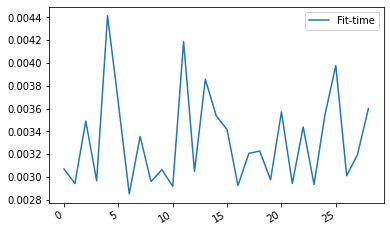

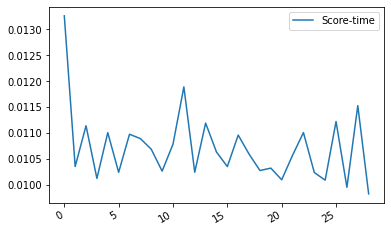

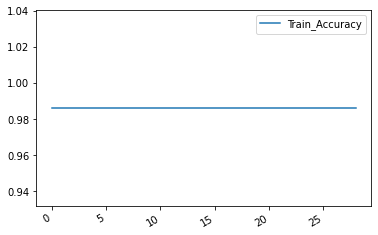

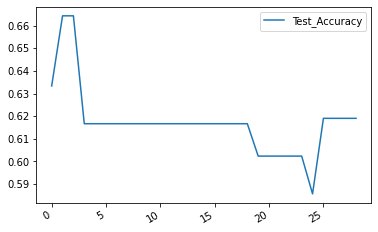

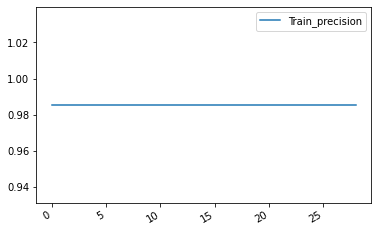

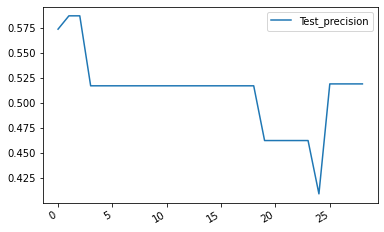

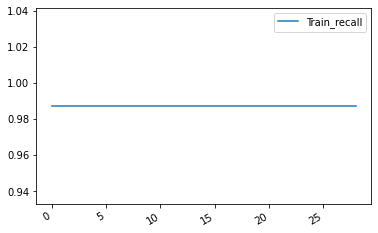

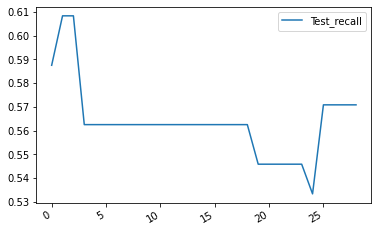

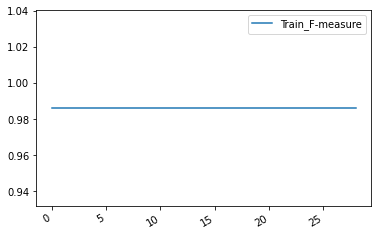

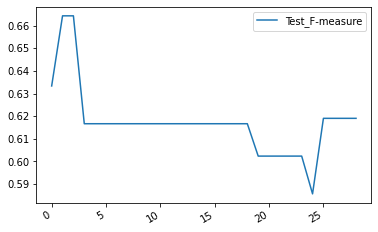

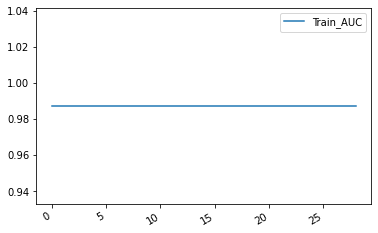

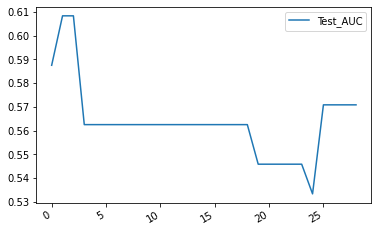

<Figure size 640x480 with 0 Axes>

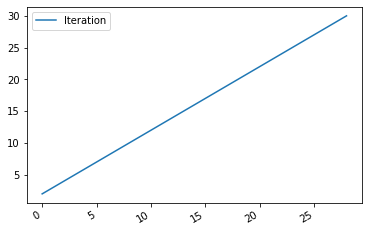

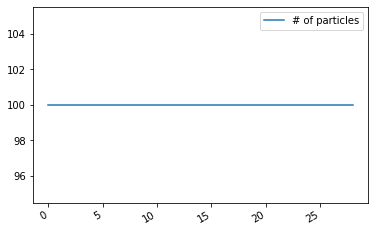

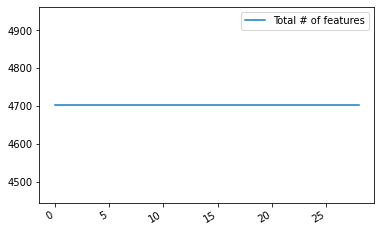

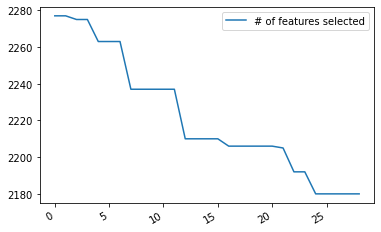

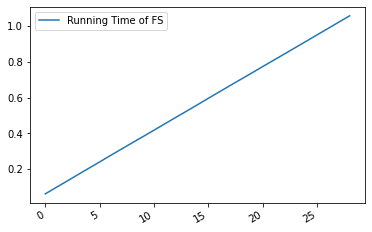

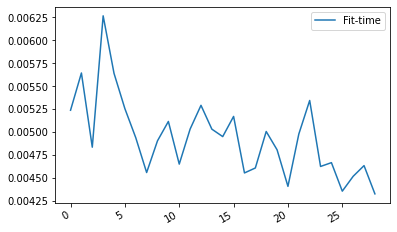

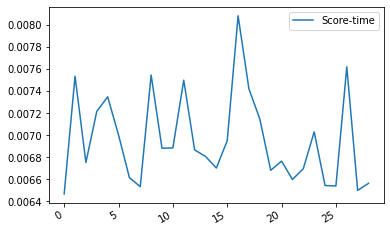

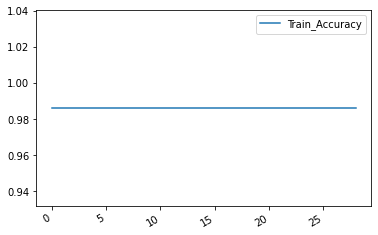

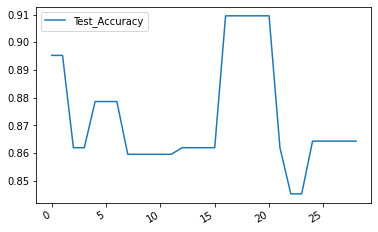

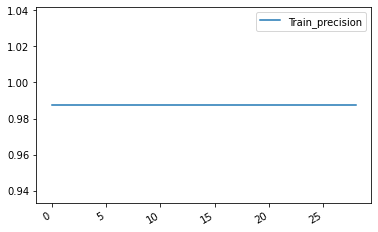

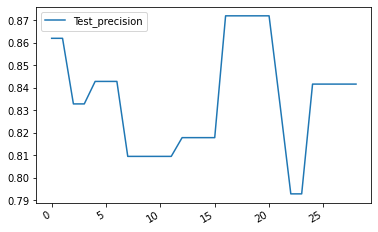

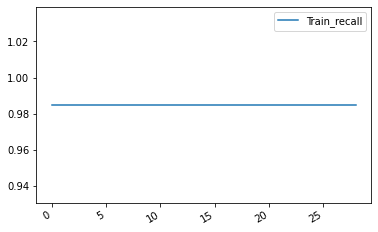

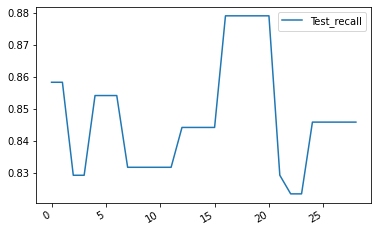

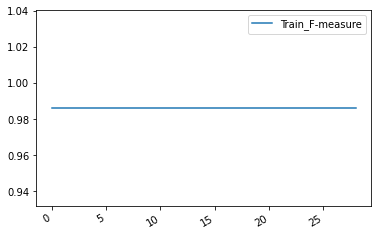

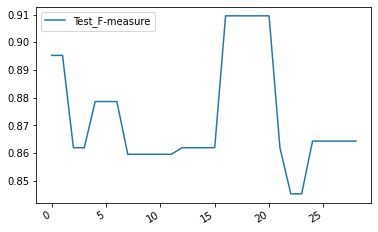

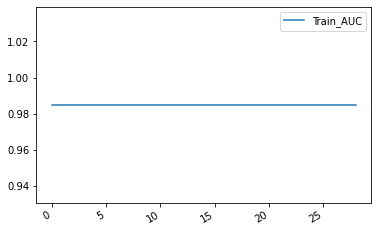

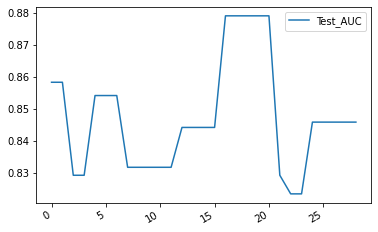

<Figure size 640x480 with 0 Axes>

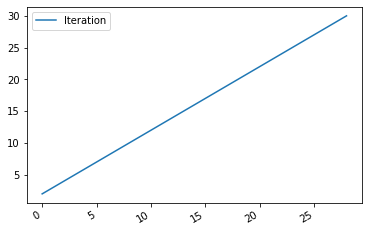

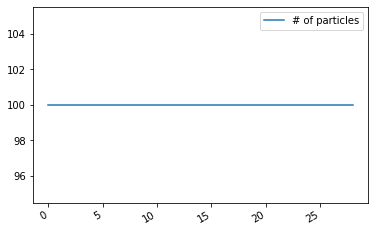

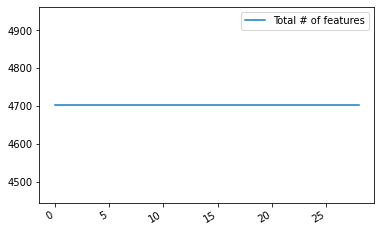

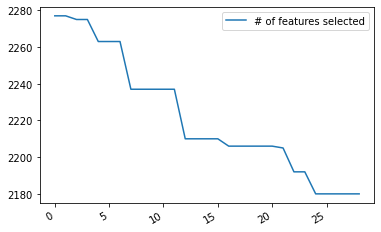

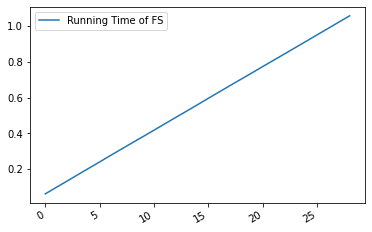

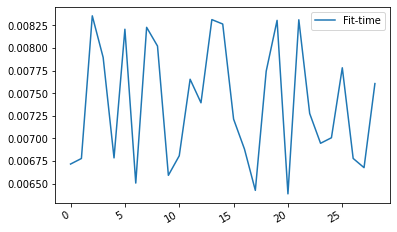

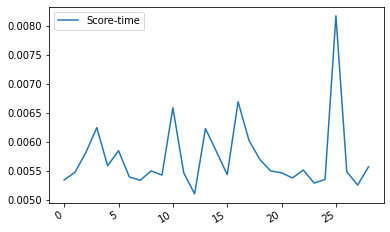

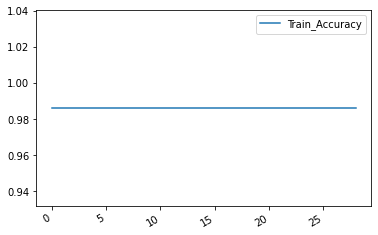

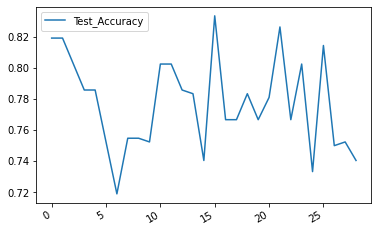

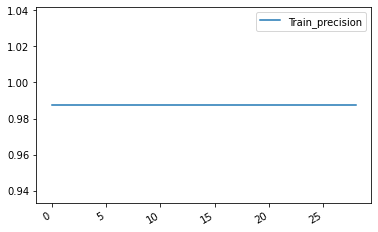

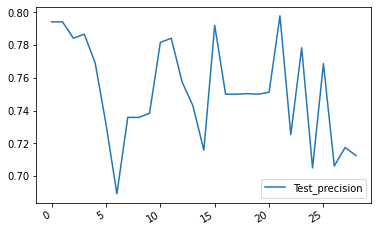

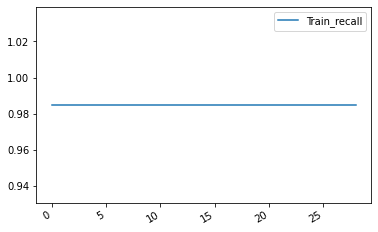

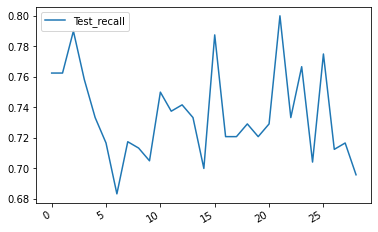

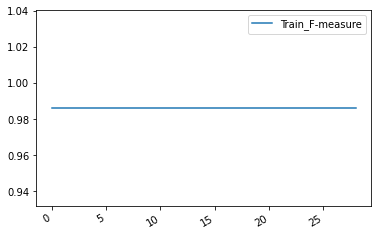

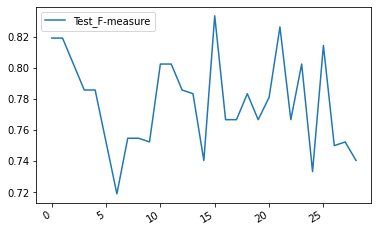

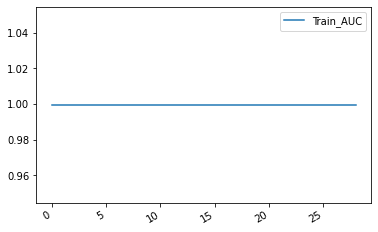

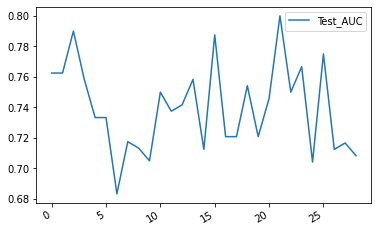

<Figure size 640x480 with 0 Axes>

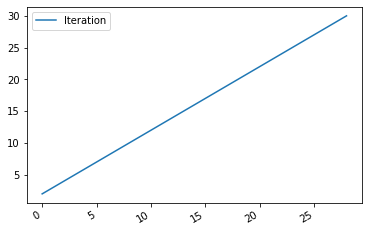

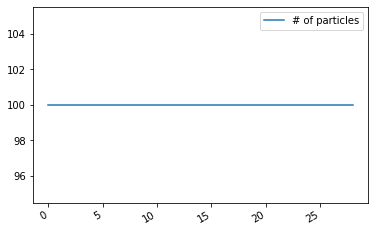

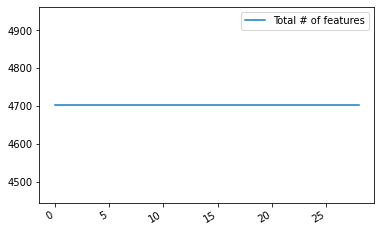

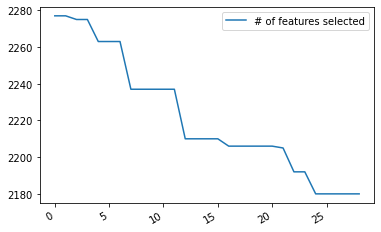

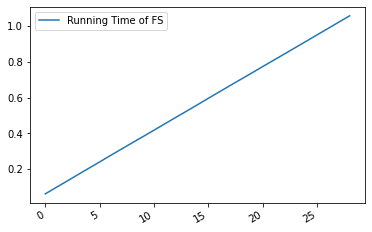

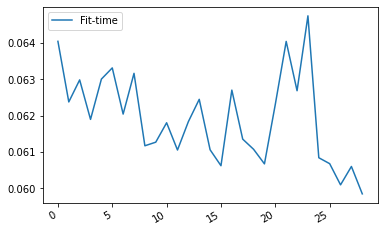

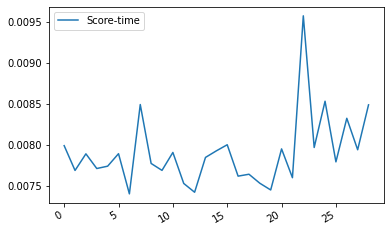

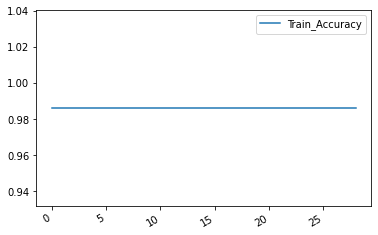

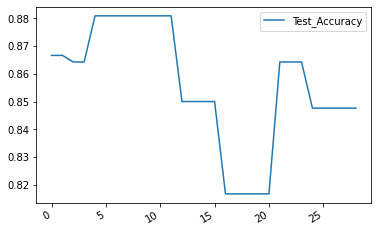

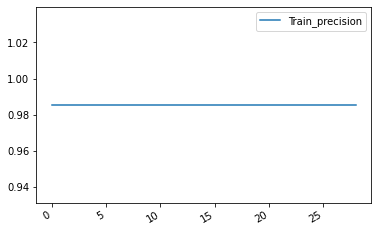

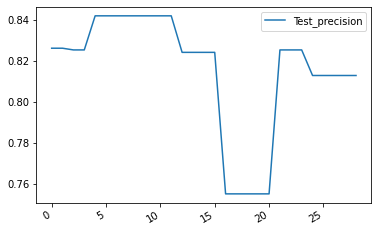

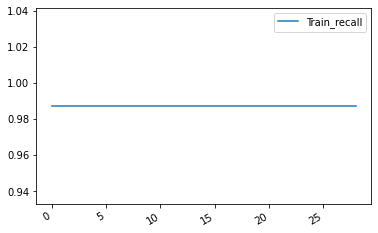

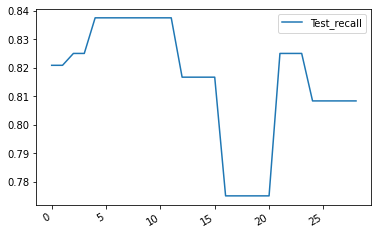

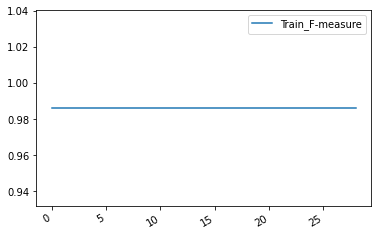

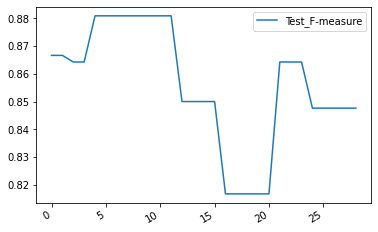

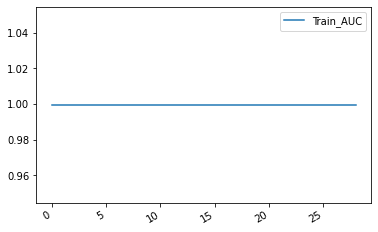

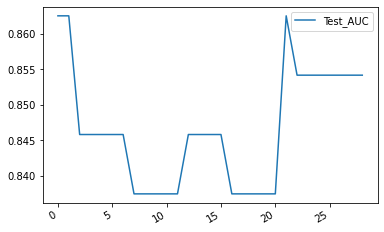

<Figure size 640x480 with 0 Axes>

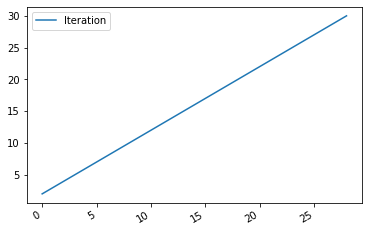

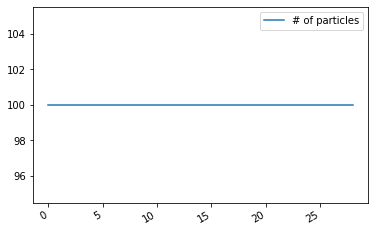

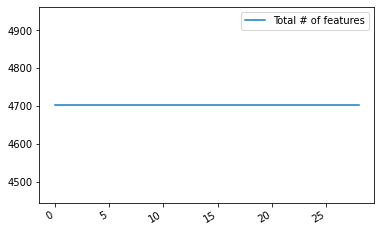

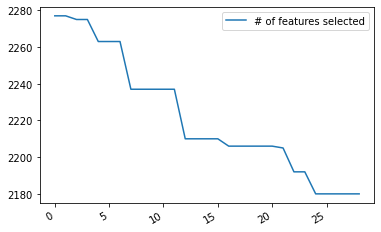

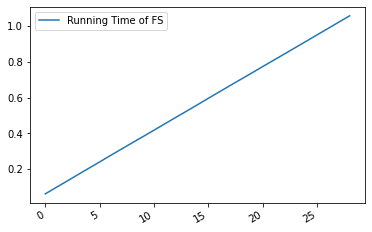

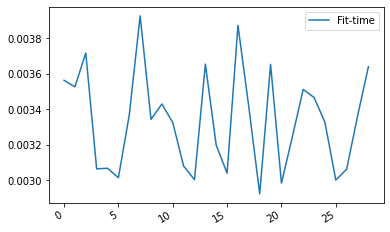

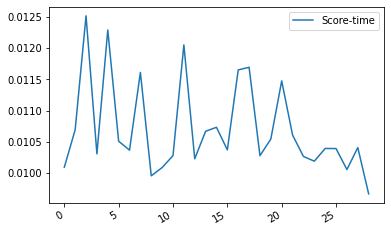

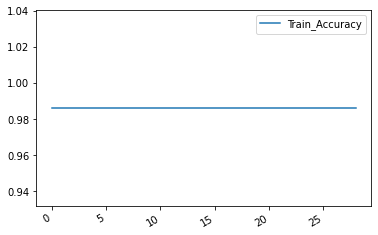

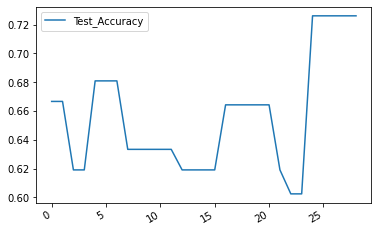

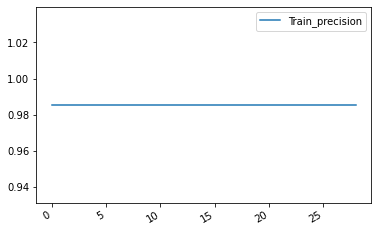

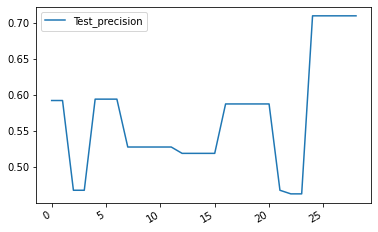

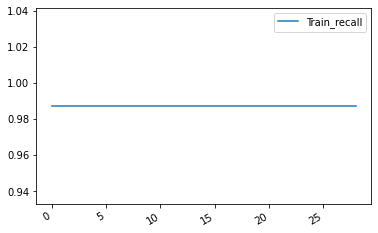

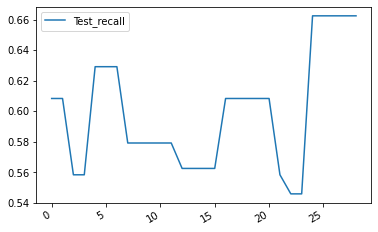

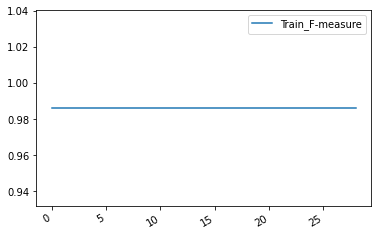

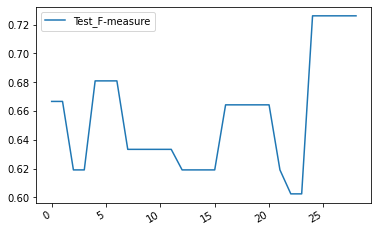

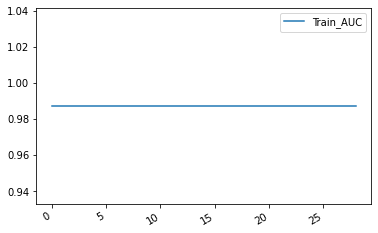

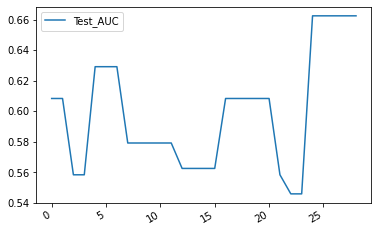

<Figure size 640x480 with 0 Axes>

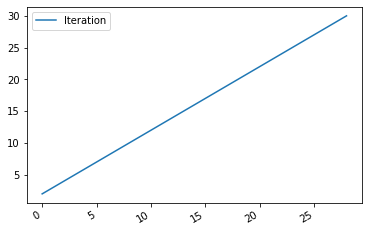

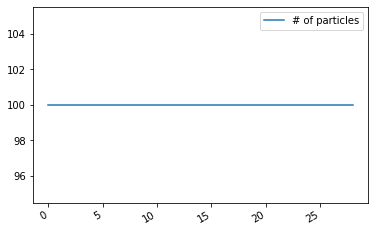

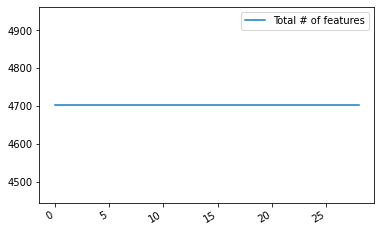

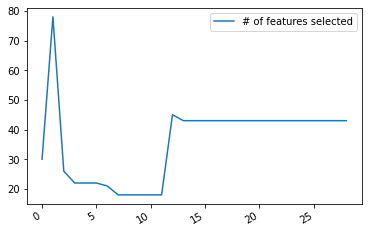

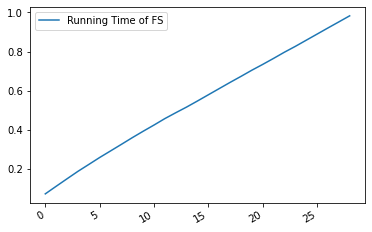

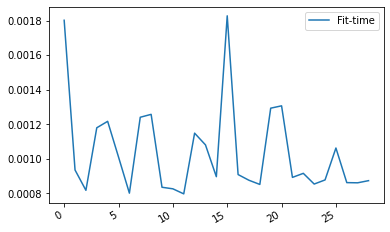

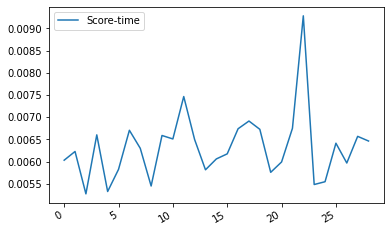

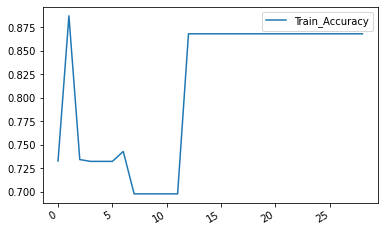

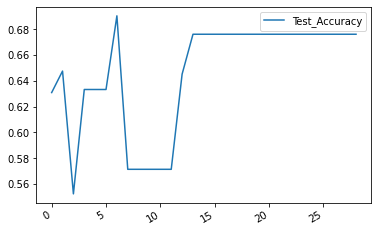

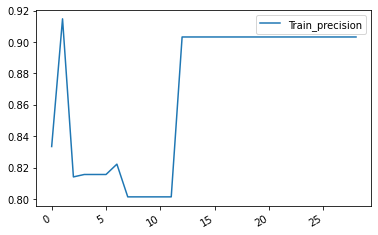

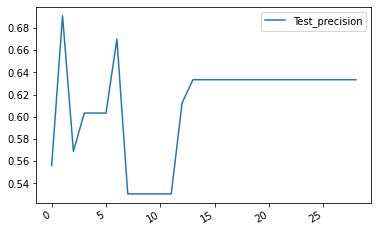

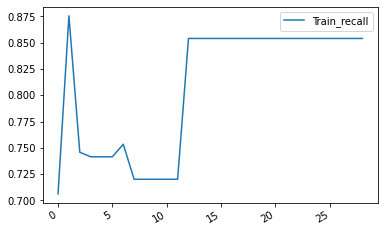

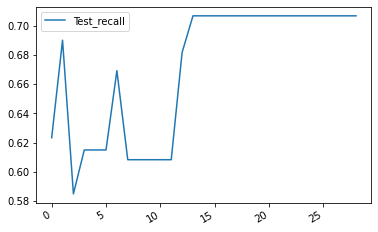

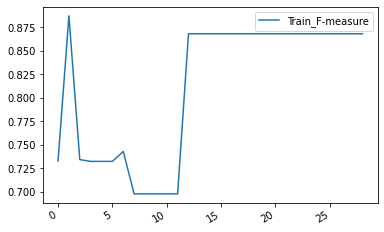

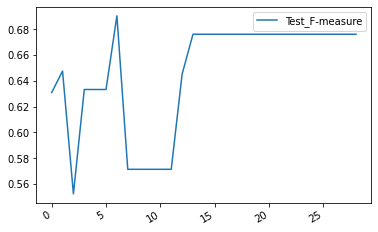

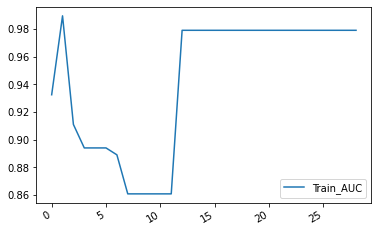

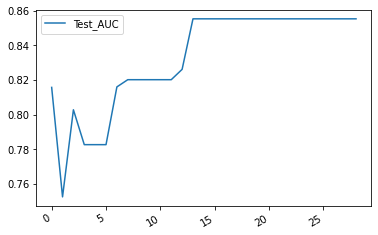

<Figure size 640x480 with 0 Axes>

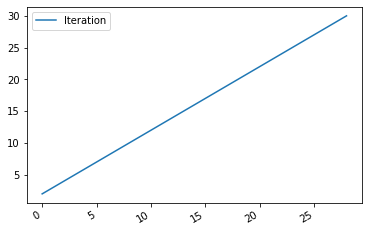

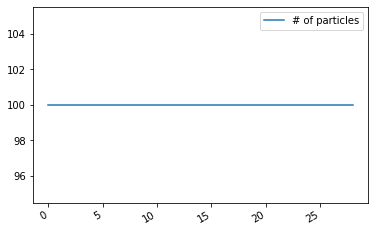

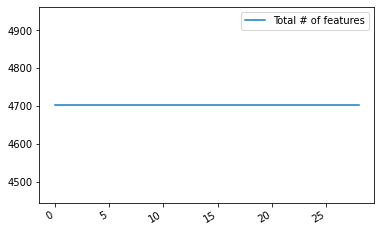

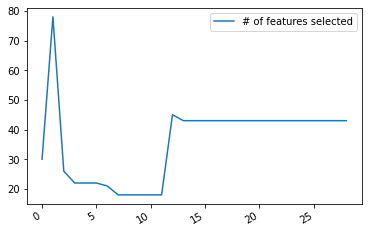

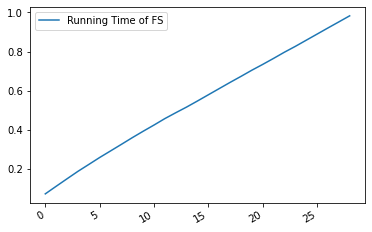

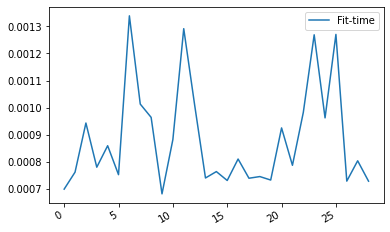

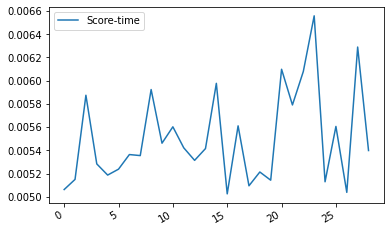

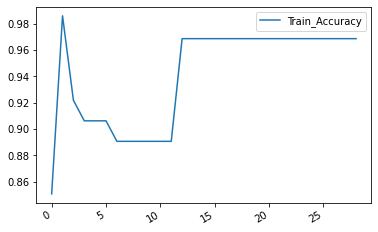

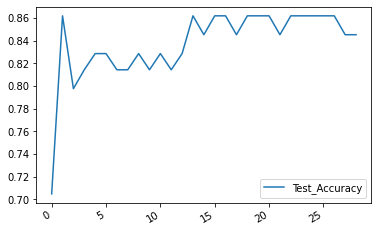

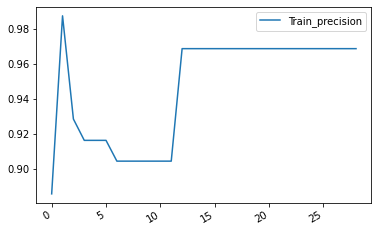

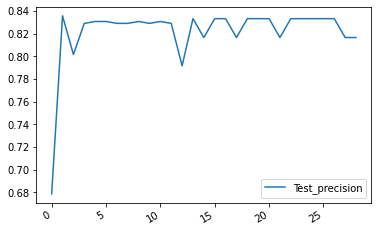

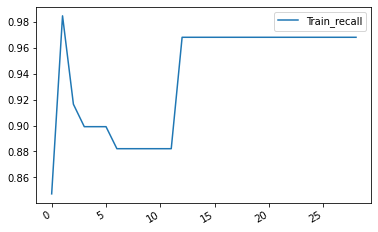

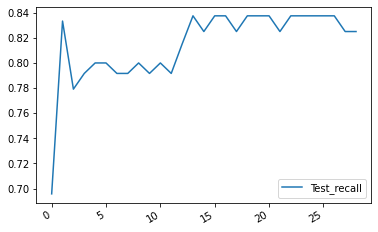

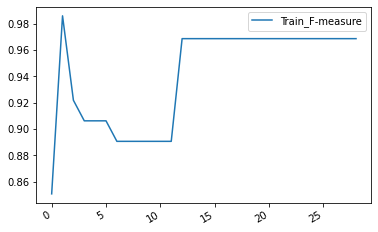

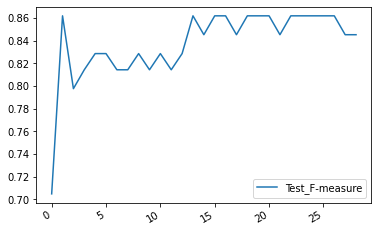

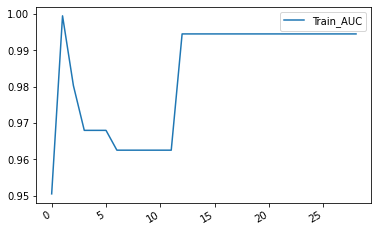

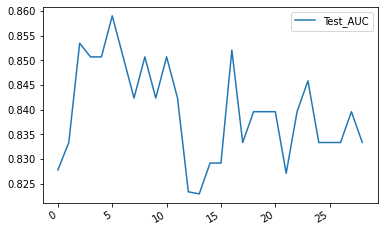

<Figure size 640x480 with 0 Axes>

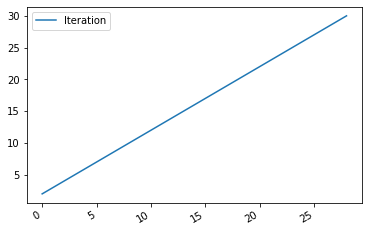

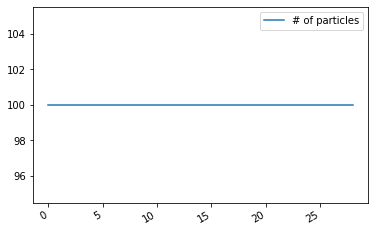

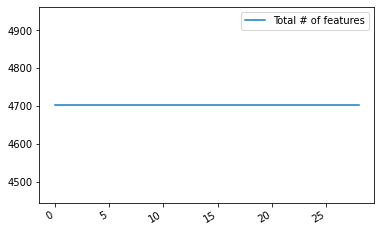

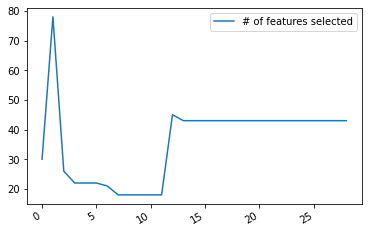

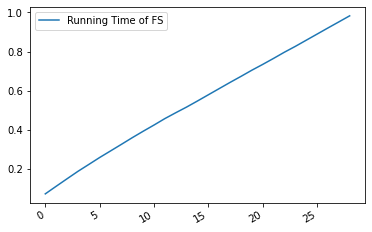

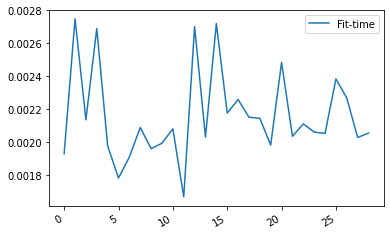

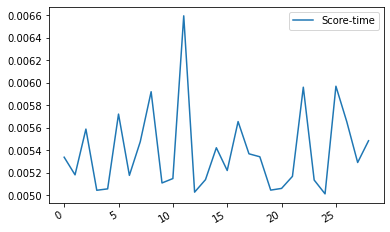

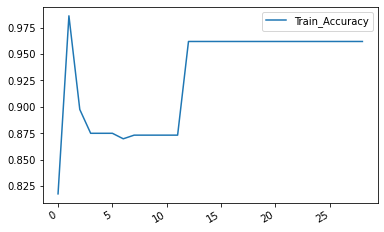

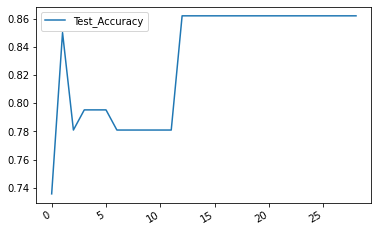

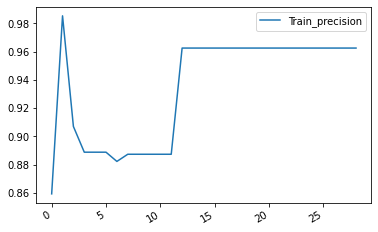

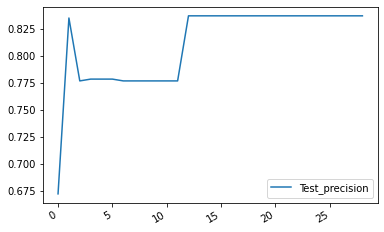

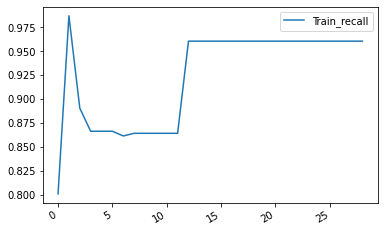

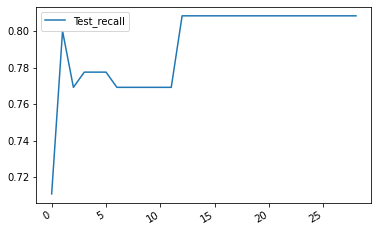

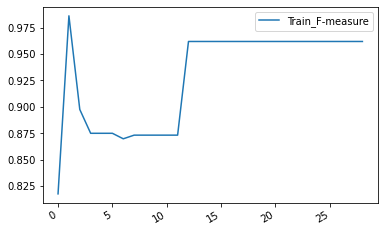

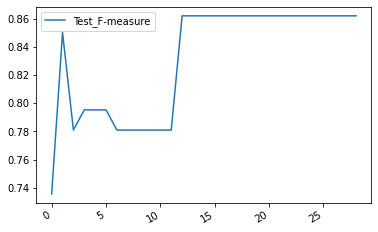

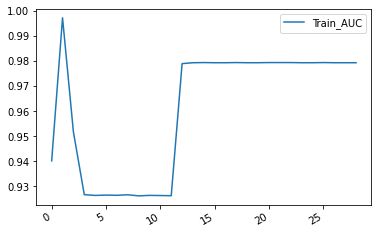

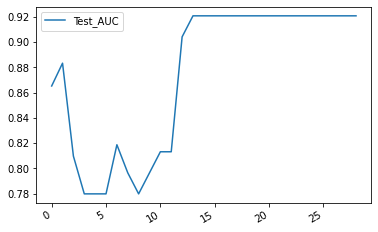

<Figure size 640x480 with 0 Axes>

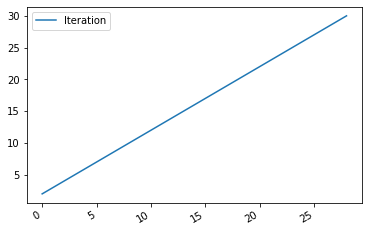

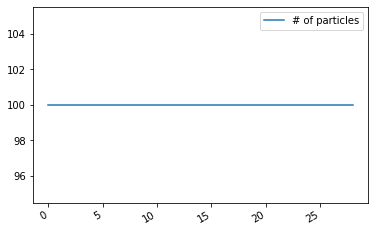

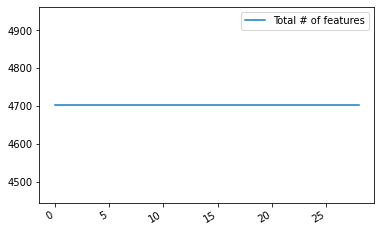

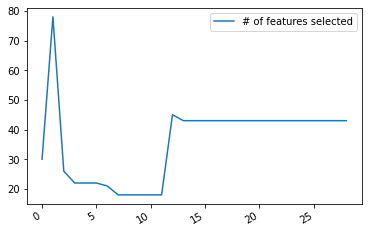

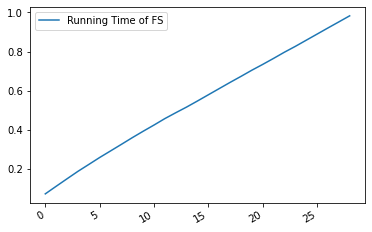

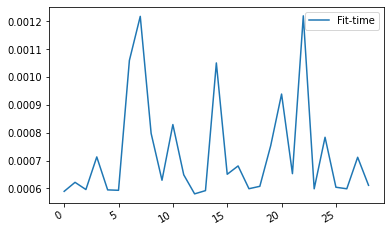

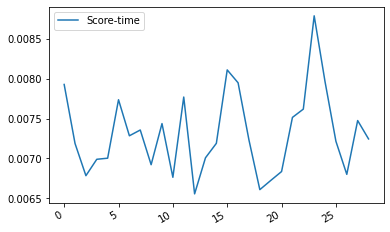

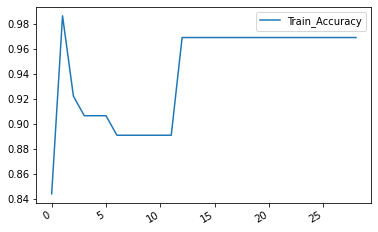

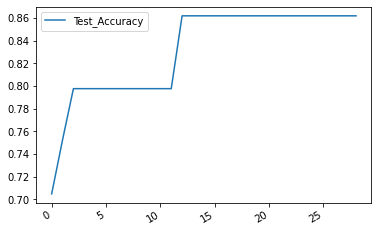

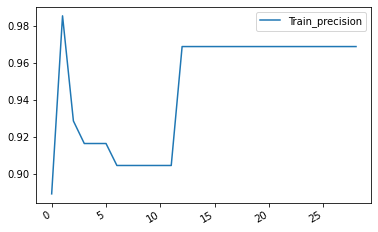

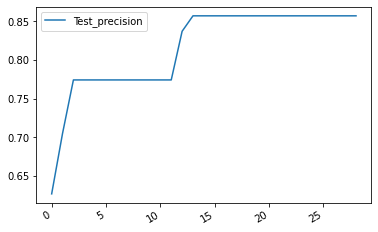

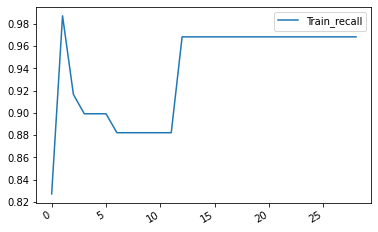

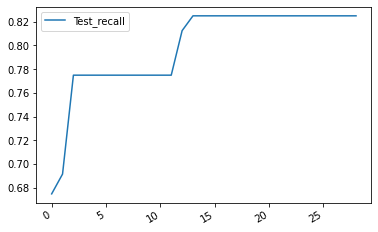

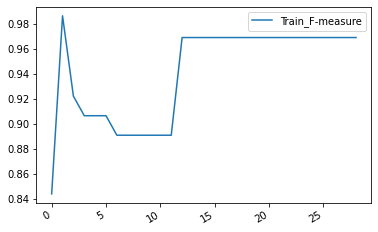

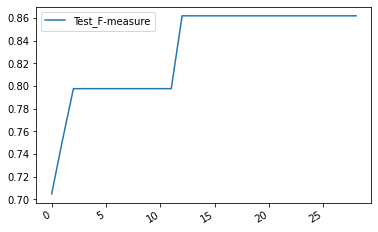

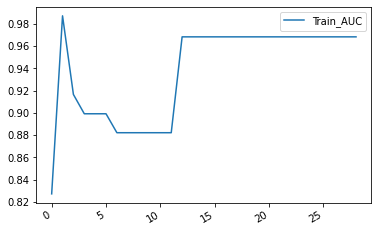

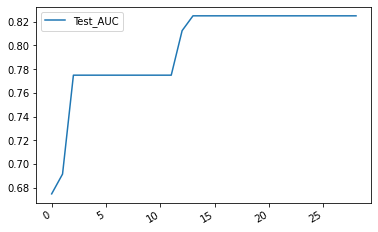

<Figure size 640x480 with 0 Axes>

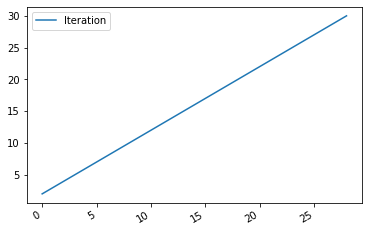

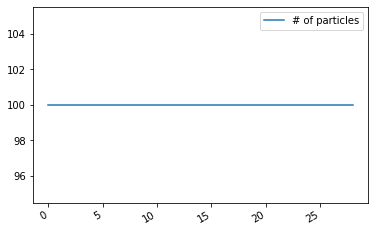

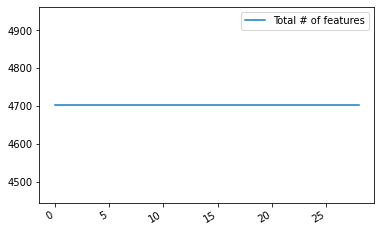

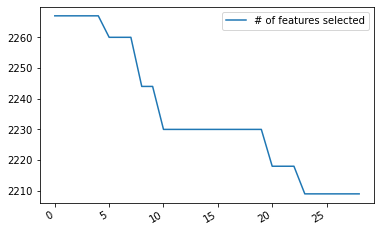

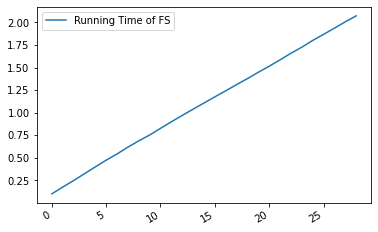

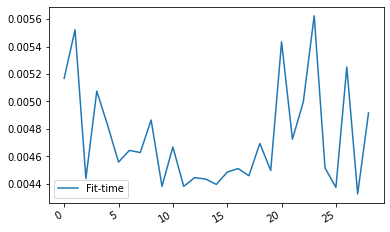

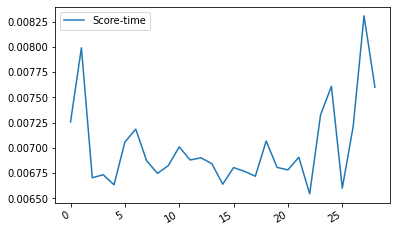

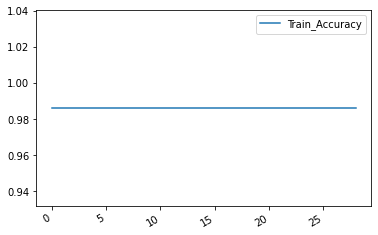

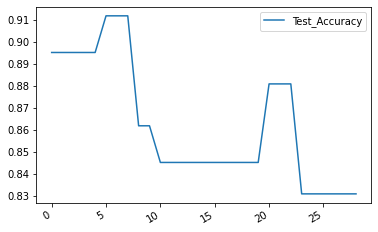

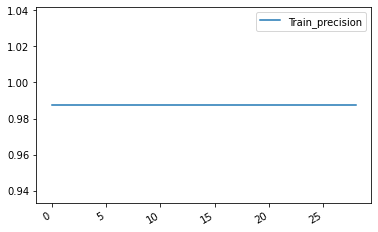

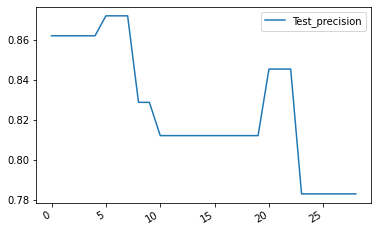

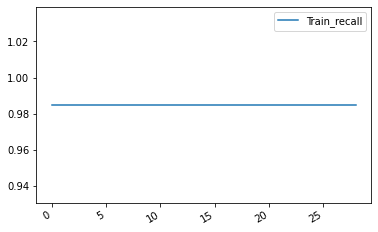

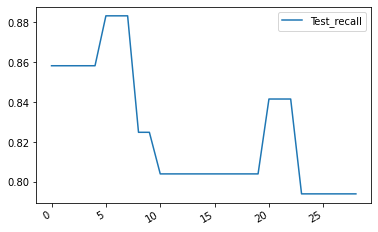

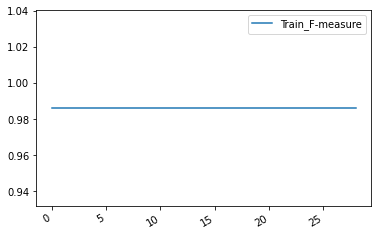

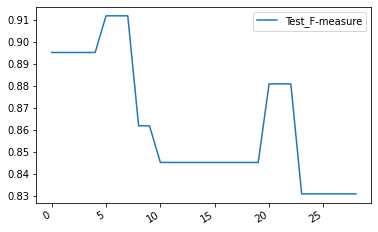

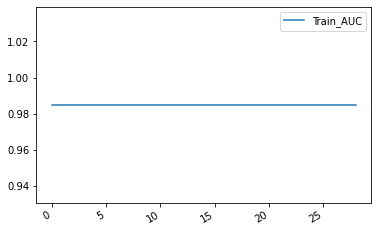

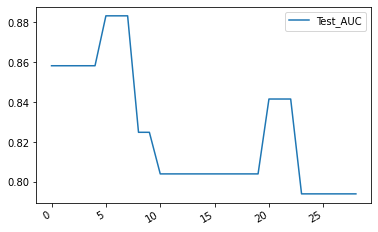

<Figure size 640x480 with 0 Axes>

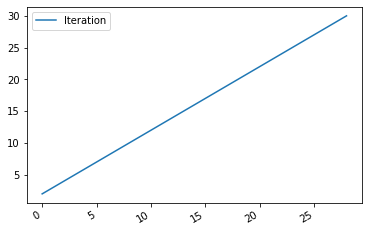

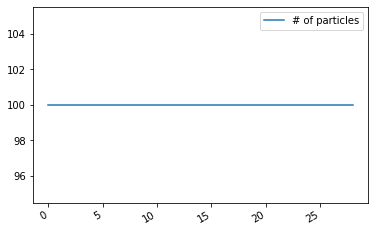

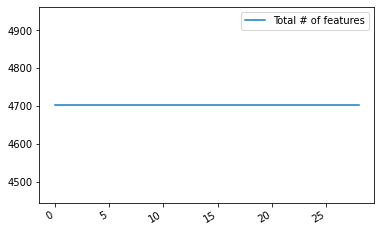

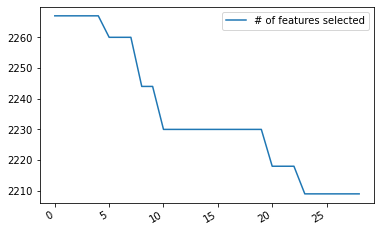

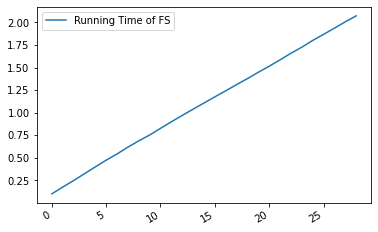

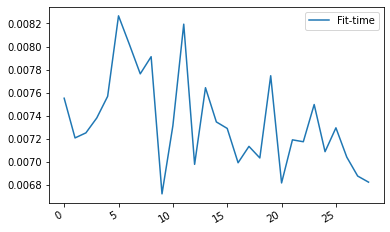

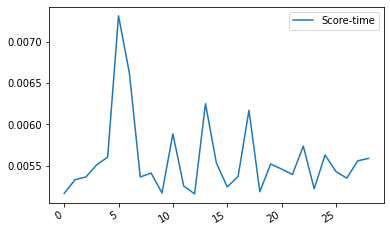

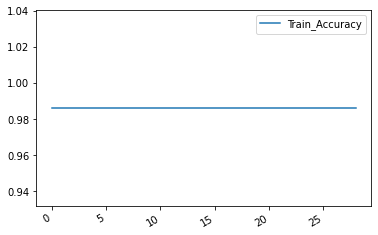

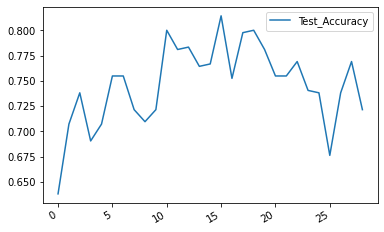

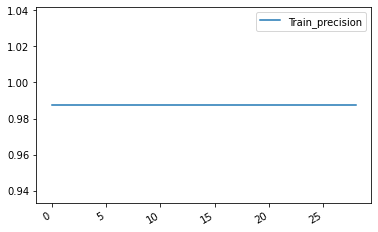

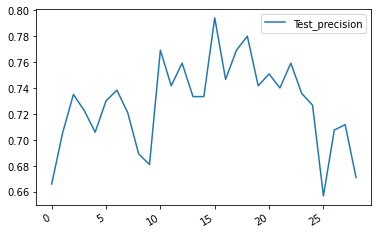

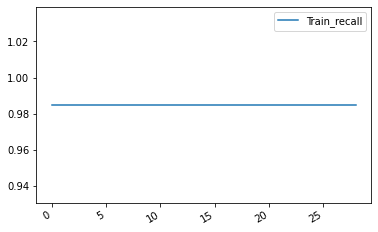

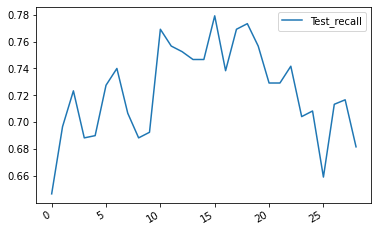

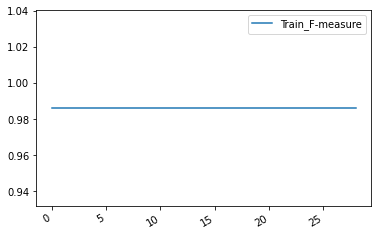

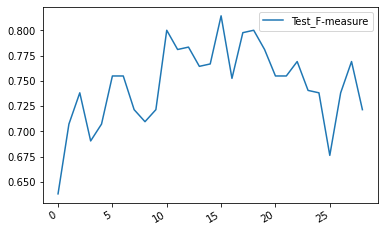

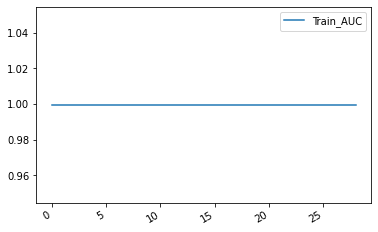

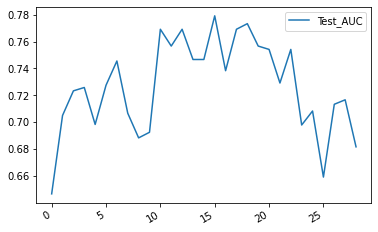

<Figure size 640x480 with 0 Axes>

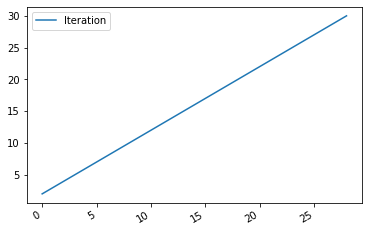

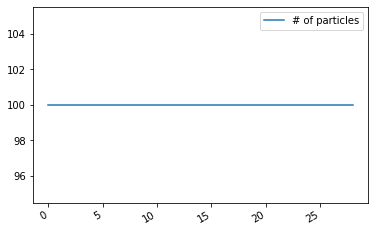

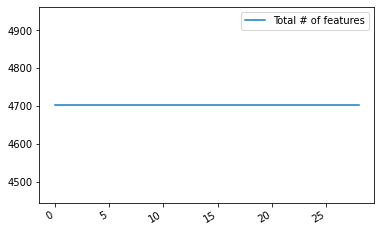

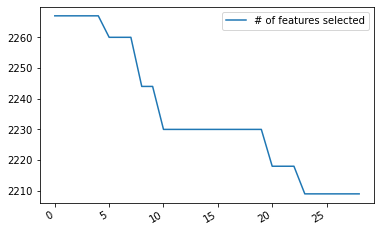

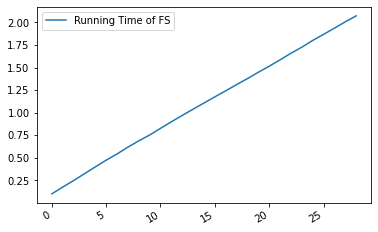

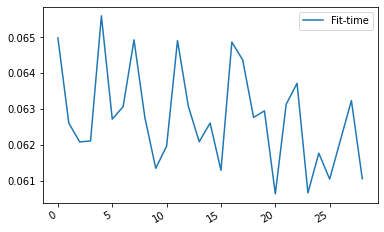

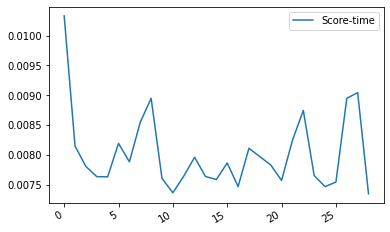

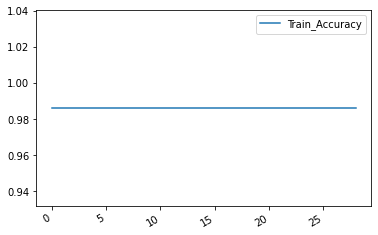

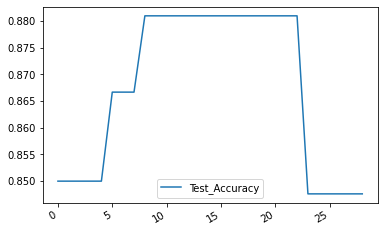

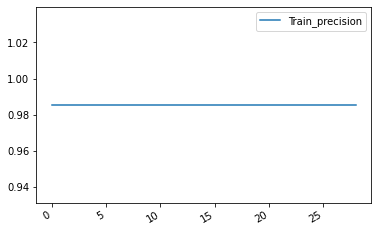

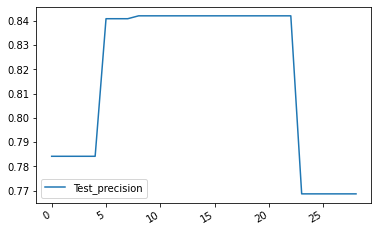

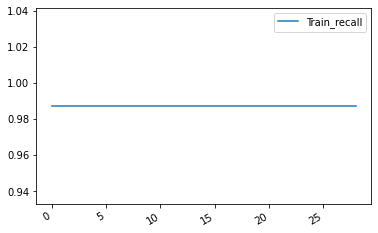

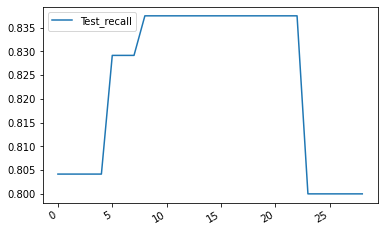

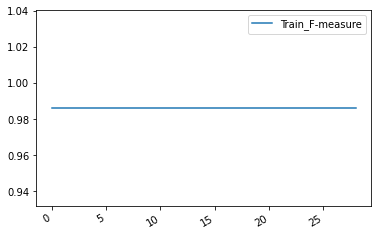

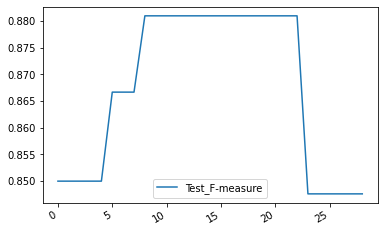

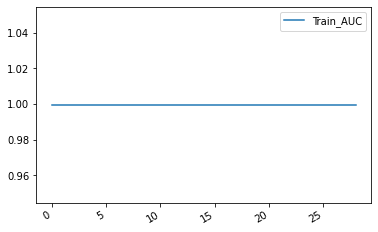

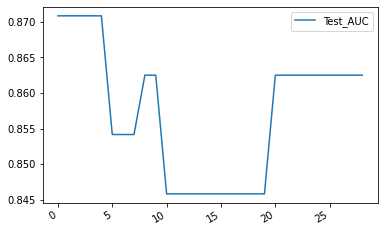

<Figure size 640x480 with 0 Axes>

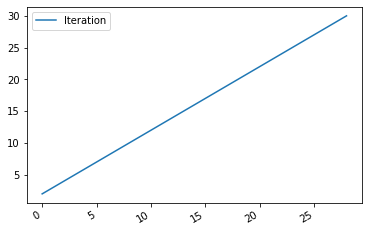

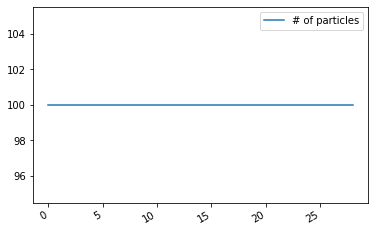

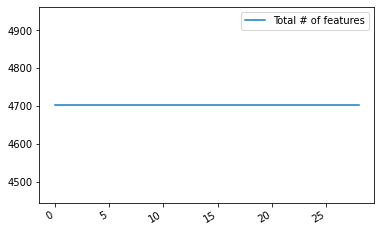

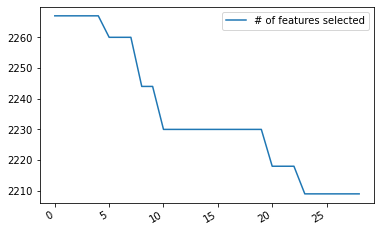

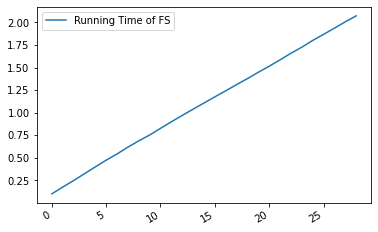

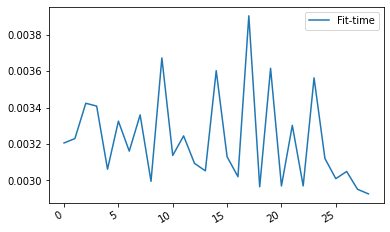

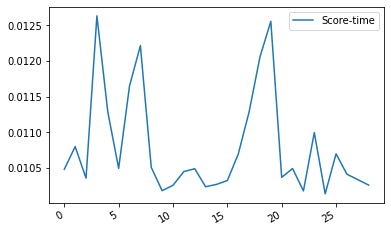

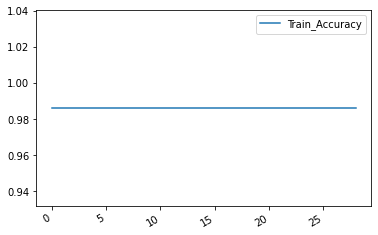

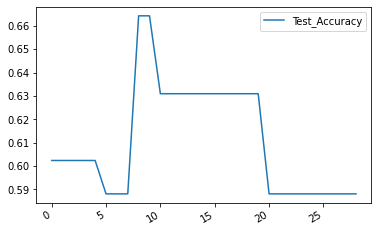

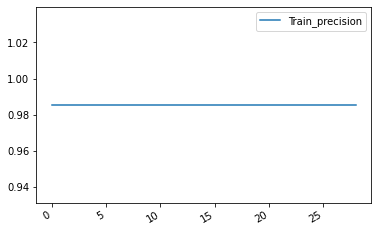

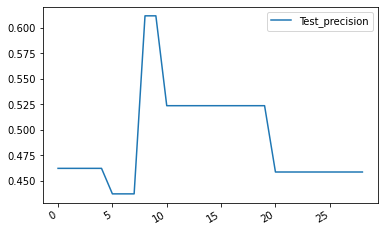

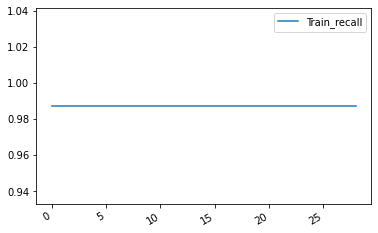

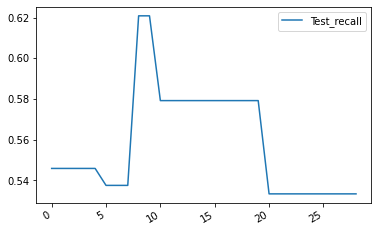

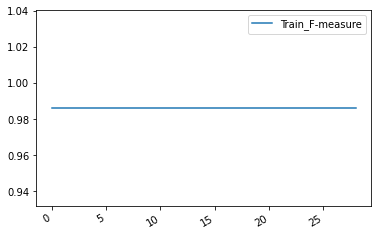

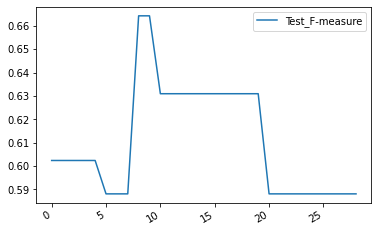

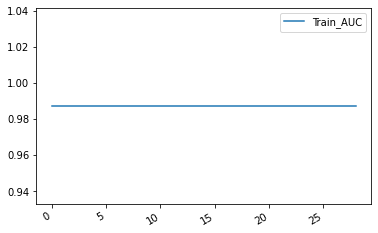

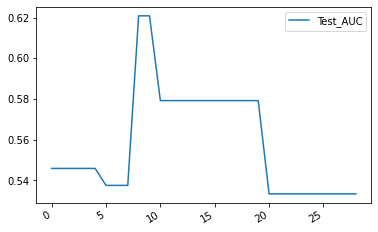

<Figure size 640x480 with 0 Axes>

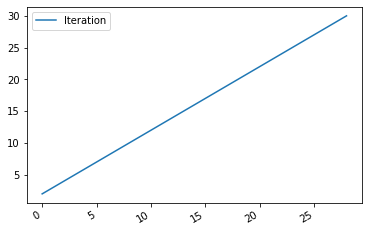

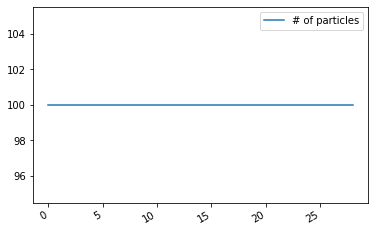

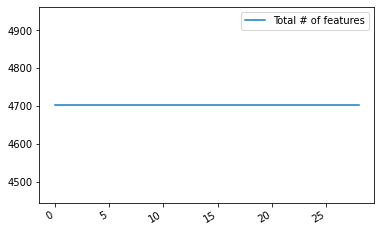

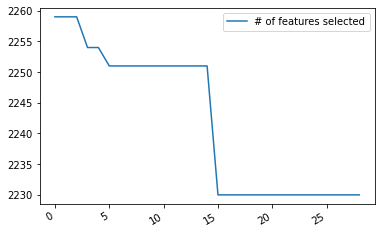

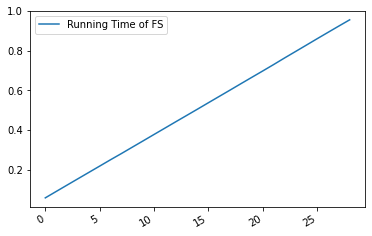

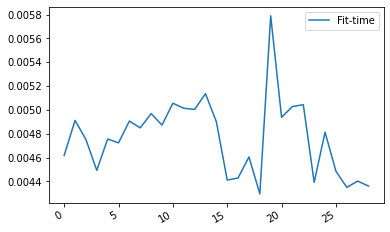

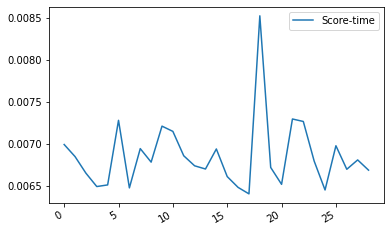

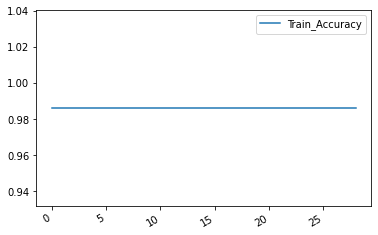

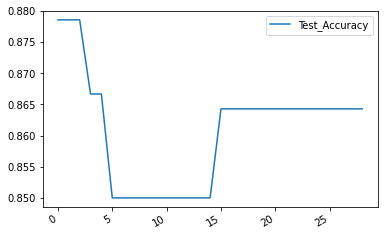

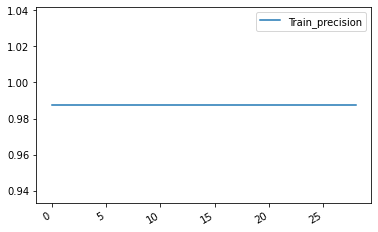

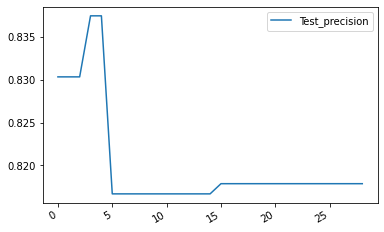

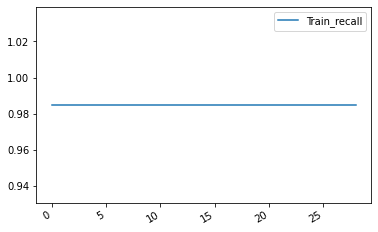

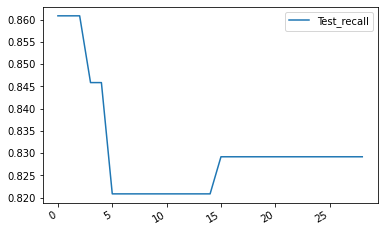

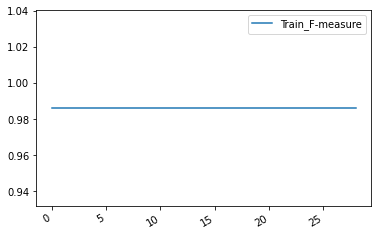

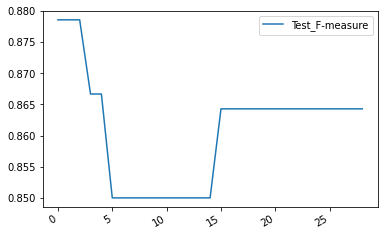

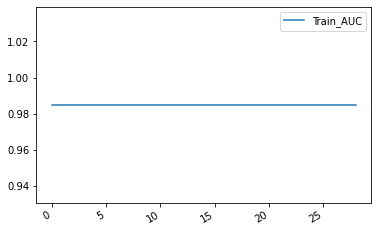

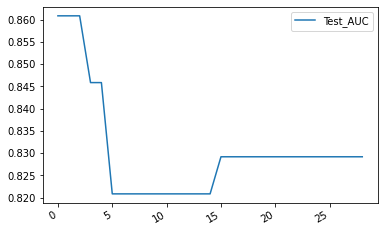

<Figure size 640x480 with 0 Axes>

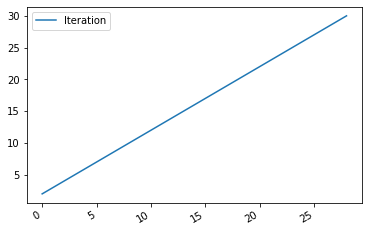

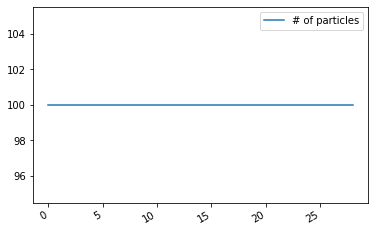

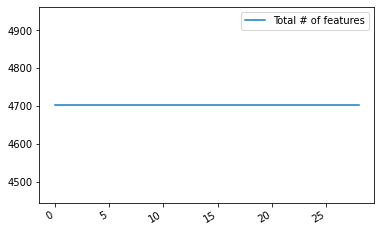

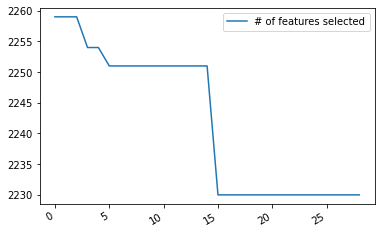

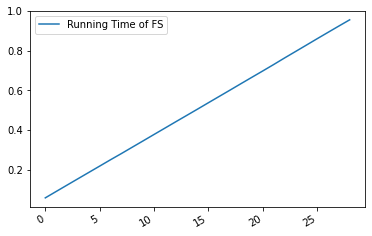

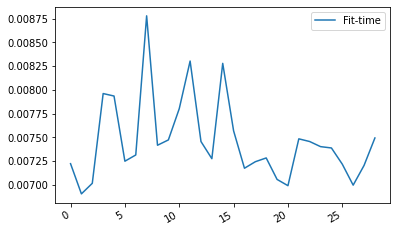

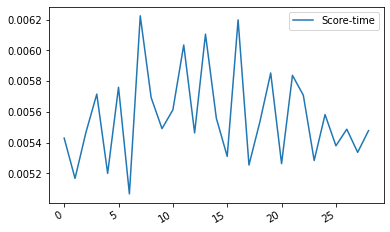

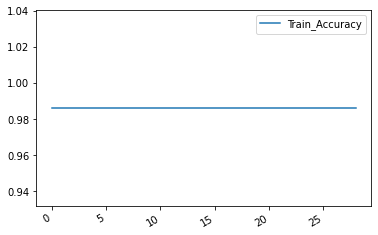

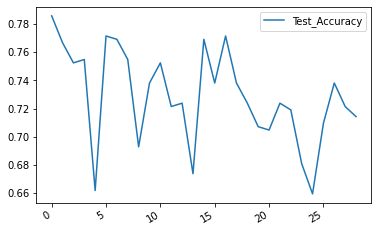

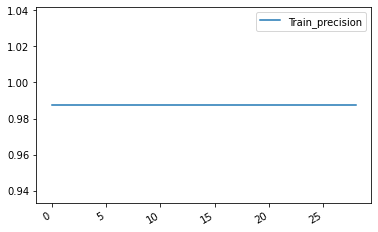

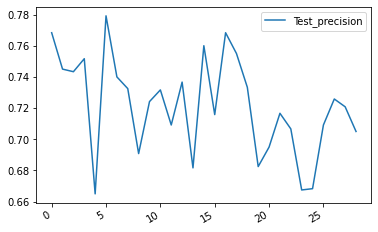

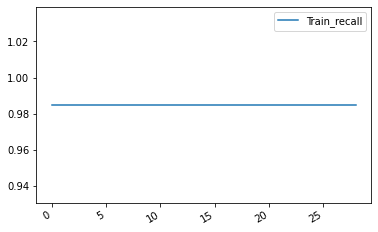

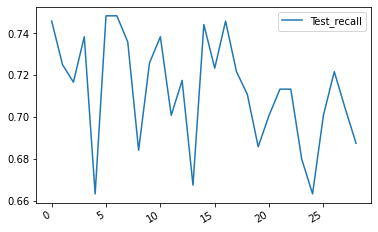

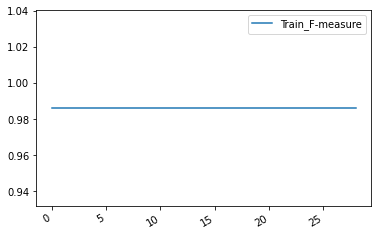

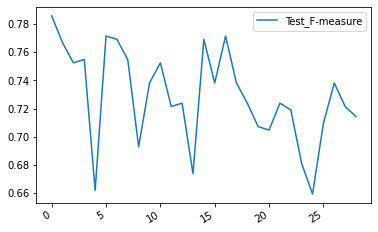

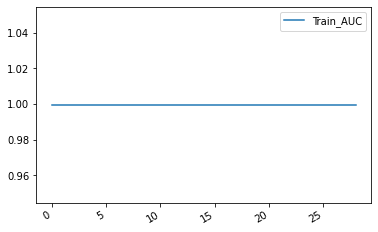

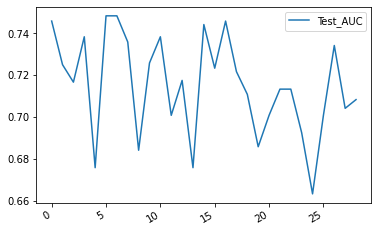

<Figure size 640x480 with 0 Axes>

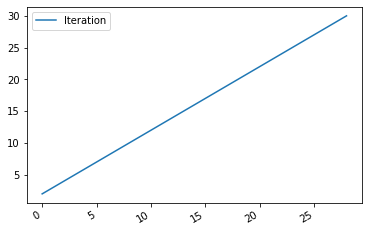

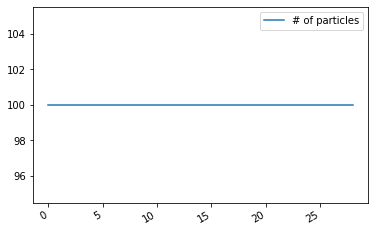

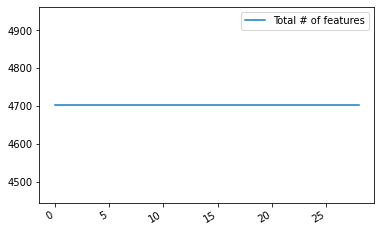

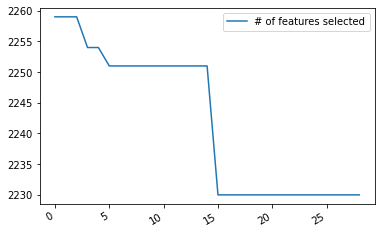

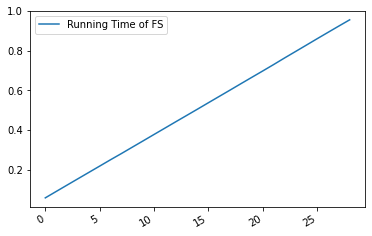

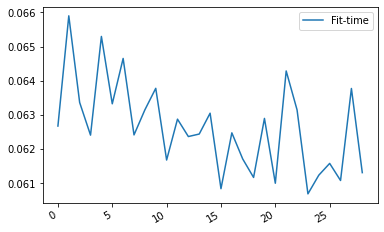

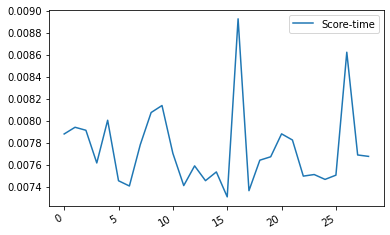

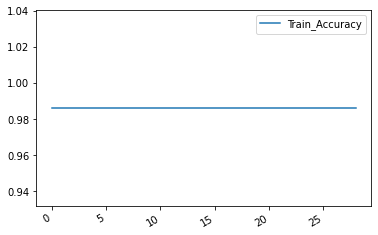

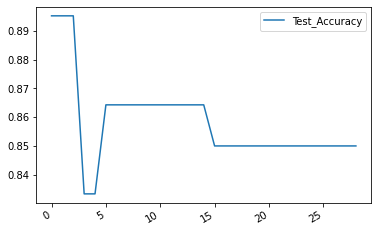

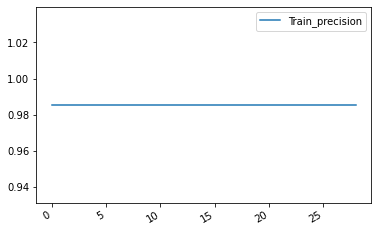

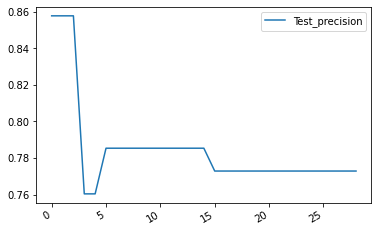

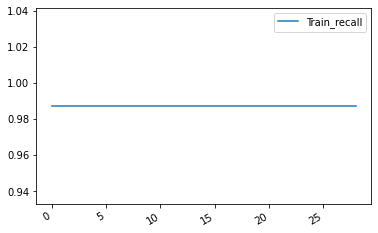

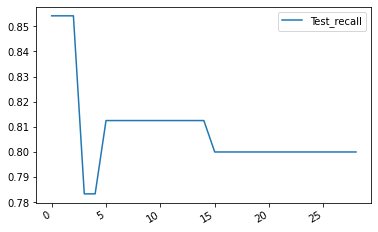

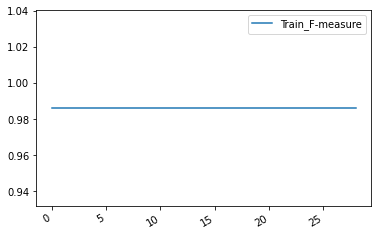

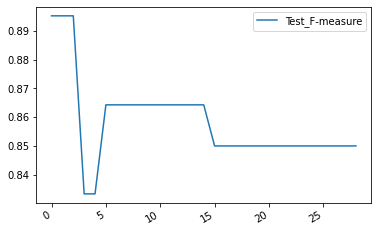

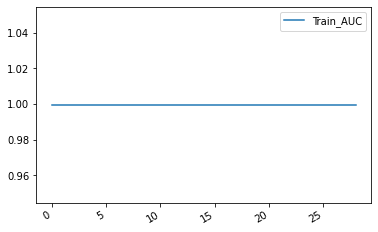

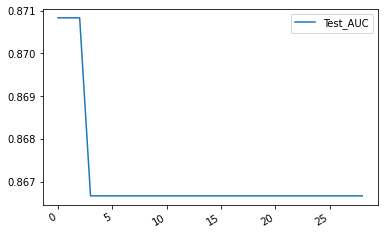

<Figure size 640x480 with 0 Axes>

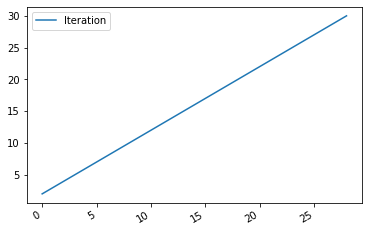

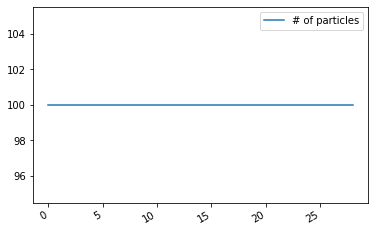

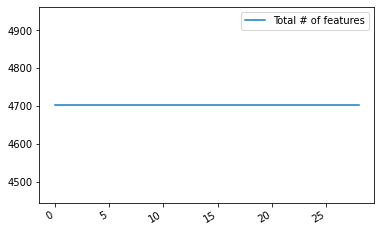

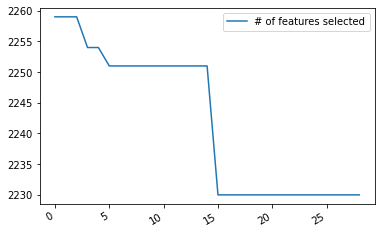

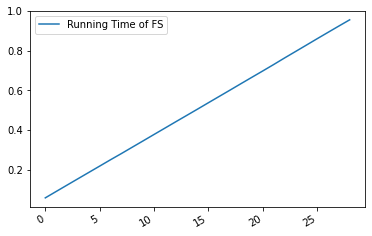

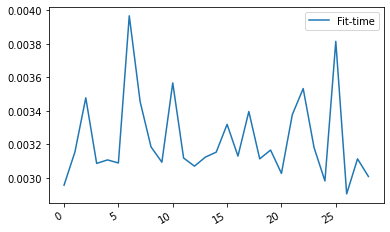

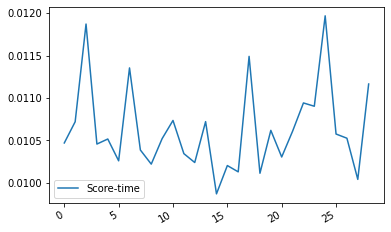

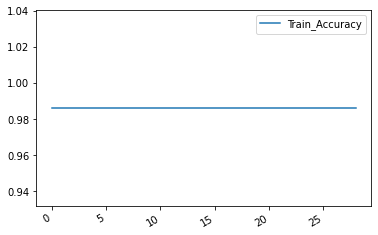

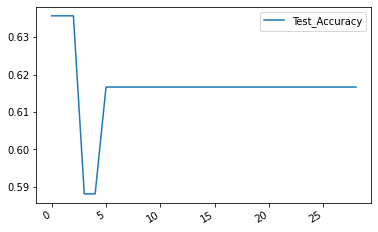

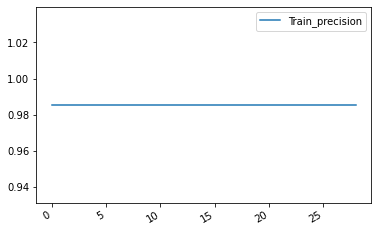

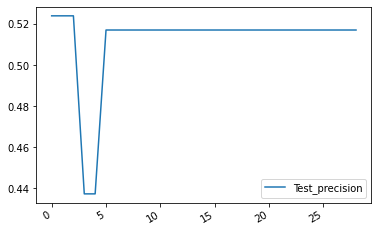

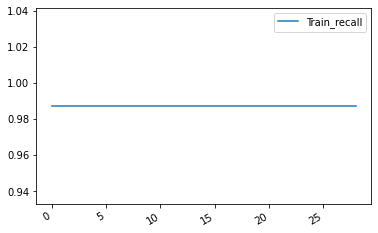

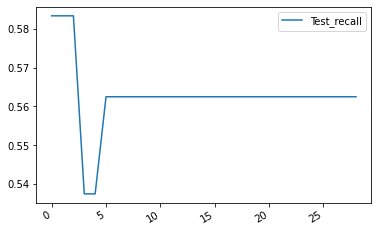

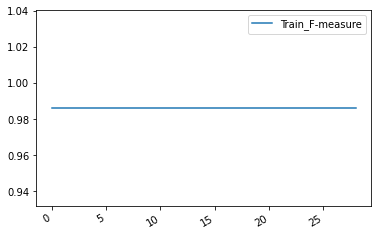

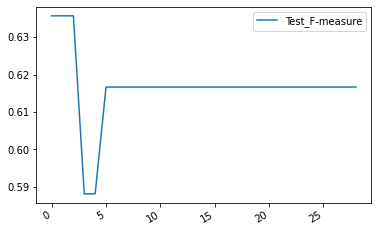

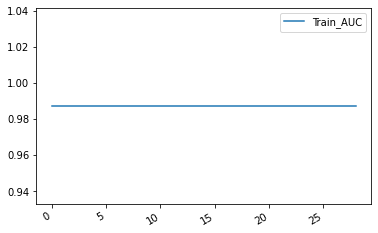

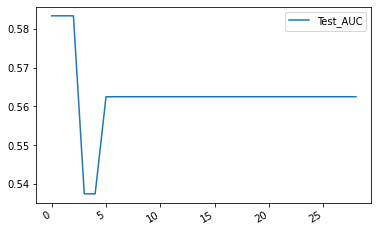

In [ ]:

# import numpy as np
# import pandas as pd
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import train_test_split
# import matplotlib.pyplot as plt
# import os

# # load data
# ds_name='dbworld_bodies'
# data  = pd.read_csv(('/content/drive/My Drive/FYP/Dataset/%s.csv')%(ds_name))
# df=data
# data  = data.values
# feat  = np.asarray(data[:, 0:-1])   # feature vector
# label = np.asarray(data[:, -1])     # label vector
# n_samples,n_features=data.shape
# # split data into train & validation (70 -- 30)
# xtrain, xtest, ytrain, ytest = train_test_split(feat, label, test_size=0.3)
# fold = {'xt':xtrain, 'yt':ytrain, 'xv':xtest, 'yv':ytest}

# gbest_tracer=0
# ## creating directories

# if not os.path.exists(('/content/drive/My Drive/FYP/Existing')):
#   os.makedirs(('/content/drive/My Drive/FYP/Existing'))




# ## Particle Swarm Optimization ( PSO )
# c=None
# rt=None
# algo_name='PSO'
# if not os.path.exists((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name))):
#   os.makedirs((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)))

# hp=('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)
# if not os.path.exists(('%s/%s')%(hp,ds_name)):
#     reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
#     results_csv=(('%s/%s/results_csv')%(hp,ds_name))
#     temp_storage=('%s/%s/temp')%(hp,ds_name)
#     results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
#     os.makedirs(('%s/%s')%(hp,ds_name))
#     os.makedirs(reduced_datasets)
#     os.makedirs(results_csv)
#     os.makedirs(results_graphs)
#     os.makedirs(temp_storage)
  
# else:
#   print("Error Already File Exists!!!!")
#   reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
#   results_csv=(('%s/%s/results_csv')%(hp,ds_name))
#   temp_storage=('%s/%s/temp')%(hp,ds_name)
#   results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
#   import sys
#   #sys.exit("Error message")



# # from FS.pso import jfs 
# # from FS.utility import *
# # parameter
# k    = 5     # k-value in KNN
# N    = 100    # number of particles
# T    = 30   # maximum number of iterations
# w    = 0.9
# c1   = 2
# c2   = 2
# opts = {'k':k, 'fold':fold, 'N':N, 'T':T, 'w':w, 'c1':c1, 'c2':c2}

# # perform feature selection
# PSO(feat, label, opts)
# plot_pdf('naive bayes')
# plot_pdf('tree')
# plot_pdf('svm_linear')
# plot_pdf('knn')

# print("For Naive Bayes")
# mean_clf('naive bayes')
# print("\nFor Tree")
# mean_clf('tree')
# print("\nFor SVM Linear")
# mean_clf('svm_linear')
# print("\nFor KNN")
# mean_clf('knn')

# ###############################################################

# ## creating directories

# if not os.path.exists(('/content/drive/My Drive/FYP/Existing')):
#   os.makedirs(('/content/drive/My Drive/FYP/Existing'))
# c=None
# rt=None
# algo_name='GA'
# if not os.path.exists((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name))):
#   os.makedirs((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)))

# hp=('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)
# if not os.path.exists(('%s/%s')%(hp,ds_name)):
#     reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
#     results_csv=(('%s/%s/results_csv')%(hp,ds_name))
#     temp_storage=('%s/%s/temp')%(hp,ds_name)
#     results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
#     os.makedirs(('%s/%s')%(hp,ds_name))
#     os.makedirs(reduced_datasets)
#     os.makedirs(results_csv)
#     os.makedirs(results_graphs)
#     os.makedirs(temp_storage)
  
# else:
#   print("Error Already File Exists!!!!")
#   reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
#   results_csv=(('%s/%s/results_csv')%(hp,ds_name))
#   temp_storage=('%s/%s/temp')%(hp,ds_name)
#   results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
#   import sys
#   #sys.exit("Error message")
# ## Genetic Algorithm ( GA )

# #from FS.ga import jfs 
# # parameter
# k    = 5     # k-value in KNN
# N    = 100    # number of chromosomes
# T    = 30   # maximum number of generations
# CR   = 0.8
# MR   = 0.01
# opts = {'k':k, 'fold':fold, 'N':N, 'T':T, 'CR':CR, 'MR':MR}

# # perform feature selection
# GA(feat, label, opts)
# plot_pdf('naive bayes')
# plot_pdf('tree')
# plot_pdf('svm_linear')
# plot_pdf('knn')

# print("For Naive Bayes")
# mean_clf('naive bayes')
# print("\nFor Tree")
# mean_clf('tree')
# print("\nFor SVM Linear")
# mean_clf('svm_linear')
# print("\nFor KNN")
# mean_clf('knn')

# #######################################################################################

# ## creating directories

# if not os.path.exists(('/content/drive/My Drive/FYP/Existing')):
#   os.makedirs(('/content/drive/My Drive/FYP/Existing'))
# c=None
# rt=None
# algo_name='FA'
# if not os.path.exists((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name))):
#   os.makedirs((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)))

# hp=('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)
# if not os.path.exists(('%s/%s')%(hp,ds_name)):
#     reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
#     results_csv=(('%s/%s/results_csv')%(hp,ds_name))
#     temp_storage=('%s/%s/temp')%(hp,ds_name)
#     results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
#     os.makedirs(('%s/%s')%(hp,ds_name))
#     os.makedirs(reduced_datasets)
#     os.makedirs(results_csv)
#     os.makedirs(results_graphs)
#     os.makedirs(temp_storage)
  
# else:
#   print("Error Already File Exists!!!!")
#   reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
#   results_csv=(('%s/%s/results_csv')%(hp,ds_name))
#   temp_storage=('%s/%s/temp')%(hp,ds_name)
#   results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
#   import sys
#   #sys.exit("Error message")
# ## Firefly Algorithm (FA)

# #from FS.fa import jfs 
# # parameter
# k    = 5     # k-value in KNN
# N    = 100    # number of chromosomes
# T    = 30   # maximum number of generations
# alpha  = 1       # constant
# beta0  = 1       # light amplitude
# gamma  = 1       # absorbtion coefficient
# theta  = 0.97    # control alpha
# opts = {'k':k, 'fold':fold, 'N':N, 'T':T, 'alpha':alpha, 'beta0':beta0, 'gamma':gamma, 'theta':theta}

# # perform feature selection
# FA(feat, label, opts)
# plot_pdf('naive bayes')
# plot_pdf('tree')
# plot_pdf('svm_linear')
# plot_pdf('knn')

# print("For Naive Bayes")
# mean_clf('naive bayes')
# print("\nFor Tree")
# mean_clf('tree')
# print("\nFor SVM Linear")
# mean_clf('svm_linear')
# print("\nFor KNN")
# mean_clf('knn')


# ##########################################################################################

# ## creating directories

# if not os.path.exists(('/content/drive/My Drive/FYP/Existing')):
#   os.makedirs(('/content/drive/My Drive/FYP/Existing'))
# c=None
# rt=None
# algo_name='CS'
# if not os.path.exists((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name))):
#   os.makedirs((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)))

# hp=('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)
# if not os.path.exists(('%s/%s')%(hp,ds_name)):
#     reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
#     results_csv=(('%s/%s/results_csv')%(hp,ds_name))
#     temp_storage=('%s/%s/temp')%(hp,ds_name)
#     results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
#     os.makedirs(('%s/%s')%(hp,ds_name))
#     os.makedirs(reduced_datasets)
#     os.makedirs(results_csv)
#     os.makedirs(results_graphs)
#     os.makedirs(temp_storage)
  
# else:
#   print("Error Already File Exists!!!!")
#   reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
#   results_csv=(('%s/%s/results_csv')%(hp,ds_name))
#   temp_storage=('%s/%s/temp')%(hp,ds_name)
#   results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
#   import sys
#   #sys.exit("Error message")
# ## Cuckoo Search (CS)
# #rom FS.cs import jfs 
# k    = 5     # k-value in KNN
# N    = 100    # number of chromosomes
# T    = 30   # maximum number of generations
# Pa  = 0.25   # discovery rate
# opts = {'k':k, 'fold':fold, 'N':N, 'T':T, 'Pa':Pa}

# # perform feature selection
# CS(feat, label, opts)
# plot_pdf('naive bayes')
# plot_pdf('tree')
# plot_pdf('svm_linear')
# plot_pdf('knn')

# print("For Naive Bayes")
# mean_clf('naive bayes')
# print("\nFor Tree")
# mean_clf('tree')
# print("\nFor SVM Linear")
# mean_clf('svm_linear')
# print("\nFor KNN")
# mean_clf('knn')


# #################################################################################

# ## creating directories

# if not os.path.exists(('/content/drive/My Drive/FYP/Existing')):
#   os.makedirs(('/content/drive/My Drive/FYP/Existing'))
# c=None
# rt=None
# algo_name='DE'
# if not os.path.exists((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name))):
#   os.makedirs((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)))

# hp=('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)
# if not os.path.exists(('%s/%s')%(hp,ds_name)):
#     reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
#     results_csv=(('%s/%s/results_csv')%(hp,ds_name))
#     temp_storage=('%s/%s/temp')%(hp,ds_name)
#     results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
#     os.makedirs(('%s/%s')%(hp,ds_name))
#     os.makedirs(reduced_datasets)
#     os.makedirs(results_csv)
#     os.makedirs(results_graphs)
#     os.makedirs(temp_storage)
  
# else:
#   print("Error Already File Exists!!!!")
#   reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
#   results_csv=(('%s/%s/results_csv')%(hp,ds_name))
#   temp_storage=('%s/%s/temp')%(hp,ds_name)
#   results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
#   import sys
#   #sys.exit("Error message")
# ##  Differential Evolution (DE)
# #from FS.de import jfs 
# k    = 5     # k-value in KNN
# N    = 100    # number of chromosomes
# T    = 30   # maximum number of generations
# CR = 0.9    # crossover rate
# F  = 0.5    # constant factor
# opts = {'k':k, 'fold':fold, 'N':N, 'T':T, 'CR':CR, 'F':F}
# # perform feature selection
# DE(feat, label, opts)
# plot_pdf('naive bayes')
# plot_pdf('tree')
# plot_pdf('svm_linear')
# plot_pdf('knn')

# print("For Naive Bayes")
# mean_clf('naive bayes')
# print("\nFor Tree")
# mean_clf('tree')
# print("\nFor SVM Linear")
# mean_clf('svm_linear')
# print("\nFor KNN")
# mean_clf('knn')


# #################################################################################

# ## creating directories

# if not os.path.exists(('/content/drive/My Drive/FYP/Existing')):
#   os.makedirs(('/content/drive/My Drive/FYP/Existing'))
# c=None
# rt=None
# algo_name='WOA'
# if not os.path.exists((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name))):
#   os.makedirs((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)))

# hp=('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)
# if not os.path.exists(('%s/%s')%(hp,ds_name)):
#     reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
#     results_csv=(('%s/%s/results_csv')%(hp,ds_name))
#     temp_storage=('%s/%s/temp')%(hp,ds_name)
#     results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
#     os.makedirs(('%s/%s')%(hp,ds_name))
#     os.makedirs(reduced_datasets)
#     os.makedirs(results_csv)
#     os.makedirs(results_graphs)
#     os.makedirs(temp_storage)
  
# else:
#   print("Error Already File Exists!!!!")
#   reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
#   results_csv=(('%s/%s/results_csv')%(hp,ds_name))
#   temp_storage=('%s/%s/temp')%(hp,ds_name)
#   results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
#   import sys
#   #sys.exit("Error message")
# ## Whale Optimization Algorithm (WOA)

# #from FS.woa import jfs 
# k    = 5     # k-value in KNN
# N    = 100    # number of chromosomes
# T    = 30   # maximum number of generations
# b  = 1    # constant
# opts = {'k':k, 'fold':fold, 'N':N, 'T':T, 'b':b}
# # perform feature selection
# WOA(feat, label, opts)
# plot_pdf('naive bayes')
# plot_pdf('tree')
# plot_pdf('svm_linear')
# plot_pdf('knn')

# print("For Naive Bayes")
# mean_clf('naive bayes')
# print("\nFor Tree")
# mean_clf('tree')
# print("\nFor SVM Linear")
# mean_clf('svm_linear')
# print("\nFor KNN")
# mean_clf('knn')

# #################################################################################

# ## creating directories

# if not os.path.exists(('/content/drive/My Drive/FYP/Existing')):
#   os.makedirs(('/content/drive/My Drive/FYP/Existing'))
# c=None
# rt=None
# algo_name='BA'
# if not os.path.exists((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name))):
#   os.makedirs((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)))

# hp=('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)
# if not os.path.exists(('%s/%s')%(hp,ds_name)):
#     reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
#     results_csv=(('%s/%s/results_csv')%(hp,ds_name))
#     temp_storage=('%s/%s/temp')%(hp,ds_name)
#     results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
#     os.makedirs(('%s/%s')%(hp,ds_name))
#     os.makedirs(reduced_datasets)
#     os.makedirs(results_csv)
#     os.makedirs(results_graphs)
#     os.makedirs(temp_storage)
  
# else:
#   print("Error Already File Exists!!!!")
#   reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
#   results_csv=(('%s/%s/results_csv')%(hp,ds_name))
#   temp_storage=('%s/%s/temp')%(hp,ds_name)
#   results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
#   import sys
#   #sys.exit("Error message")
# ## Bat Algorithm (BA)
# #from FS.ba import jfs 
# k    = 5     # k-value in KNN
# N    = 100    # number of chromosomes
# T    = 30   # maximum number of generations
# fmax   = 2      # maximum frequency
# fmin   = 0      # minimum frequency
# alpha  = 0.9    # constant
# gamma  = 0.9    # constant
# A      = 2      # maximum loudness
# r      = 1      # maximum pulse rate
# opts = {'k':k, 'fold':fold, 'N':N, 'T':T, 'fmax':fmax, 'fmin':fmin, 'alpha':alpha, 'gamma':gamma, 'A':A, 'r':r}
# # perform feature selection
# BA(feat, label, opts)
# plot_pdf('naive bayes')
# plot_pdf('tree')
# plot_pdf('svm_linear')
# plot_pdf('knn')

# print("For Naive Bayes")
# mean_clf('naive bayes')
# print("\nFor Tree")
# mean_clf('tree')
# print("\nFor SVM Linear")
# mean_clf('svm_linear')
# print("\nFor KNN")
# mean_clf('knn')

# ###########################################################################################

# ## creating directories

# if not os.path.exists(('/content/drive/My Drive/FYP/Existing')):
#   os.makedirs(('/content/drive/My Drive/FYP/Existing'))
# c=None
# rt=None
# algo_name='FPA'
# if not os.path.exists((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name))):
#   os.makedirs((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)))

# hp=('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)
# if not os.path.exists(('%s/%s')%(hp,ds_name)):
#     reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
#     results_csv=(('%s/%s/results_csv')%(hp,ds_name))
#     temp_storage=('%s/%s/temp')%(hp,ds_name)
#     results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
#     os.makedirs(('%s/%s')%(hp,ds_name))
#     os.makedirs(reduced_datasets)
#     os.makedirs(results_csv)
#     os.makedirs(results_graphs)
#     os.makedirs(temp_storage)
  
# else:
#   print("Error Already File Exists!!!!")
#   reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
#   results_csv=(('%s/%s/results_csv')%(hp,ds_name))
#   temp_storage=('%s/%s/temp')%(hp,ds_name)
#   results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
#   import sys
#   #sys.exit("Error message")
# ## Flower Pollination Algorithm (FPA)
# #from FS.fpa import jfs 
# k    = 5     # k-value in KNN
# N    = 100    # number of chromosomes
# T    = 30   # maximum number of generations
# P  = 0.8      # switch probability
# opts = {'k':k, 'fold':fold, 'N':N, 'T':T, 'P':P}
# # perform feature selection
# FPA(feat, label, opts)
# plot_pdf('naive bayes')
# plot_pdf('tree')
# plot_pdf('svm_linear')
# plot_pdf('knn')

# print("For Naive Bayes")
# mean_clf('naive bayes')
# print("\nFor Tree")
# mean_clf('tree')
# print("\nFor SVM Linear")
# mean_clf('svm_linear')
# print("\nFor KNN")
# mean_clf('knn')


# ##################################################################################

# ## creating directories

# if not os.path.exists(('/content/drive/My Drive/FYP/Existing')):
#   os.makedirs(('/content/drive/My Drive/FYP/Existing'))
# c=None
# rt=None
# algo_name='GWO'
# if not os.path.exists((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name))):
#   os.makedirs((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)))

# hp=('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)
# if not os.path.exists(('%s/%s')%(hp,ds_name)):
#     reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
#     results_csv=(('%s/%s/results_csv')%(hp,ds_name))
#     temp_storage=('%s/%s/temp')%(hp,ds_name)
#     results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
#     os.makedirs(('%s/%s')%(hp,ds_name))
#     os.makedirs(reduced_datasets)
#     os.makedirs(results_csv)
#     os.makedirs(results_graphs)
#     os.makedirs(temp_storage)
  
# else:
#   print("Error Already File Exists!!!!")
#   reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
#   results_csv=(('%s/%s/results_csv')%(hp,ds_name))
#   temp_storage=('%s/%s/temp')%(hp,ds_name)
#   results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
#   import sys
#   #sys.exit("Error message")
# ## Grey Wolf Optimizer	


# #from FS.gwo import jfs 
# k    = 5     # k-value in KNN
# N    = 100    # number of chromosomes
# T    = 30   # maximum number of generations
# opts = {'k':k, 'fold':fold, 'N':N, 'T':T}
# # perform feature selection
# GWO(feat, label, opts)
# plot_pdf('naive bayes')
# plot_pdf('tree')
# plot_pdf('svm_linear')
# plot_pdf('knn')

# print("For Naive Bayes")
# mean_clf('naive bayes')
# print("\nFor Tree")
# mean_clf('tree')
# print("\nFor SVM Linear")
# mean_clf('svm_linear')
# print("\nFor KNN")
# mean_clf('knn')

# #################################################################################


# ## creating directories

# if not os.path.exists(('/content/drive/My Drive/FYP/Existing')):
#   os.makedirs(('/content/drive/My Drive/FYP/Existing'))
# c=None
# rt=None
# algo_name='HHO'
# if not os.path.exists((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name))):
#   os.makedirs((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)))

# hp=('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)
# if not os.path.exists(('%s/%s')%(hp,ds_name)):
#     reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
#     results_csv=(('%s/%s/results_csv')%(hp,ds_name))
#     temp_storage=('%s/%s/temp')%(hp,ds_name)
#     results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
#     os.makedirs(('%s/%s')%(hp,ds_name))
#     os.makedirs(reduced_datasets)
#     os.makedirs(results_csv)
#     os.makedirs(results_graphs)
#     os.makedirs(temp_storage)
  
# else:
#   print("Error Already File Exists!!!!")
#   reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
#   results_csv=(('%s/%s/results_csv')%(hp,ds_name))
#   temp_storage=('%s/%s/temp')%(hp,ds_name)
#   results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
#   import sys
#   #sys.exit("Error message")
# ## Harris Hawk Optimization	

# #from FS.hho import jfs 
# k    = 5     # k-value in KNN
# N    = 100    # number of chromosomes
# T    = 30   # maximum number of generations
# opts = {'k':k, 'fold':fold, 'N':N, 'T':T}
# # perform feature selection
# HHO(feat, label, opts)
# plot_pdf('naive bayes')
# plot_pdf('tree')
# plot_pdf('svm_linear')
# plot_pdf('knn')

# print("For Naive Bayes")
# mean_clf('naive bayes')
# print("\nFor Tree")
# mean_clf('tree')
# print("\nFor SVM Linear")
# mean_clf('svm_linear')
# print("\nFor KNN")
# mean_clf('knn')


# ################################################################################

# ## creating directories

# if not os.path.exists(('/content/drive/My Drive/FYP/Existing')):
#   os.makedirs(('/content/drive/My Drive/FYP/Existing'))
# c=None
# rt=None
# algo_name='SSA'
# if not os.path.exists((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name))):
#   os.makedirs((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)))

# hp=('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)
# if not os.path.exists(('%s/%s')%(hp,ds_name)):
#     reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
#     results_csv=(('%s/%s/results_csv')%(hp,ds_name))
#     temp_storage=('%s/%s/temp')%(hp,ds_name)
#     results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
#     os.makedirs(('%s/%s')%(hp,ds_name))
#     os.makedirs(reduced_datasets)
#     os.makedirs(results_csv)
#     os.makedirs(results_graphs)
#     os.makedirs(temp_storage)
  
# else:
#   print("Error Already File Exists!!!!")
#   reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
#   results_csv=(('%s/%s/results_csv')%(hp,ds_name))
#   temp_storage=('%s/%s/temp')%(hp,ds_name)
#   results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
#   import sys
#   #sys.exit("Error message")
# ## Salp Swarm Algorithm	
# #from FS.ssa import jfs 
# k    = 5     # k-value in KNN
# N    = 100    # number of chromosomes
# T    = 30   # maximum number of generations
# opts = {'k':k, 'fold':fold, 'N':N, 'T':T}
# # perform feature selection
# SSA(feat, label, opts)
# plot_pdf('naive bayes')
# plot_pdf('tree')
# plot_pdf('svm_linear')
# plot_pdf('knn')

# print("For Naive Bayes")
# mean_clf('naive bayes')
# print("\nFor Tree")
# mean_clf('tree')
# print("\nFor SVM Linear")
# mean_clf('svm_linear')
# print("\nFor KNN")
# mean_clf('knn')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## down

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os

# load data
ds_name='SCADI'
data  = pd.read_csv(('/content/drive/My Drive/FYP/Dataset/%s.csv')%(ds_name))
df=data
data  = data.values
feat  = np.asarray(data[:, 0:-1])   # feature vector
label = np.asarray(data[:, -1])     # label vector
n_samples,n_features=data.shape
# split data into train & validation (70 -- 30)
xtrain, xtest, ytrain, ytest = train_test_split(feat, label, test_size=0.3)
fold = {'xt':xtrain, 'yt':ytrain, 'xv':xtest, 'yv':ytest}


## creating directories

if not os.path.exists(('/content/drive/My Drive/FYP/Existing')):
  os.makedirs(('/content/drive/My Drive/FYP/Existing'))




## Particle Swarm Optimization ( PSO )
c=None
rt=None
algo_name='PSO'
if not os.path.exists((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name))):
  os.makedirs((('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)))

hp=('/content/drive/My Drive/FYP/Existing/%s')%(algo_name)
if not os.path.exists(('%s/%s')%(hp,ds_name)):
    reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
    results_csv=(('%s/%s/results_csv')%(hp,ds_name))
    temp_storage=('%s/%s/temp')%(hp,ds_name)
    results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
    os.makedirs(('%s/%s')%(hp,ds_name))
    os.makedirs(reduced_datasets)
    os.makedirs(results_csv)
    os.makedirs(results_graphs)
    os.makedirs(temp_storage)
  
else:
  print("Error Already File Exists!!!!")
  reduced_datasets=('%s/%s/reduced_datasets')%(hp,ds_name)
  results_csv=(('%s/%s/results_csv')%(hp,ds_name))
  temp_storage=('%s/%s/temp')%(hp,ds_name)
  results_graphs=(('%s/%s/results_graphs')%(hp,ds_name))
  import sys
  #sys.exit("Error message")



# from FS.pso import jfs 
# from FS.utility import *
# parameter
k    = 5     # k-value in KNN
N    = 10    # number of particles
T    = 100   # maximum number of iterations
w    = 0.9
c1   = 2
c2   = 2
opts = {'k':k, 'fold':fold, 'N':N, 'T':T, 'w':w, 'c1':c1, 'c2':c2}

# perform feature selection
fmdl = jfs(feat, label, opts)
# sf   = fmdl['sf']

# # number of selected features
# num_feat = fmdl['nf']
# print("Feature Size:", num_feat)
# #print(sf.shape)
# sf=np.append(sf,n_features-1)
# #sf=sf.reshape(1,len(sf))
# #print(sf.shape)
# df=data[:,sf]
# df= pd.DataFrame(data=df)
# nb_tree_svm(df)



plot_pdf('naive bayes')
plot_pdf('tree')
plot_pdf('svm_linear')
plot_pdf('knn')

print("For Naive Bayes")
mean_clf('naive bayes')
print("\nFor Tree")
mean_clf('tree')
print("\nFor SVM Linear")
mean_clf('svm_linear')
print("\nFor KNN")
mean_clf('knn')







## Genetic Algorithm ( GA )

from FS.ga import jfs 
# parameter
k    = 5     # k-value in KNN
N    = 10    # number of chromosomes
T    = 100   # maximum number of generations
CR   = 0.8
MR   = 0.01
opts = {'k':k, 'fold':fold, 'N':N, 'T':T, 'CR':CR, 'MR':MR}

# perform feature selection
fmdl = jfs(feat, label, opts)
sf   = fmdl['sf']

# number of selected features
num_feat = fmdl['nf']
print("Feature Size:", num_feat)
#print(sf.shape)
sf=np.append(sf,n_features-1)
#sf=sf.reshape(1,len(sf))
#print(sf.shape)
df=data[:,sf]
df= pd.DataFrame(data=df)
nb_tree_svm(df)



plot_pdf('naive bayes')
plot_pdf('tree')
plot_pdf('svm_linear')
plot_pdf('knn')

print("For Naive Bayes")
mean_clf('naive bayes')
print("\nFor Tree")
mean_clf('tree')
print("\nFor SVM Linear")
mean_clf('svm_linear')
print("\nFor KNN")
mean_clf('knn')






## Firefly Algorithm (FA)

from FS.fa import jfs 
# parameter
k    = 5     # k-value in KNN
N    = 10    # number of chromosomes
T    = 100   # maximum number of generations
alpha  = 1       # constant
beta0  = 1       # light amplitude
gamma  = 1       # absorbtion coefficient
theta  = 0.97    # control alpha
opts = {'k':k, 'fold':fold, 'N':N, 'T':T, 'alpha':alpha, 'beta0':beta0, 'gamma':gamma, 'theta':theta}

# perform feature selection
fmdl = jfs(feat, label, opts)
sf   = fmdl['sf']

# number of selected features
num_feat = fmdl['nf']
print("Feature Size:", num_feat)
#print(sf.shape)
sf=np.append(sf,n_features-1)
#sf=sf.reshape(1,len(sf))
#print(sf.shape)
df=data[:,sf]
df= pd.DataFrame(data=df)
nb_tree_svm(df)


plot_pdf('naive bayes')
plot_pdf('tree')
plot_pdf('svm_linear')
plot_pdf('knn')

print("For Naive Bayes")
mean_clf('naive bayes')
print("\nFor Tree")
mean_clf('tree')
print("\nFor SVM Linear")
mean_clf('svm_linear')
print("\nFor KNN")
mean_clf('knn')






## Cuckoo Search (CS)
from FS.cs import jfs 
k    = 5     # k-value in KNN
N    = 10    # number of chromosomes
T    = 100   # maximum number of generations
Pa  = 0.25   # discovery rate
opts = {'k':k, 'fold':fold, 'N':N, 'T':T, 'Pa':Pa}

# perform feature selection
fmdl = jfs(feat, label, opts)
sf   = fmdl['sf']

# number of selected features
num_feat = fmdl['nf']
print("Feature Size:", num_feat)
#print(sf.shape)
sf=np.append(sf,n_features-1)
#sf=sf.reshape(1,len(sf))
#print(sf.shape)
df=data[:,sf]
df= pd.DataFrame(data=df)
nb_tree_svm(df)


plot_pdf('naive bayes')
plot_pdf('tree')
plot_pdf('svm_linear')
plot_pdf('knn')

print("For Naive Bayes")
mean_clf('naive bayes')
print("\nFor Tree")
mean_clf('tree')
print("\nFor SVM Linear")
mean_clf('svm_linear')
print("\nFor KNN")
mean_clf('knn')






##  Differential Evolution (DE)
#from FS.de import jfs 
k    = 5     # k-value in KNN
N    = 10    # number of chromosomes
T    = 100   # maximum number of generations
CR = 0.9    # crossover rate
F  = 0.5    # constant factor
opts = {'k':k, 'fold':fold, 'N':N, 'T':T, 'CR':CR, 'F':F}
# perform feature selection
fmdl = jfs(feat, label, opts)
sf   = fmdl['sf']

# number of selected features
num_feat = fmdl['nf']
print("Feature Size:", num_feat)
#print(sf.shape)
sf=np.append(sf,n_features-1)
#sf=sf.reshape(1,len(sf))
#print(sf.shape)
df=data[:,sf]
df= pd.DataFrame(data=df)
nb_tree_svm(df)


plot_pdf('naive bayes')
plot_pdf('tree')
plot_pdf('svm_linear')
plot_pdf('knn')

print("For Naive Bayes")
mean_clf('naive bayes')
print("\nFor Tree")
mean_clf('tree')
print("\nFor SVM Linear")
mean_clf('svm_linear')
print("\nFor KNN")
mean_clf('knn')





## Whale Optimization Algorithm (WOA)

from FS.woa import jfs 
k    = 5     # k-value in KNN
N    = 10    # number of chromosomes
T    = 100   # maximum number of generations
b  = 1    # constant
opts = {'k':k, 'fold':fold, 'N':N, 'T':T, 'b':b}
# perform feature selection
fmdl = jfs(feat, label, opts)
sf   = fmdl['sf']

# number of selected features
num_feat = fmdl['nf']
print("Feature Size:", num_feat)
#print(sf.shape)
sf=np.append(sf,n_features-1)
#sf=sf.reshape(1,len(sf))
#print(sf.shape)
df=data[:,sf]
df= pd.DataFrame(data=df)
nb_tree_svm(df)


plot_pdf('naive bayes')
plot_pdf('tree')
plot_pdf('svm_linear')
plot_pdf('knn')

print("For Naive Bayes")
mean_clf('naive bayes')
print("\nFor Tree")
mean_clf('tree')
print("\nFor SVM Linear")
mean_clf('svm_linear')
print("\nFor KNN")
mean_clf('knn')





## Bat Algorithm (BA)
from FS.ba import jfs 
k    = 5     # k-value in KNN
N    = 10    # number of chromosomes
T    = 100   # maximum number of generations
fmax   = 2      # maximum frequency
fmin   = 0      # minimum frequency
alpha  = 0.9    # constant
gamma  = 0.9    # constant
A      = 2      # maximum loudness
r      = 1      # maximum pulse rate
opts = {'k':k, 'fold':fold, 'N':N, 'T':T, 'fmax':fmax, 'fmin':fmin, 'alpha':alpha, 'gamma':gamma, 'A':A, 'r':r}
# perform feature selection
fmdl = jfs(feat, label, opts)
sf   = fmdl['sf']

# number of selected features
num_feat = fmdl['nf']
print("Feature Size:", num_feat)
#print(sf.shape)
sf=np.append(sf,n_features-1)
#sf=sf.reshape(1,len(sf))
#print(sf.shape)
df=data[:,sf]
df= pd.DataFrame(data=df)
nb_tree_svm(df)

plot_pdf('naive bayes')
plot_pdf('tree')
plot_pdf('svm_linear')
plot_pdf('knn')

print("For Naive Bayes")
mean_clf('naive bayes')
print("\nFor Tree")
mean_clf('tree')
print("\nFor SVM Linear")
mean_clf('svm_linear')
print("\nFor KNN")
mean_clf('knn')




## Flower Pollination Algorithm (FPA)
from FS.fpa import jfs 
k    = 5     # k-value in KNN
N    = 10    # number of chromosomes
T    = 100   # maximum number of generations
P  = 0.8      # switch probability
opts = {'k':k, 'fold':fold, 'N':N, 'T':T, 'P':P}
# perform feature selection
fmdl = jfs(feat, label, opts)
sf   = fmdl['sf']

# number of selected features
num_feat = fmdl['nf']
print("Feature Size:", num_feat)
#print(sf.shape)
sf=np.append(sf,n_features-1)
#sf=sf.reshape(1,len(sf))
#print(sf.shape)
df=data[:,sf]
df= pd.DataFrame(data=df)
nb_tree_svm(df)



plot_pdf('naive bayes')
plot_pdf('tree')
plot_pdf('svm_linear')
plot_pdf('knn')

print("For Naive Bayes")
mean_clf('naive bayes')
print("\nFor Tree")
mean_clf('tree')
print("\nFor SVM Linear")
mean_clf('svm_linear')
print("\nFor KNN")
mean_clf('knn')





## Grey Wolf Optimizer	


from FS.gwo import jfs 
k    = 5     # k-value in KNN
N    = 10    # number of chromosomes
T    = 100   # maximum number of generations
opts = {'k':k, 'fold':fold, 'N':N, 'T':T}
# perform feature selection
fmdl = jfs(feat, label, opts)
sf   = fmdl['sf']

# number of selected features
num_feat = fmdl['nf']
print("Feature Size:", num_feat)
#print(sf.shape)
sf=np.append(sf,n_features-1)
#sf=sf.reshape(1,len(sf))
#print(sf.shape)
df=data[:,sf]
df= pd.DataFrame(data=df)
nb_tree_svm(df)


plot_pdf('naive bayes')
plot_pdf('tree')
plot_pdf('svm_linear')
plot_pdf('knn')

print("For Naive Bayes")
mean_clf('naive bayes')
print("\nFor Tree")
mean_clf('tree')
print("\nFor SVM Linear")
mean_clf('svm_linear')
print("\nFor KNN")
mean_clf('knn')




## Harris Hawk Optimization	

from FS.hho import jfs 
k    = 5     # k-value in KNN
N    = 10    # number of chromosomes
T    = 100   # maximum number of generations
opts = {'k':k, 'fold':fold, 'N':N, 'T':T}
# perform feature selection
fmdl = jfs(feat, label, opts)
sf   = fmdl['sf']

# number of selected features
num_feat = fmdl['nf']
print("Feature Size:", num_feat)
#print(sf.shape)
sf=np.append(sf,n_features-1)
#sf=sf.reshape(1,len(sf))
#print(sf.shape)
df=data[:,sf]
df= pd.DataFrame(data=df)
nb_tree_svm(df)

plot_pdf('naive bayes')
plot_pdf('tree')
plot_pdf('svm_linear')
plot_pdf('knn')

print("For Naive Bayes")
mean_clf('naive bayes')
print("\nFor Tree")
mean_clf('tree')
print("\nFor SVM Linear")
mean_clf('svm_linear')
print("\nFor KNN")
mean_clf('knn')


## Salp Swarm Algorithm	
from FS.ssa import jfs 
k    = 5     # k-value in KNN
N    = 10    # number of chromosomes
T    = 100   # maximum number of generations
opts = {'k':k, 'fold':fold, 'N':N, 'T':T}
# perform feature selection
fmdl = jfs(feat, label, opts)
sf   = fmdl['sf']

# number of selected features
num_feat = fmdl['nf']
print("Feature Size:", num_feat)
#print(sf.shape)
sf=np.append(sf,n_features-1)
#sf=sf.reshape(1,len(sf))
#print(sf.shape)
df=data[:,sf]
df= pd.DataFrame(data=df)
nb_tree_svm(df)

plot_pdf('naive bayes')
plot_pdf('tree')
plot_pdf('svm_linear')
plot_pdf('knn')

print("For Naive Bayes")
mean_clf('naive bayes')
print("\nFor Tree")
mean_clf('tree')
print("\nFor SVM Linear")
mean_clf('svm_linear')
print("\nFor KNN")
mean_clf('knn')

Error Already File Exists!!!!
Iteration: 1
Best (PSO): 0.19301045296167246
Total time taken: 0.000780
Save reduced dataset at iteration: 1
NO. of Features Selected: 91
Selected Features:  [  3   5   7   8  10  12  13  14  18  23  25  30  34  36  38  39  41  42
  44  45  48  50  53  56  58  59  65  67  70  72  73  75  79  81  86  87
  88  89  91  92  93  94  95  99 100 101 102 103 105 108 113 116 117 119
 123 124 127 128 133 134 137 140 141 142 143 151 153 154 157 158 160 164
 165 168 170 171 173 177 178 179 181 183 184 187 188 192 196 199 200 202
 204]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Naive Bayes Train-accuracy:  0.9746031746031747  Test-accuracy:  0.8142857142857143
Trees Train-accuracy:  1.0  Test-accuracy:  0.7571428571428572
SVM Linear Train-accuracy:  1.0  Test-accuracy:  0.7571428571428571
Knn Train-accuracy:  1.0  Test-accuracy:  0.7857142857142857
Iteration: 2
Best (PSO): 0.19252264808362368
Total time taken: 0.001544
Save reduced dataset at iteration: 2
NO. of Features Selected: 81
Selected Features:  [  5   6   8  10  13  14  23  24  25  30  34  35  36  39  41  42  44  48
  49  50  53  58  59  61  63  65  70  71  72  73  76  81  82  84  88  89
  91  93  94  98  99 100 102 103 104 106 108 110 113 116 119 123 124 127
 128 130 132 133 134 137 139 141 142 148 153 157 160 164 165 170 171 172
 173 179 181 188 189 192 193 199 204]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Naive Bayes Train-accuracy:  0.9587301587301587  Test-accuracy:  0.7999999999999999
Trees Train-accuracy:  0.9873015873015873  Test-accuracy:  0.8142857142857143
SVM Linear Train-accuracy:  0.9746031746031747  Test-accuracy:  0.7857142857142857
Knn Train-accuracy:  0.9873015873015873  Test-accuracy:  0.7999999999999999
Iteration: 3
Best (PSO): 0.19252264808362368
Total time taken: 0.002292
Save reduced dataset at iteration: 3
NO. of Features Selected: 81
Selected Features:  [  5   6   8  10  13  14  23  24  25  30  34  35  36  39  41  42  44  48
  49  50  53  58  59  61  63  65  70  71  72  73  76  81  82  84  88  89
  91  93  94  98  99 100 102 103 104 106 108 110 113 116 119 123 124 127
 128 130 132 133 134 137 139 141 142 148 153 157 160 164 165 170 171 172
 173 179 181 188 189 192 193 199 204]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Naive Bayes Train-accuracy:  0.9587301587301587  Test-accuracy:  0.7999999999999999
Trees Train-accuracy:  0.9873015873015873  Test-accuracy:  0.8285714285714286
SVM Linear Train-accuracy:  0.9746031746031747  Test-accuracy:  0.7857142857142857
Knn Train-accuracy:  0.9873015873015873  Test-accuracy:  0.7999999999999999
Iteration: 4
Best (PSO): 0.19252264808362368
Total time taken: 0.003131
Save reduced dataset at iteration: 4
NO. of Features Selected: 81
Selected Features:  [  5   6   8  10  13  14  23  24  25  30  34  35  36  39  41  42  44  48
  49  50  53  58  59  61  63  65  70  71  72  73  76  81  82  84  88  89
  91  93  94  98  99 100 102 103 104 106 108 110 113 116 119 123 124 127
 128 130 132 133 134 137 139 141 142 148 153 157 160 164 165 170 171 172
 173 179 181 188 189 192 193 199 204]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Naive Bayes Train-accuracy:  0.9587301587301587  Test-accuracy:  0.7999999999999999
Trees Train-accuracy:  0.9873015873015873  Test-accuracy:  0.7999999999999999
SVM Linear Train-accuracy:  0.9746031746031747  Test-accuracy:  0.7857142857142857
Knn Train-accuracy:  0.9873015873015873  Test-accuracy:  0.7999999999999999
Iteration: 5
Best (PSO): 0.1924738675958188
Total time taken: 0.003938
Save reduced dataset at iteration: 5
NO. of Features Selected: 80
Selected Features:  [  5   7   8  10  12  13  14  23  25  27  30  34  35  36  38  39  41  42
  44  45  48  53  56  58  59  61  63  65  67  70  72  73  76  79  81  87
  88  89  92  93  94  99 102 103 104 105 108 113 116 121 123 124 127 133
 134 137 139 140 141 142 143 148 153 157 160 164 165 168 170 171 172 173
 177 179 181 188 192 196 201 202]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Naive Bayes Train-accuracy:  0.9730158730158731  Test-accuracy:  0.8142857142857143
Trees Train-accuracy:  1.0  Test-accuracy:  0.8
SVM Linear Train-accuracy:  0.9761904761904763  Test-accuracy:  0.7714285714285714
Knn Train-accuracy:  1.0  Test-accuracy:  0.7714285714285714
Iteration: 6
Best (PSO): 0.19237630662020905
Total time taken: 0.004539
Save reduced dataset at iteration: 6
NO. of Features Selected: 78
Selected Features:  [  5   8  10  13  14  20  23  24  27  30  34  35  36  38  39  41  44  45
  48  53  58  61  63  65  67  70  72  81  87  88  91  93  94  95  99 101
 102 103 104 105 106 108 111 113 116 121 123 124 130 132 133 134 137 139
 141 142 143 148 157 160 164 170 171 172 173 175 176 179 180 181 188 192
 193 195 196 199 201 202]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Naive Bayes Train-accuracy:  0.9476190476190476  Test-accuracy:  0.7714285714285715
Trees Train-accuracy:  0.9873015873015873  Test-accuracy:  0.7714285714285714
SVM Linear Train-accuracy:  0.9746031746031747  Test-accuracy:  0.7285714285714284
Knn Train-accuracy:  0.9873015873015873  Test-accuracy:  0.7857142857142857
Iteration: 7
Best (PSO): 0.19237630662020905
Total time taken: 0.005239
Save reduced dataset at iteration: 7
NO. of Features Selected: 78
Selected Features:  [  5   8  10  13  14  20  23  24  27  30  34  35  36  38  39  41  44  45
  48  53  58  61  63  65  67  70  72  81  87  88  91  93  94  95  99 101
 102 103 104 105 106 108 111 113 116 121 123 124 130 132 133 134 137 139
 141 142 143 148 157 160 164 170 171 172 173 175 176 179 180 181 188 192
 193 195 196 199 201 202]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Naive Bayes Train-accuracy:  0.9476190476190476  Test-accuracy:  0.7714285714285715
Trees Train-accuracy:  0.9873015873015873  Test-accuracy:  0.7714285714285715
SVM Linear Train-accuracy:  0.9746031746031747  Test-accuracy:  0.7285714285714284
Knn Train-accuracy:  0.9873015873015873  Test-accuracy:  0.7857142857142857
Iteration: 8
Best (PSO): 0.19237630662020905
Total time taken: 0.005992
Save reduced dataset at iteration: 8
NO. of Features Selected: 78
Selected Features:  [  5   8  10  13  14  20  23  24  27  30  34  35  36  38  39  41  44  45
  48  53  58  61  63  65  67  70  72  81  87  88  91  93  94  95  99 101
 102 103 104 105 106 108 111 113 116 121 123 124 130 132 133 134 137 139
 141 142 143 148 157 160 164 170 171 172 173 175 176 179 180 181 188 192
 193 195 196 199 201 202]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Naive Bayes Train-accuracy:  0.9476190476190476  Test-accuracy:  0.7714285714285715
Trees Train-accuracy:  0.9873015873015873  Test-accuracy:  0.7714285714285715
SVM Linear Train-accuracy:  0.9746031746031747  Test-accuracy:  0.7285714285714284
Knn Train-accuracy:  0.9873015873015873  Test-accuracy:  0.7857142857142857
Iteration: 9
Best (PSO): 0.19237630662020905
Total time taken: 0.006657
Save reduced dataset at iteration: 9
NO. of Features Selected: 78
Selected Features:  [  5   8  10  13  14  20  23  24  27  30  34  35  36  38  39  41  44  45
  48  53  58  61  63  65  67  70  72  81  87  88  91  93  94  95  99 101
 102 103 104 105 106 108 111 113 116 121 123 124 130 132 133 134 137 139
 141 142 143 148 157 160 164 170 171 172 173 175 176 179 180 181 188 192
 193 195 196 199 201 202]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Naive Bayes Train-accuracy:  0.9476190476190476  Test-accuracy:  0.7714285714285715
Trees Train-accuracy:  0.9873015873015873  Test-accuracy:  0.7428571428571429
SVM Linear Train-accuracy:  0.9746031746031747  Test-accuracy:  0.7285714285714284
Knn Train-accuracy:  0.9873015873015873  Test-accuracy:  0.7857142857142857
Iteration: 10
Best (PSO): 0.19237630662020905
Total time taken: 0.007306
Save reduced dataset at iteration: 10
NO. of Features Selected: 78
Selected Features:  [  5   8  10  13  14  20  23  24  27  30  34  35  36  38  39  41  44  45
  48  53  58  61  63  65  67  70  72  81  87  88  91  93  94  95  99 101
 102 103 104 105 106 108 111 113 116 121 123 124 130 132 133 134 137 139
 141 142 143 148 157 160 164 170 171 172 173 175 176 179 180 181 188 192
 193 195 196 199 201 202]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Naive Bayes Train-accuracy:  0.9476190476190476  Test-accuracy:  0.7714285714285715
Trees Train-accuracy:  0.9873015873015873  Test-accuracy:  0.7714285714285715
SVM Linear Train-accuracy:  0.9746031746031747  Test-accuracy:  0.7285714285714284
Knn Train-accuracy:  0.9873015873015873  Test-accuracy:  0.7857142857142857
Iteration: 11
Best (PSO): 0.19237630662020905
Total time taken: 0.007952
Save reduced dataset at iteration: 11
NO. of Features Selected: 78
Selected Features:  [  5   8  10  13  14  20  23  24  27  30  34  35  36  38  39  41  44  45
  48  53  58  61  63  65  67  70  72  81  87  88  91  93  94  95  99 101
 102 103 104 105 106 108 111 113 116 121 123 124 130 132 133 134 137 139
 141 142 143 148 157 160 164 170 171 172 173 175 176 179 180 181 188 192
 193 195 196 199 201 202]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Naive Bayes Train-accuracy:  0.9476190476190476  Test-accuracy:  0.7714285714285715
Trees Train-accuracy:  0.9873015873015873  Test-accuracy:  0.7714285714285714
SVM Linear Train-accuracy:  0.9746031746031747  Test-accuracy:  0.7285714285714284
Knn Train-accuracy:  0.9873015873015873  Test-accuracy:  0.7857142857142857
Iteration: 12
Best (PSO): 0.19237630662020905
Total time taken: 0.008661
Save reduced dataset at iteration: 12
NO. of Features Selected: 78
Selected Features:  [  5   8  10  13  14  20  23  24  27  30  34  35  36  38  39  41  44  45
  48  53  58  61  63  65  67  70  72  81  87  88  91  93  94  95  99 101
 102 103 104 105 106 108 111 113 116 121 123 124 130 132 133 134 137 139
 141 142 143 148 157 160 164 170 171 172 173 175 176 179 180 181 188 192
 193 195 196 199 201 202]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Naive Bayes Train-accuracy:  0.9476190476190476  Test-accuracy:  0.7714285714285715
Trees Train-accuracy:  0.9873015873015873  Test-accuracy:  0.7571428571428571
SVM Linear Train-accuracy:  0.9746031746031747  Test-accuracy:  0.7285714285714284
Knn Train-accuracy:  0.9873015873015873  Test-accuracy:  0.7857142857142857
Iteration: 13
Best (PSO): 0.19237630662020905
Total time taken: 0.009369
Save reduced dataset at iteration: 13
NO. of Features Selected: 78
Selected Features:  [  5   8  10  13  14  20  23  24  27  30  34  35  36  38  39  41  44  45
  48  53  58  61  63  65  67  70  72  81  87  88  91  93  94  95  99 101
 102 103 104 105 106 108 111 113 116 121 123 124 130 132 133 134 137 139
 141 142 143 148 157 160 164 170 171 172 173 175 176 179 180 181 188 192
 193 195 196 199 201 202]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Naive Bayes Train-accuracy:  0.9476190476190476  Test-accuracy:  0.7714285714285715
Trees Train-accuracy:  0.9873015873015873  Test-accuracy:  0.7714285714285714
SVM Linear Train-accuracy:  0.9746031746031747  Test-accuracy:  0.7285714285714284
Knn Train-accuracy:  0.9873015873015873  Test-accuracy:  0.7857142857142857
Iteration: 14
Best (PSO): 0.19237630662020905
Total time taken: 0.010072
Save reduced dataset at iteration: 14
NO. of Features Selected: 78
Selected Features:  [  5   8  10  13  14  20  23  24  27  30  34  35  36  38  39  41  44  45
  48  53  58  61  63  65  67  70  72  81  87  88  91  93  94  95  99 101
 102 103 104 105 106 108 111 113 116 121 123 124 130 132 133 134 137 139
 141 142 143 148 157 160 164 170 171 172 173 175 176 179 180 181 188 192
 193 195 196 199 201 202]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Naive Bayes Train-accuracy:  0.9476190476190476  Test-accuracy:  0.7714285714285715
Trees Train-accuracy:  0.9873015873015873  Test-accuracy:  0.7571428571428572
SVM Linear Train-accuracy:  0.9746031746031747  Test-accuracy:  0.7285714285714284
Knn Train-accuracy:  0.9873015873015873  Test-accuracy:  0.7857142857142857
Iteration: 15
Best (PSO): 0.19237630662020905
Total time taken: 0.010684
Save reduced dataset at iteration: 15
NO. of Features Selected: 78
Selected Features:  [  5   8  10  13  14  20  23  24  27  30  34  35  36  38  39  41  44  45
  48  53  58  61  63  65  67  70  72  81  87  88  91  93  94  95  99 101
 102 103 104 105 106 108 111 113 116 121 123 124 130 132 133 134 137 139
 141 142 143 148 157 160 164 170 171 172 173 175 176 179 180 181 188 192
 193 195 196 199 201 202]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Naive Bayes Train-accuracy:  0.9476190476190476  Test-accuracy:  0.7714285714285715
Trees Train-accuracy:  0.9873015873015873  Test-accuracy:  0.7714285714285714
SVM Linear Train-accuracy:  0.9746031746031747  Test-accuracy:  0.7285714285714284
Knn Train-accuracy:  0.9873015873015873  Test-accuracy:  0.7857142857142857
Iteration: 16
Best (PSO): 0.19237630662020905
Total time taken: 0.011327
Save reduced dataset at iteration: 16
NO. of Features Selected: 78
Selected Features:  [  5   8  10  13  14  20  23  24  27  30  34  35  36  38  39  41  44  45
  48  53  58  61  63  65  67  70  72  81  87  88  91  93  94  95  99 101
 102 103 104 105 106 108 111 113 116 121 123 124 130 132 133 134 137 139
 141 142 143 148 157 160 164 170 171 172 173 175 176 179 180 181 188 192
 193 195 196 199 201 202]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Naive Bayes Train-accuracy:  0.9476190476190476  Test-accuracy:  0.7714285714285715
Trees Train-accuracy:  0.9873015873015873  Test-accuracy:  0.7571428571428571
SVM Linear Train-accuracy:  0.9746031746031747  Test-accuracy:  0.7285714285714284
Knn Train-accuracy:  0.9873015873015873  Test-accuracy:  0.7857142857142857
Iteration: 17
Best (PSO): 0.19237630662020905
Total time taken: 0.011991
Save reduced dataset at iteration: 17
NO. of Features Selected: 78
Selected Features:  [  5   8  10  13  14  20  23  24  27  30  34  35  36  38  39  41  44  45
  48  53  58  61  63  65  67  70  72  81  87  88  91  93  94  95  99 101
 102 103 104 105 106 108 111 113 116 121 123 124 130 132 133 134 137 139
 141 142 143 148 157 160 164 170 171 172 173 175 176 179 180 181 188 192
 193 195 196 199 201 202]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Naive Bayes Train-accuracy:  0.9476190476190476  Test-accuracy:  0.7714285714285715
Trees Train-accuracy:  0.9873015873015873  Test-accuracy:  0.7571428571428572
SVM Linear Train-accuracy:  0.9746031746031747  Test-accuracy:  0.7285714285714284
Knn Train-accuracy:  0.9873015873015873  Test-accuracy:  0.7857142857142857
Iteration: 18
Best (PSO): 0.19237630662020905
Total time taken: 0.012663
Save reduced dataset at iteration: 18
NO. of Features Selected: 78
Selected Features:  [  5   8  10  13  14  20  23  24  27  30  34  35  36  38  39  41  44  45
  48  53  58  61  63  65  67  70  72  81  87  88  91  93  94  95  99 101
 102 103 104 105 106 108 111 113 116 121 123 124 130 132 133 134 137 139
 141 142 143 148 157 160 164 170 171 172 173 175 176 179 180 181 188 192
 193 195 196 199 201 202]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Naive Bayes Train-accuracy:  0.9476190476190476  Test-accuracy:  0.7714285714285715
Trees Train-accuracy:  0.9873015873015873  Test-accuracy:  0.7714285714285714
SVM Linear Train-accuracy:  0.9746031746031747  Test-accuracy:  0.7285714285714284
Knn Train-accuracy:  0.9873015873015873  Test-accuracy:  0.7857142857142857
Iteration: 19
Best (PSO): 0.19237630662020905
Total time taken: 0.013423
Save reduced dataset at iteration: 19
NO. of Features Selected: 78
Selected Features:  [  5   8  10  13  14  20  23  24  27  30  34  35  36  38  39  41  44  45
  48  53  58  61  63  65  67  70  72  81  87  88  91  93  94  95  99 101
 102 103 104 105 106 108 111 113 116 121 123 124 130 132 133 134 137 139
 141 142 143 148 157 160 164 170 171 172 173 175 176 179 180 181 188 192
 193 195 196 199 201 202]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Naive Bayes Train-accuracy:  0.9476190476190476  Test-accuracy:  0.7714285714285715
Trees Train-accuracy:  0.9873015873015873  Test-accuracy:  0.7857142857142857
SVM Linear Train-accuracy:  0.9746031746031747  Test-accuracy:  0.7285714285714284
Knn Train-accuracy:  0.9873015873015873  Test-accuracy:  0.7857142857142857
Iteration: 20
Best (PSO): 0.19237630662020905
Total time taken: 0.014134
Save reduced dataset at iteration: 20
NO. of Features Selected: 78
Selected Features:  [  5   8  10  13  14  20  23  24  27  30  34  35  36  38  39  41  44  45
  48  53  58  61  63  65  67  70  72  81  87  88  91  93  94  95  99 101
 102 103 104 105 106 108 111 113 116 121 123 124 130 132 133 134 137 139
 141 142 143 148 157 160 164 170 171 172 173 175 176 179 180 181 188 192
 193 195 196 199 201 202]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Naive Bayes Train-accuracy:  0.9476190476190476  Test-accuracy:  0.7714285714285715
Trees Train-accuracy:  0.9873015873015873  Test-accuracy:  0.7857142857142857
SVM Linear Train-accuracy:  0.9746031746031747  Test-accuracy:  0.7285714285714284
Knn Train-accuracy:  0.9873015873015873  Test-accuracy:  0.7857142857142857
Iteration: 21
Best (PSO): 0.19237630662020905
Total time taken: 0.014857
Save reduced dataset at iteration: 21
NO. of Features Selected: 78
Selected Features:  [  5   8  10  13  14  20  23  24  27  30  34  35  36  38  39  41  44  45
  48  53  58  61  63  65  67  70  72  81  87  88  91  93  94  95  99 101
 102 103 104 105 106 108 111 113 116 121 123 124 130 132 133 134 137 139
 141 142 143 148 157 160 164 170 171 172 173 175 176 179 180 181 188 192
 193 195 196 199 201 202]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Naive Bayes Train-accuracy:  0.9476190476190476  Test-accuracy:  0.7714285714285715
Trees Train-accuracy:  0.9873015873015873  Test-accuracy:  0.7571428571428572
SVM Linear Train-accuracy:  0.9746031746031747  Test-accuracy:  0.7285714285714284
Knn Train-accuracy:  0.9873015873015873  Test-accuracy:  0.7857142857142857
Iteration: 22
Best (PSO): 0.19237630662020905
Total time taken: 0.015635
Save reduced dataset at iteration: 22
NO. of Features Selected: 78
Selected Features:  [  5   8  10  13  14  20  23  24  27  30  34  35  36  38  39  41  44  45
  48  53  58  61  63  65  67  70  72  81  87  88  91  93  94  95  99 101
 102 103 104 105 106 108 111 113 116 121 123 124 130 132 133 134 137 139
 141 142 143 148 157 160 164 170 171 172 173 175 176 179 180 181 188 192
 193 195 196 199 201 202]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Naive Bayes Train-accuracy:  0.9476190476190476  Test-accuracy:  0.7714285714285715
Trees Train-accuracy:  0.9873015873015873  Test-accuracy:  0.7714285714285715
SVM Linear Train-accuracy:  0.9746031746031747  Test-accuracy:  0.7285714285714284
Knn Train-accuracy:  0.9873015873015873  Test-accuracy:  0.7857142857142857
Iteration: 23
Best (PSO): 0.19237630662020905
Total time taken: 0.016444
Save reduced dataset at iteration: 23
NO. of Features Selected: 78
Selected Features:  [  5   8  10  13  14  20  23  24  27  30  34  35  36  38  39  41  44  45
  48  53  58  61  63  65  67  70  72  81  87  88  91  93  94  95  99 101
 102 103 104 105 106 108 111 113 116 121 123 124 130 132 133 134 137 139
 141 142 143 148 157 160 164 170 171 172 173 175 176 179 180 181 188 192
 193 195 196 199 201 202]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Naive Bayes Train-accuracy:  0.9476190476190476  Test-accuracy:  0.7714285714285715
Trees Train-accuracy:  0.9873015873015873  Test-accuracy:  0.7857142857142857
SVM Linear Train-accuracy:  0.9746031746031747  Test-accuracy:  0.7285714285714284
Knn Train-accuracy:  0.9873015873015873  Test-accuracy:  0.7857142857142857
Iteration: 24
Best (PSO): 0.19232752613240417
Total time taken: 0.017129
Save reduced dataset at iteration: 24
NO. of Features Selected: 77
Selected Features:  [  5   8  10  13  14  23  25  27  30  34  36  39  41  42  45  47  48  53
  56  58  60  61  63  65  67  70  71  72  77  81  87  88  90  91  93  94
  95  99 102 104 106 108 113 116 121 123 124 127 128 130 132 133 134 137
 139 141 142 143 148 157 158 160 164 168 169 171 178 179 180 181 185 188
 192 193 196 199 201]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Naive Bayes Train-accuracy:  0.9492063492063492  Test-accuracy:  0.8142857142857143
Trees Train-accuracy:  1.0  Test-accuracy:  0.7999999999999999
SVM Linear Train-accuracy:  0.9888888888888889  Test-accuracy:  0.7714285714285714
Knn Train-accuracy:  1.0  Test-accuracy:  0.7857142857142857
Iteration: 25
Best (PSO): 0.1922787456445993
Total time taken: 0.017819
Save reduced dataset at iteration: 25
NO. of Features Selected: 76
Selected Features:  [  5   7   8   9  10  13  14  23  24  27  30  34  36  39  41  45  46  48
  50  51  53  56  58  60  61  63  65  67  69  70  71  72  77  81  82  84
  87  88  91  93  94  95  99 100 102 104 106 108 113 116 121 123 124 130
 132 133 139 141 142 148 157 160 164 165 171 172 179 180 181 182 185 188
 193 196 199 201]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Naive Bayes Train-accuracy:  0.9507936507936507  Test-accuracy:  0.8142857142857143
Trees Train-accuracy:  0.9873015873015873  Test-accuracy:  0.7857142857142857
SVM Linear Train-accuracy:  0.9746031746031747  Test-accuracy:  0.7428571428571429
Knn Train-accuracy:  0.9873015873015873  Test-accuracy:  0.7714285714285715
Iteration: 26
Best (PSO): 0.19208362369337978
Total time taken: 0.018529
Save reduced dataset at iteration: 26
NO. of Features Selected: 72
Selected Features:  [  5   8  10  13  14  16  23  30  33  34  36  39  45  48  50  51  53  56
  58  60  61  63  65  67  68  70  71  73  76  82  84  87  88  89  90  91
  93  94  95  99 102 104 105 108 113 114 116 121 123 124 128 130 133 134
 141 142 148 154 157 164 165 171 172 179 180 181 182 188 193 196 199 201]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Naive Bayes Train-accuracy:  0.9587301587301587  Test-accuracy:  0.8142857142857143
Trees Train-accuracy:  0.9873015873015873  Test-accuracy:  0.7857142857142857
SVM Linear Train-accuracy:  0.9730158730158729  Test-accuracy:  0.8
Knn Train-accuracy:  0.9873015873015873  Test-accuracy:  0.7857142857142857
Iteration: 27
Best (PSO): 0.19208362369337978
Total time taken: 0.019281
Save reduced dataset at iteration: 27
NO. of Features Selected: 72
Selected Features:  [  5   8  10  13  14  16  23  30  33  34  36  39  45  48  50  51  53  56
  58  60  61  63  65  67  68  70  71  73  76  82  84  87  88  89  90  91
  93  94  95  99 102 104 105 108 113 114 116 121 123 124 128 130 133 134
 141 142 148 154 157 164 165 171 172 179 180 181 182 188 193 196 199 201]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


KeyboardInterrupt: ignored

## up

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier


# error rate
def error_rate(xtrain, ytrain, x, opts):
    # parameters
    k     = opts['k']
    fold  = opts['fold']
    xt    = fold['xt']
    yt    = fold['yt']
    xv    = fold['xv']
    yv    = fold['yv']
    
    # Number of instances
    num_train = np.size(xt, 0)
    num_valid = np.size(xv, 0)
    # Define selected features
    xtrain  = xt[:, x == 1]
    ytrain  = yt.reshape(num_train)  # Solve bug
    xvalid  = xv[:, x == 1]
    yvalid  = yv.reshape(num_valid)  # Solve bug   
    # Training
    mdl     = KNeighborsClassifier(n_neighbors = k)
    mdl.fit(xtrain, ytrain)
    # Prediction
    ypred   = mdl.predict(xvalid)
    acc     = np.sum(yvalid == ypred) / num_valid
    error   = 1 - acc
    
    return error


# Error rate & Feature size
def Fun(xtrain, ytrain, x, opts):
    # Parameters
    alpha    = 0.99
    beta     = 1 - alpha
    # Original feature size
    max_feat = len(x)
    # Number of selected features
    num_feat = np.sum(x == 1)
    # Solve if no feature selected
    if num_feat == 0:
        cost  = 1
    else:
        # Get error rate
        error = error_rate(xtrain, ytrain, x, opts)
        # Objective function
        cost  = alpha * error + beta * (num_feat / max_feat)
        
    return cost



## PSO

In [ ]:
import numpy as np
from numpy.random import rand
#from FS.functionHO import Fun
##added
#from FS.utility import *
import time

def init_position(lb, ub, N, dim):
    X = np.zeros([N, dim], dtype='float')
    for i in range(N):
        for d in range(dim):
            X[i,d] = lb[0,d] + (ub[0,d] - lb[0,d]) * rand()        
    
    return X


def init_velocity(lb, ub, N, dim):
    V    = np.zeros([N, dim], dtype='float')
    Vmax = np.zeros([1, dim], dtype='float')
    Vmin = np.zeros([1, dim], dtype='float')
    # Maximum & minimum velocity
    for d in range(dim):
        Vmax[0,d] = (ub[0,d] - lb[0,d]) / 2
        Vmin[0,d] = -Vmax[0,d]
        
    for i in range(N):
        for d in range(dim):
            V[i,d] = Vmin[0,d] + (Vmax[0,d] - Vmin[0,d]) * rand()
        
    return V, Vmax, Vmin


def binary_conversion(X, thres, N, dim):
    Xbin = np.zeros([N, dim], dtype='int')
    for i in range(N):
        for d in range(dim):
            if X[i,d] > thres:
                Xbin[i,d] = 1
            else:
                Xbin[i,d] = 0
    
    return Xbin


def boundary(x, lb, ub):
    if x < lb:
        x = lb
    if x > ub:
        x = ub
    
    return x
    

def PSO(xtrain, ytrain, opts):
    ##added
    start = time.time()
    time_cal=0
    # Parameters
    ub    = 1
    lb    = 0
    thres = 0.5
    w     = 0.9    # inertia weight
    c1    = 2      # acceleration factor
    c2    = 2      # acceleration factor
    
    N        = opts['N']
    max_iter = opts['T']
    if 'w' in opts:
        w    = opts['w']
    if 'c1' in opts:
        c1   = opts['c1']
    if 'c2' in opts:
        c2   = opts['c2'] 
    
    # Dimension
    dim = np.size(xtrain, 1)
    if np.size(lb) == 1:
        ub = ub * np.ones([1, dim], dtype='float')
        lb = lb * np.ones([1, dim], dtype='float')
        
    # Initialize position & velocity
    X             = init_position(lb, ub, N, dim)
    V, Vmax, Vmin = init_velocity(lb, ub, N, dim) 
    
    # Pre
    fit   = np.zeros([N, 1], dtype='float')
    Xgb   = np.zeros([1, dim], dtype='float')
    fitG  = float('inf')
    Xpb   = np.zeros([N, dim], dtype='float')
    fitP  = float('inf') * np.ones([N, 1], dtype='float')
    curve = np.zeros([1, max_iter], dtype='float') 
    t     = 0
    
   
    while t < max_iter:
        #added
        c=t
        # Binary conversion
        Xbin = binary_conversion(X, thres, N, dim)
        
        # Fitness
        for i in range(N):
            fit[i,0] = Fun(xtrain, ytrain, Xbin[i,:], opts)
            if fit[i,0] < fitP[i,0]:
                Xpb[i,:]  = X[i,:]
                fitP[i,0] = fit[i,0]
            if fitP[i,0] < fitG:
                Xgb[0,:]  = Xpb[i,:]
                fitG      = fitP[i,0]
        
        # Store result
        curve[0,t] = fitG.copy()
        print("Iteration:", t + 1)
        print("Best (PSO):", curve[0,t])
        t += 1
        
        for i in range(N):
            for d in range(dim):
                # Update velocity
                r1     = rand()
                r2     = rand()
                V[i,d] = w * V[i,d] + c1 * r1 * (Xpb[i,d] - X[i,d]) + c2 * r2 * (Xgb[0,d] - X[i,d]) 
                # Boundary
                V[i,d] = boundary(V[i,d], Vmin[0,d], Vmax[0,d])
                # Update position
                X[i,d] = X[i,d] + V[i,d]
                # Boundary
                X[i,d] = boundary(X[i,d], lb[0,d], ub[0,d])
        if True:
            Gbin       = binary_conversion(Xgb, thres, 1, dim) 
            Gbin       = Gbin.reshape(dim)
            pos        = np.asarray(range(0, dim))    
            sel_index  = pos[Gbin == 1]
            num_feat   = len(sel_index)
            done=time.time()
            elapsed=done-start
            elapsed+=time_cal
            time_cal=elapsed
            print(("Total time taken: %f")%(time_cal/60))
            rt=time_cal/60
            save_file(ds_name,t,sel_index,N,rt)
            start=time.time()
       
    # Best feature subset
    # Gbin       = binary_conversion(Xgb, thres, 1, dim) 
    # Gbin       = Gbin.reshape(dim)
    # pos        = np.asarray(range(0, dim))    
    # sel_index  = pos[Gbin == 1]
    # num_feat   = len(sel_index)
    # # Create dictionary
    # pso_data = {'sf': sel_index, 'c': curve, 'nf': num_feat}
    
    #return pso_data    
    return
    
    









## GA

In [ ]:
import numpy as np
from numpy.random import rand
#from FS.functionHO import Fun


def init_position(lb, ub, N, dim):
    X = np.zeros([N, dim], dtype='float')
    for i in range(N):
        for d in range(dim):
            X[i,d] = lb[0,d] + (ub[0,d] - lb[0,d]) * rand()        
    
    return X


def binary_conversion(X, thres, N, dim):
    Xbin = np.zeros([N, dim], dtype='int')
    for i in range(N):
        for d in range(dim):
            if X[i,d] > thres:
                Xbin[i,d] = 1
            else:
                Xbin[i,d] = 0
    
    return Xbin


def roulette_wheel(prob):
    num = len(prob)
    C   = np.cumsum(prob)
    P   = rand()
    for i in range(num):
        if C[i] > P:
            index = i;
            break
    
    return index


def GA(xtrain, ytrain, opts):
    ##added
    start = time.time()
    time_cal=0
    # Parameters
    ub       = 1
    lb       = 0
    thres    = 0.5    
    CR       = 0.8     # crossover rate
    MR       = 0.01    # mutation rate
    
    N        = opts['N']
    max_iter = opts['T']
    if 'CR' in opts:
        CR   = opts['CR'] 
    if 'MR' in opts: 
        MR   = opts['MR']  
 
     # Dimension
    dim = np.size(xtrain, 1)
    if np.size(lb) == 1:
        ub = ub * np.ones([1, dim], dtype='float')
        lb = lb * np.ones([1, dim], dtype='float')
        
    # Initialize position 
    X     = init_position(lb, ub, N, dim)
    
    # Binary conversion
    X     = binary_conversion(X, thres, N, dim)
    
    # Fitness at first iteration
    fit   = np.zeros([N, 1], dtype='float')
    Xgb   = np.zeros([1, dim], dtype='int')
    fitG  = float('inf')
    
    for i in range(N):
        fit[i,0] = Fun(xtrain, ytrain, X[i,:], opts)
        if fit[i,0] < fitG:
            Xgb[0,:] = X[i,:]
            fitG     = fit[i,0]
    
    # Pre
    curve = np.zeros([1, max_iter], dtype='float')
    t     = 0
    
    curve[0,t] = fitG.copy()
    print("Generation:", t + 1)
    print("Best (GA):", curve[0,t])
    t += 1
    
    while t < max_iter:
        ##added
        c=t
        # Probability
        inv_fit = 1 / (1 + fit)
        prob    = inv_fit / np.sum(inv_fit) 
 
        # Number of crossovers
        Nc = 0
        for i in range(N):
            if rand() < CR:
              Nc += 1
              
        x1 = np.zeros([Nc, dim], dtype='int')
        x2 = np.zeros([Nc, dim], dtype='int')
        for i in range(Nc):
            # Parent selection
            k1      = roulette_wheel(prob)
            k2      = roulette_wheel(prob)
            P1      = X[k1,:].copy()
            P2      = X[k2,:].copy()
            # Random one dimension from 1 to dim
            index   = np.random.randint(low = 1, high = dim-1)
            # Crossover
            x1[i,:] = np.concatenate((P1[0:index] , P2[index:]))
            x2[i,:] = np.concatenate((P2[0:index] , P1[index:]))
            # Mutation
            for d in range(dim):
                if rand() < MR:
                    x1[i,d] = 1 - x1[i,d]
                    
                if rand() < MR:
                    x2[i,d] = 1 - x2[i,d]

        
        # Merge two group into one
        Xnew = np.concatenate((x1 , x2), axis=0)
        
        # Fitness
        Fnew = np.zeros([2 * Nc, 1], dtype='float')
        for i in range(2 * Nc):
            Fnew[i,0] = Fun(xtrain, ytrain, Xnew[i,:], opts)
            if Fnew[i,0] < fitG:
                Xgb[0,:] = Xnew[i,:]
                fitG     = Fnew[i,0]
                   
        # Store result
        curve[0,t] = fitG.copy()
        print("Generation:", t + 1)
        print("Best (GA):", curve[0,t])
        t += 1
        
        # Elitism 
        XX  = np.concatenate((X , Xnew), axis=0)
        FF  = np.concatenate((fit , Fnew), axis=0)
        # Sort in ascending order
        ind = np.argsort(FF, axis=0)
        for i in range(N):
            X[i,:]   = XX[ind[i,0],:]
            fit[i,0] = FF[ind[i,0]]
        
        if True:
            Gbin       = binary_conversion(Xgb, thres, 1, dim) 
            Gbin       = Gbin.reshape(dim)
            pos        = np.asarray(range(0, dim))    
            sel_index  = pos[Gbin == 1]
            num_feat   = len(sel_index)
            done=time.time()
            elapsed=done-start
            elapsed+=time_cal
            time_cal=elapsed
            print(("Total time taken: %f")%(time_cal/60))
            rt=time_cal/60
            save_file(ds_name,t,sel_index,N,rt)
            start=time.time()
            
    # Best feature subset
    # Gbin       = Xgb[0,:]
    # Gbin       = Gbin.reshape(dim)
    # pos        = np.asarray(range(0, dim))    
    # sel_index  = pos[Gbin == 1]
    # num_feat   = len(sel_index)
    # # Create dictionary
    # ga_data = {'sf': sel_index, 'c': curve, 'nf': num_feat}
    
    # return ga_data 
    return
            
            
                
        
        
        
    
    
    

## FA

In [ ]:
#[2010]-"Firefly algorithm,stochastic test functions and design optimization" 

import numpy as np
from numpy.random import rand
#from FS.functionHO import Fun


def init_position(lb, ub, N, dim):
    X = np.zeros([N, dim], dtype='float')
    for i in range(N):
        for d in range(dim):
            X[i,d] = lb[0,d] + (ub[0,d] - lb[0,d]) * rand()        
    
    return X


def binary_conversion(X, thres, N, dim):
    Xbin = np.zeros([N, dim], dtype='int')
    for i in range(N):
        for d in range(dim):
            if X[i,d] > thres:
                Xbin[i,d] = 1
            else:
                Xbin[i,d] = 0
    
    return Xbin


def boundary(x, lb, ub):
    if x < lb:
        x = lb
    if x > ub:
        x = ub
    
    return x


def FA(xtrain, ytrain, opts):
    ##added
    start = time.time()
    time_cal=0
    # Parameters
    ub     = 1
    lb     = 0
    thres  = 0.5
    alpha  = 1       # constant
    beta0  = 1       # light amplitude
    gamma  = 1       # absorbtion coefficient
    theta  = 0.97    # control alpha
    
    N          = opts['N']
    max_iter   = opts['T']
    if 'alpha' in opts:
        alpha  = opts['alpha'] 
    if 'beta0' in opts:
        beta0  = opts['beta0'] 
    if 'gamma' in opts:
        gamma  = opts['gamma'] 
    if 'theta' in opts:
        theta  = opts['theta'] 
        
    # Dimension
    dim = np.size(xtrain, 1)
    if np.size(lb) == 1:
        ub = ub * np.ones([1, dim], dtype='float')
        lb = lb * np.ones([1, dim], dtype='float')
        
    # Initialize position 
    X     = init_position(lb, ub, N, dim)
    
    # Binary conversion
    Xbin  = binary_conversion(X, thres, N, dim)
    
    # Fitness at first iteration
    fit   = np.zeros([N, 1], dtype='float')
    Xgb   = np.zeros([1, dim], dtype='float')
    fitG  = float('inf')
    
    for i in range(N):
        fit[i,0] = Fun(xtrain, ytrain, Xbin[i,:], opts)
        if fit[i,0] < fitG:
            Xgb[0,:] = X[i,:]
            fitG     = fit[i,0]
    
    # Pre
    curve = np.zeros([1, max_iter], dtype='float') 
    t     = 0
    
    curve[0,t] = fitG.copy()
    print("Generation:", t + 1)
    print("Best (FA):", curve[0,t])
    t += 1
        
    while t < max_iter:  
        ##added
        c=t
        # Alpha update
        alpha = alpha * theta
        # Rank firefly based on their light intensity
        ind   = np.argsort(fit, axis=0)
        FF    = fit.copy()
        XX    = X.copy()
        for i in range(N):
            fit[i,0] = FF[ind[i,0]]
            X[i,:]   = XX[ind[i,0],:]
        
        for i in range(N):
            # The attractiveness parameter
            for j in range(N):
                # Update moves if firefly j brighter than firefly i
                if fit[i,0] > fit[j,0]: 
                    # Compute Euclidean distance 
                    r    = np.sqrt(np.sum((X[i,:] - X[j,:]) ** 2))
                    # Beta (2)
                    beta = beta0 * np.exp(-gamma * r ** 2)
                    for d in range(dim):
                        # Update position (3)
                        eps    = rand() - 0.5
                        X[i,d] = X[i,d] + beta * (X[j,d] - X[i,d]) + alpha * eps 
                        # Boundary
                        X[i,d] = boundary(X[i,d], lb[0,d], ub[0,d])

                    # Binary conversion
                    temp      = np.zeros([1, dim], dtype='float')
                    temp[0,:] = X[i,:]  
                    Xbin      = binary_conversion(temp, thres, 1, dim)
                    
                    # fitness
                    fit[i,0]  = Fun(xtrain, ytrain, Xbin[0,:], opts)
                    
                    # best update        
                    if fit[i,0] < fitG:
                        Xgb[0,:] = X[i,:]
                        fitG     = fit[i,0]
                
        # Store result
        curve[0,t] = fitG.copy()
        print("Generation:", t + 1)
        print("Best (FA):", curve[0,t])
        t += 1
        if True:
            Gbin       = binary_conversion(Xgb, thres, 1, dim) 
            Gbin       = Gbin.reshape(dim)
            pos        = np.asarray(range(0, dim))    
            sel_index  = pos[Gbin == 1]
            num_feat   = len(sel_index)
            done=time.time()
            elapsed=done-start
            elapsed+=time_cal
            time_cal=elapsed
            print(("Total time taken: %f")%(time_cal/60))
            rt=time_cal/60
            save_file(ds_name,t,sel_index,N,rt)
            start=time.time()            

            
    # Best feature subset
    # Gbin       = binary_conversion(Xgb, thres, 1, dim) 
    # Gbin       = Gbin.reshape(dim)
    # pos        = np.asarray(range(0, dim))    
    # sel_index  = pos[Gbin == 1]
    # num_feat   = len(sel_index)
    # # Create dictionary
    # fa_data = {'sf': sel_index, 'c': curve, 'nf': num_feat}
    
    # return fa_data  
    return


            
            
                

## CS

In [ ]:
#[2009]-"Cuckoo search via Levy flights" 

import numpy as np
from numpy.random import rand
#from FS.functionHO import Fun
import math


def init_position(lb, ub, N, dim):
    X = np.zeros([N, dim], dtype='float')
    for i in range(N):
        for d in range(dim):
            X[i,d] = lb[0,d] + (ub[0,d] - lb[0,d]) * rand()        
    
    return X


def binary_conversion(X, thres, N, dim):
    Xbin = np.zeros([N, dim], dtype='int')
    for i in range(N):
        for d in range(dim):
            if X[i,d] > thres:
                Xbin[i,d] = 1
            else:
                Xbin[i,d] = 0
    
    return Xbin


def boundary(x, lb, ub):
    if x < lb:
        x = lb
    if x > ub:
        x = ub
    
    return x


# Levy Flight
def levy_distribution(beta, dim):
    # Sigma     
    nume  = math.gamma(1 + beta) * np.sin(np.pi * beta / 2)
    deno  = math.gamma((1 + beta) / 2) * beta * 2 ** ((beta - 1) / 2)
    sigma = (nume / deno) ** (1 / beta) 
    # Parameter u & v 
    u     = np.random.randn(dim) * sigma
    v     = np.random.randn(dim)
    # Step 
    step  = u / abs(v) ** (1 / beta)
    LF    = 0.01 * step
    
    return LF


def CS(xtrain, ytrain, opts):
    ##added
    start = time.time()
    time_cal=0
    # Parameters
    ub     = 1
    lb     = 0
    thres  = 0.5
    Pa     = 0.25     # discovery rate
    alpha  = 1        # constant
    beta   = 1.5      # levy component
    
    N          = opts['N']
    max_iter   = opts['T']
    if 'Pa' in opts:
        Pa   = opts['Pa'] 
    if 'alpha' in opts:
        alpha   = opts['alpha'] 
    if 'beta' in opts:
        beta  = opts['beta'] 
        
    # Dimension
    dim = np.size(xtrain, 1)
    if np.size(lb) == 1:
        ub = ub * np.ones([1, dim], dtype='float')
        lb = lb * np.ones([1, dim], dtype='float')
        
    # Initialize position 
    X     = init_position(lb, ub, N, dim)
    
    # Binary conversion
    Xbin  = binary_conversion(X, thres, N, dim)
    
    # Fitness at first iteration
    fit   = np.zeros([N, 1], dtype='float')
    Xgb   = np.zeros([1, dim], dtype='float')
    fitG  = float('inf')
    
    for i in range(N):
        fit[i,0] = Fun(xtrain, ytrain, Xbin[i,:], opts)
        if fit[i,0] < fitG:
            Xgb[0,:] = X[i,:]
            fitG     = fit[i,0]
    
    # Pre
    curve = np.zeros([1, max_iter], dtype='float') 
    t     = 0
    
    curve[0,t] = fitG.copy()
    print("Generation:", t + 1)
    print("Best (CS):", curve[0,t])
    t += 1
        
    while t < max_iter:  
        ##added
        c=t
        Xnew  = np.zeros([N, dim], dtype='float') 
        
        # {1} Random walk/Levy flight phase
        for i in range(N):
            # Levy distribution
            L = levy_distribution(beta,dim)
            for d in range(dim):
                # Levy flight (1)
                Xnew[i,d] = X[i,d] + alpha * L[d] * (X[i,d] - Xgb[0,d]) 
                # Boundary
                Xnew[i,d] = boundary(Xnew[i,d], lb[0,d], ub[0,d])
      
        # Binary conversion
        Xbin = binary_conversion(Xnew, thres, N, dim)
        
        # Greedy selection
        for i in range(N):
            Fnew = Fun(xtrain, ytrain, Xbin[i,:], opts)
            if Fnew <= fit[i,0]:
                X[i,:]   = Xnew[i,:]
                fit[i,0] = Fnew             
                
            if fit[i,0] < fitG:
                Xgb[0,:] = X[i,:]
                fitG     = fit[i,0]
        
        # {2} Discovery and abandon worse nests phase
        J  = np.random.permutation(N)
        K  = np.random.permutation(N)
        Xj = np.zeros([N, dim], dtype='float')
        Xk = np.zeros([N, dim], dtype='float')
        for i in range(N):
            Xj[i,:] = X[J[i],:]
            Xk[i,:] = X[K[i],:]
        
        Xnew  = np.zeros([N, dim], dtype='float') 
        
        for i in range(N): 
            Xnew[i,:] = X[i,:]
            r         = rand()
            for d in range(dim):
                # A fraction of worse nest is discovered with a probability
                if rand() < Pa:
                    Xnew[i,d] = X[i,d] + r * (Xj[i,d] - Xk[i,d])
                
                # Boundary
                Xnew[i,d] = boundary(Xnew[i,d], lb[0,d], ub[0,d])
        
        # Binary conversion
        Xbin = binary_conversion(Xnew, thres, N, dim)
        
        # Greedy selection
        for i in range(N):
            Fnew = Fun(xtrain, ytrain, Xbin[i,:], opts)
            if Fnew <= fit[i,0]:
                X[i,:]   = Xnew[i,:]
                fit[i,0] = Fnew             
                
            if fit[i,0] < fitG:
                Xgb[0,:] = X[i,:]
                fitG     = fit[i,0]
                
        # Store result
        curve[0,t] = fitG.copy()
        print("Generation:", t + 1)
        print("Best (CS):", curve[0,t])
        t += 1            
        if True:
            Gbin       = binary_conversion(Xgb, thres, 1, dim) 
            Gbin       = Gbin.reshape(dim)
            pos        = np.asarray(range(0, dim))    
            sel_index  = pos[Gbin == 1]
            num_feat   = len(sel_index)
            done=time.time()
            elapsed=done-start
            elapsed+=time_cal
            time_cal=elapsed
            print(("Total time taken: %f")%(time_cal/60))
            rt=time_cal/60
            save_file(ds_name,t,sel_index,N,rt)
            start=time.time()
            
    # Best feature subset
    # Gbin       = binary_conversion(Xgb, thres, 1, dim) 
    # Gbin       = Gbin.reshape(dim)
    # pos        = np.asarray(range(0, dim))    
    # sel_index  = pos[Gbin == 1]
    # num_feat   = len(sel_index)
    # # Create dictionary
    # cs_data = {'sf': sel_index, 'c': curve, 'nf': num_feat}
    
    # return cs_data  
    return

            
            
                

## DE

In [ ]:
#[1997]-"Differential evolution - A simple and efficient heuristic for global optimization over continuous spaces"

import numpy as np
from numpy.random import rand
#from FS.functionHO import Fun


def init_position(lb, ub, N, dim):
    X = np.zeros([N, dim], dtype='float')
    for i in range(N):
        for d in range(dim):
            X[i,d] = lb[0,d] + (ub[0,d] - lb[0,d]) * rand()        
    
    return X


def binary_conversion(X, thres, N, dim):
    Xbin = np.zeros([N, dim], dtype='int')
    for i in range(N):
        for d in range(dim):
            if X[i,d] > thres:
                Xbin[i,d] = 1
            else:
                Xbin[i,d] = 0
    
    return Xbin


def boundary(x, lb, ub):
    if x < lb:
        x = lb
    if x > ub:
        x = ub
    
    return x
    

def DE(xtrain, ytrain, opts):
    ##added
    start = time.time()
    time_cal=0
    # Parameters
    ub    = 1
    lb    = 0
    thres = 0.5
    CR    = 0.9     # crossover rate
    F     = 0.5     # factor
    
    N        = opts['N']
    max_iter = opts['T']
    if 'CR' in opts:
        CR   = opts['CR'] 
    if 'F' in opts:
        F    = opts['F']     
    
    # Dimension
    dim = np.size(xtrain, 1)
    if np.size(lb) == 1:
        ub = ub * np.ones([1, dim], dtype='float')
        lb = lb * np.ones([1, dim], dtype='float')
        
    # Initialize position 
    X     = init_position(lb, ub, N, dim)
    
    # Binary conversion
    Xbin  = binary_conversion(X, thres, N, dim)
    
    # Fitness at first iteration
    fit   = np.zeros([N, 1], dtype='float')
    Xgb   = np.zeros([1, dim], dtype='float')
    fitG  = float('inf')
    
    for i in range(N):
        fit[i,0] = Fun(xtrain, ytrain, Xbin[i,:], opts)
        if fit[i,0] < fitG:
            Xgb[0,:] = X[i,:]
            fitG     = fit[i,0]
    
    # Pre
    curve = np.zeros([1, max_iter], dtype='float') 
    t     = 0
    
    curve[0,t] = fitG.copy()
    print("Generation:", t + 1)
    print("Best (DE):", curve[0,t])
    t += 1

    while t < max_iter:
        ##added
        c=t  
        V = np.zeros([N, dim], dtype='float')
        U = np.zeros([N, dim], dtype='float')
        
        for i in range(N):
            # Choose r1, r2, r3 randomly, but not equal to i 
            RN = np.random.permutation(N)
            for j in range(N):
                if RN[j] == i:
                    RN = np.delete(RN, j)
                    break
                
            r1 = RN[0]
            r2 = RN[1]
            r3 = RN[2]
            # mutation (2)
            for d in range(dim):
                V[i,d] = X[r1,d] + F * (X[r2,d] - X[r3,d])
                # Boundary
                V[i,d] = boundary(V[i,d], lb[0,d], ub[0,d])
            
            # Random one dimension from 1 to dim
            index = np.random.randint(low = 0, high = dim)
            # crossover (3-4)
            for d in range(dim):
                if (rand() <= CR)  or  (d == index):
                    U[i,d] = V[i,d]
                else:
                    U[i,d] = X[i,d]
        
        # Binary conversion
        Ubin = binary_conversion(U, thres, N, dim)
        
        # Selection
        for i in range(N):
            fitU = Fun(xtrain, ytrain, Ubin[i,:], opts)
            if fitU <= fit[i,0]:
                X[i,:]   = U[i,:]
                fit[i,0] = fitU
                
            if fit[i,0] < fitG:
                Xgb[0,:] = X[i,:]
                fitG     = fit[i,0]
            
                
        # Store result
        curve[0,t] = fitG.copy()
        print("Generation:", t + 1)
        print("Best (DE):", curve[0,t])
        t += 1            
        if True:
            Gbin       = binary_conversion(Xgb, thres, 1, dim) 
            Gbin       = Gbin.reshape(dim)
            pos        = np.asarray(range(0, dim))    
            sel_index  = pos[Gbin == 1]
            num_feat   = len(sel_index)
            done=time.time()
            elapsed=done-start
            elapsed+=time_cal
            time_cal=elapsed
            print(("Total time taken: %f")%(time_cal/60))
            rt=time_cal/60
            save_file(ds_name,t,sel_index,N,rt)
            start=time.time()
            
    # # Best feature subset
    # Gbin       = binary_conversion(Xgb, thres, 1, dim) 
    # Gbin       = Gbin.reshape(dim)
    # pos        = np.asarray(range(0, dim))    
    # sel_index  = pos[Gbin == 1]
    # num_feat   = len(sel_index)
    # # Create dictionary
    # de_data = {'sf': sel_index, 'c': curve, 'nf': num_feat}
    
    # return de_data  
    return

            
            
                

## WOA

In [ ]:
#[2016]-"The whale optimization algorithm"]

import numpy as np
from numpy.random import rand
#from FS.functionHO import Fun


def init_position(lb, ub, N, dim):
    X = np.zeros([N, dim], dtype='float')
    for i in range(N):
        for d in range(dim):
            X[i,d] = lb[0,d] + (ub[0,d] - lb[0,d]) * rand()        
    
    return X


def binary_conversion(X, thres, N, dim):
    Xbin = np.zeros([N, dim], dtype='int')
    for i in range(N):
        for d in range(dim):
            if X[i,d] > thres:
                Xbin[i,d] = 1
            else:
                Xbin[i,d] = 0
    
    return Xbin


def boundary(x, lb, ub):
    if x < lb:
        x = lb
    if x > ub:
        x = ub
    
    return x


def WOA(xtrain, ytrain, opts):
    ##added
    start = time.time()
    time_cal=0
    # Parameters
    ub    = 1
    lb    = 0
    thres = 0.5
    b     = 1       # constant
    
    N        = opts['N']
    max_iter = opts['T']
    if 'b' in opts:
        b    = opts['b']
    
    # Dimension
    dim = np.size(xtrain, 1)
    if np.size(lb) == 1:
        ub = ub * np.ones([1, dim], dtype='float')
        lb = lb * np.ones([1, dim], dtype='float')
        
    # Initialize position 
    X    = init_position(lb, ub, N, dim)
    
    # Binary conversion
    Xbin = binary_conversion(X, thres, N, dim)
    
    # Fitness at first iteration
    fit  = np.zeros([N, 1], dtype='float')
    Xgb  = np.zeros([1, dim], dtype='float')
    fitG = float('inf')
    
    for i in range(N):
        fit[i,0] = Fun(xtrain, ytrain, Xbin[i,:], opts)
        if fit[i,0] < fitG:
            Xgb[0,:] = X[i,:]
            fitG     = fit[i,0]
        
    # Pre
    curve = np.zeros([1, max_iter], dtype='float') 
    t     = 0
    
    curve[0,t] = fitG.copy()
    print("Generation:", t + 1)
    print("Best (WOA):", curve[0,t])
    t += 1

    while t < max_iter:
        ##added
        c=t  
        # Define a, linearly decreases from 2 to 0 
        a = 2 - t * (2 / max_iter)
        
        for i in range(N):
            # Parameter A (2.3)
            A = 2 * a * rand() - a
            # Paramater C (2.4)
            C = 2 * rand()
            # Parameter p, random number in [0,1]
            p = rand()
            # Parameter l, random number in [-1,1]
            l = -1 + 2 * rand()  
            # Whale position update (2.6)
            if p  < 0.5:
                # {1} Encircling prey
                if abs(A) < 1:
                    for d in range(dim):
                        # Compute D (2.1)
                        Dx     = abs(C * Xgb[0,d] - X[i,d])
                        # Position update (2.2)
                        X[i,d] = Xgb[0,d] - A * Dx
                        # Boundary
                        X[i,d] = boundary(X[i,d], lb[0,d], ub[0,d])
                
                # {2} Search for prey
                elif abs(A) >= 1:
                    for d in range(dim):
                        # Select a random whale
                        k      = np.random.randint(low = 0, high = N)
                        # Compute D (2.7)
                        Dx     = abs(C * X[k,d] - X[i,d])
                        # Position update (2.8)
                        X[i,d] = X[k,d] - A * Dx
                        # Boundary
                        X[i,d] = boundary(X[i,d], lb[0,d], ub[0,d])
            
            # {3} Bubble-net attacking 
            elif p >= 0.5:
                for d in range(dim):
                    # Distance of whale to prey
                    dist   = abs(Xgb[0,d] - X[i,d])
                    # Position update (2.5)
                    X[i,d] = dist * np.exp(b * l) * np.cos(2 * np.pi * l) + Xgb[0,d] 
                    # Boundary
                    X[i,d] = boundary(X[i,d], lb[0,d], ub[0,d])
        
        # Binary conversion
        Xbin = binary_conversion(X, thres, N, dim)
        
        # Fitness
        for i in range(N):
            fit[i,0] = Fun(xtrain, ytrain, Xbin[i,:], opts)
            if fit[i,0] < fitG:
                Xgb[0,:] = X[i,:]
                fitG     = fit[i,0]
        
        # Store result
        curve[0,t] = fitG.copy()
        print("Generation:", t + 1)
        print("Best (WOA):", curve[0,t])
        t += 1            
        if True:
            Gbin       = binary_conversion(Xgb, thres, 1, dim) 
            Gbin       = Gbin.reshape(dim)
            pos        = np.asarray(range(0, dim))    
            sel_index  = pos[Gbin == 1]
            num_feat   = len(sel_index)
            done=time.time()
            elapsed=done-start
            elapsed+=time_cal
            time_cal=elapsed
            print(("Total time taken: %f")%(time_cal/60))
            rt=time_cal/60
            save_file(ds_name,t,sel_index,N,rt)
            start=time.time()
            
    # # Best feature subset
    # Gbin       = binary_conversion(Xgb, thres, 1, dim) 
    # Gbin       = Gbin.reshape(dim)    
    # pos        = np.asarray(range(0, dim))    
    # sel_index  = pos[Gbin == 1]
    # num_feat   = len(sel_index)
    # # Create dictionary
    # woa_data = {'sf': sel_index, 'c': curve, 'nf': num_feat}
    
    # return woa_data 
    return


## BA

In [ ]:
#[2010]-"A new metaheuristic bat-inspired algorithm"

import numpy as np
from numpy.random import rand
#from FS.functionHO import Fun


def init_position(lb, ub, N, dim):
    X = np.zeros([N, dim], dtype='float')
    for i in range(N):
        for d in range(dim):
            X[i,d] = lb[0,d] + (ub[0,d] - lb[0,d]) * rand()        
    
    return X


def binary_conversion(X, thres, N, dim):
    Xbin = np.zeros([N, dim], dtype='int')
    for i in range(N):
        for d in range(dim):
            if X[i,d] > thres:
                Xbin[i,d] = 1
            else:
                Xbin[i,d] = 0
    
    return Xbin


def boundary(x, lb, ub):
    if x < lb:
        x = lb
    if x > ub:
        x = ub
    
    return x
    

def BA(xtrain, ytrain, opts):
    ##added
    start = time.time()
    time_cal=0
    # Parameters
    ub     = 1
    lb     = 0
    thres  = 0.5
    fmax   = 2      # maximum frequency
    fmin   = 0      # minimum frequency
    alpha  = 0.9    # constant
    gamma  = 0.9    # constant
    A_max  = 2      # maximum loudness
    r0_max = 1      # maximum pulse rate
    
    N          = opts['N']
    max_iter   = opts['T']
    if 'fmax' in opts:
        fmax   = opts['fmax'] 
    if 'fmin' in opts:
        fmin   = opts['fmin'] 
    if 'alpha' in opts:
        alpha  = opts['alpha'] 
    if 'gamma' in opts:
        gamma  = opts['gamma'] 
    if 'A' in opts:
        A_max  = opts['A'] 
    if 'r' in opts:
        r0_max = opts['r'] 
        
    # Dimension
    dim = np.size(xtrain, 1)
    if np.size(lb) == 1:
        ub = ub * np.ones([1, dim], dtype='float')
        lb = lb * np.ones([1, dim], dtype='float')
        
    # Initialize position & velocity
    X     = init_position(lb, ub, N, dim)
    V     = np.zeros([N, dim], dtype='float')
    
    # Binary conversion
    Xbin  = binary_conversion(X, thres, N, dim)
    
    # Fitness at first iteration
    fit   = np.zeros([N, 1], dtype='float')
    Xgb   = np.zeros([1, dim], dtype='float')
    fitG  = float('inf')
    
    for i in range(N):
        fit[i,0] = Fun(xtrain, ytrain, Xbin[i,:], opts)
        if fit[i,0] < fitG:
            Xgb[0,:] = X[i,:]
            fitG     = fit[i,0]
    
    # Pre
    curve = np.zeros([1, max_iter], dtype='float') 
    t     = 0
    
    curve[0,t] = fitG.copy()
    print("Generation:", t + 1)
    print("Best (BA):", curve[0,t])
    t += 1
    
    # Initial loudness [1 ~ 2] & pulse rate [0 ~ 1]
    A  = np.random.uniform(1, A_max, N)
    r0 = np.random.uniform(0, r0_max, N)
    r  = r0.copy()
    
    while t < max_iter:  
        ##added
        c=t  
        Xnew  = np.zeros([N, dim], dtype='float') 
        
        for i in range(N):
            # beta [0 ~1]
            beta = rand()
            # frequency (2)
            freq = fmin + (fmax - fmin) * beta
            for d in range(dim):
                # Velocity update (3)
                V[i,d]    = V[i,d] + (X[i,d] - Xgb[0,d]) * freq 
                # Position update (4)
                Xnew[i,d] = X[i,d] + V[i,d]
                # Boundary
                Xnew[i,d] = boundary(Xnew[i,d], lb[0,d], ub[0,d])
                
            # Generate local solution around best solution
            if rand() > r[i]:
                for d in range (dim):
                    # Epsilon in [-1,1]
                    eps       = -1 + 2 * rand()
                    # Random walk (5)
                    Xnew[i,d] = Xgb[0,d] + eps * np.mean(A)              
                    # Boundary
                    Xnew[i,d] = boundary(Xnew[i,d], lb[0,d], ub[0,d])
            
        # Binary conversion
        Xbin = binary_conversion(Xnew, thres, N, dim)
        
        # Greedy selection
        for i in range(N):
            Fnew = Fun(xtrain, ytrain, Xbin[i,:], opts)
            if (rand() < A[i])  and  (Fnew <= fit[i,0]):
                X[i,:]   = Xnew[i,:]
                fit[i,0] = Fnew
                # Loudness update (6)
                A[i]     = alpha * A[i]
                # Pulse rate update (6)
                r[i]     = r0[i] * (1 - np.exp(-gamma * t))               
                
            if fit[i,0] < fitG:
                Xgb[0,:] = X[i,:]
                fitG     = fit[i,0]
             
        # Store result
        curve[0,t] = fitG.copy()
        print("Generation:", t + 1)
        print("Best (BA):", curve[0,t])
        t += 1            
        if True:
            Gbin       = binary_conversion(Xgb, thres, 1, dim) 
            Gbin       = Gbin.reshape(dim)
            pos        = np.asarray(range(0, dim))    
            sel_index  = pos[Gbin == 1]
            num_feat   = len(sel_index)
            done=time.time()
            elapsed=done-start
            elapsed+=time_cal
            time_cal=elapsed
            print(("Total time taken: %f")%(time_cal/60))
            rt=time_cal/60
            save_file(ds_name,t,sel_index,N,rt)
            start=time.time()
            
    # # Best feature subset
    # Gbin       = binary_conversion(Xgb, thres, 1, dim) 
    # Gbin       = Gbin.reshape(dim)
    # pos        = np.asarray(range(0, dim))    
    # sel_index  = pos[Gbin == 1]
    # num_feat   = len(sel_index)
    # # Create dictionary
    # ba_data = {'sf': sel_index, 'c': curve, 'nf': num_feat}
    
    # return ba_data  
    return


            
            
                

## FPA

In [ ]:
#[2012]-"Flower pollination algorithm for global optimization"

import numpy as np
from numpy.random import rand
#from FS.functionHO import Fun
import math


def init_position(lb, ub, N, dim):
    X = np.zeros([N, dim], dtype='float')
    for i in range(N):
        for d in range(dim):
            X[i,d] = lb[0,d] + (ub[0,d] - lb[0,d]) * rand()        
    
    return X


def binary_conversion(X, thres, N, dim):
    Xbin = np.zeros([N, dim], dtype='int')
    for i in range(N):
        for d in range(dim):
            if X[i,d] > thres:
                Xbin[i,d] = 1
            else:
                Xbin[i,d] = 0
    
    return Xbin


def boundary(x, lb, ub):
    if x < lb:
        x = lb
    if x > ub:
        x = ub
    
    return x
    

# Levy Flight
def levy_distribution(beta, dim):
    # Sigma     
    nume  = math.gamma(1 + beta) * np.sin(np.pi * beta / 2)
    deno  = math.gamma((1 + beta) / 2) * beta * 2 ** ((beta - 1) / 2)
    sigma = (nume / deno) ** (1 / beta) 
    # Parameter u & v 
    u     = np.random.randn(dim) * sigma
    v     = np.random.randn(dim)
    # Step 
    step  = u / abs(v) ** (1 / beta)
    LF    = 0.01 * step
    
    return LF


def FPA(xtrain, ytrain, opts):
    ##added
    start = time.time()
    time_cal=0
    # Parameters
    ub     = 1
    lb     = 0
    thres  = 0.5
    beta   = 1.5    # levy component
    P      = 0.8    # switch probability
    
    N        = opts['N']
    max_iter = opts['T']
    if 'P' in opts:
        P    = opts['P'] 
    if 'beta' in opts:
        beta = opts['beta'] 
        
    # Dimension
    dim = np.size(xtrain, 1)
    if np.size(lb) == 1:
        ub = ub * np.ones([1, dim], dtype='float')
        lb = lb * np.ones([1, dim], dtype='float')
        
    # Initialize position 
    X     = init_position(lb, ub, N, dim)
    
    # Binary conversion
    Xbin  = binary_conversion(X, thres, N, dim)
    
    # Fitness at first iteration
    fit   = np.zeros([N, 1], dtype='float')
    Xgb   = np.zeros([1, dim], dtype='float')
    fitG  = float('inf')
    
    for i in range(N):
        fit[i,0] = Fun(xtrain, ytrain, Xbin[i,:], opts)
        if fit[i,0] < fitG:
            Xgb[0,:] = X[i,:]
            fitG     = fit[i,0]
    
    # Pre
    curve = np.zeros([1, max_iter], dtype='float') 
    t     = 0
    
    curve[0,t] = fitG.copy()
    print("Generation:", t + 1)
    print("Best (FPA):", curve[0,t])
    t += 1
    
    while t < max_iter:  
        ##added
        c=t  
        Xnew  = np.zeros([N, dim], dtype='float') 
        
        for i in range(N):
            # Global pollination 
            if rand() < P:
                # Levy distribution (2)
                L = levy_distribution(beta, dim) 
                for d in range(dim):
                    # Global pollination (1)
                    Xnew[i,d] = X[i,d] + L[d] * (X[i,d] - Xgb[0,d]) 
                    # Boundary
                    Xnew[i,d] = boundary(Xnew[i,d], lb[0,d], ub[0,d])
                    
            # Local pollination
            else:
                # Different flower j, k in same species
                R   = np.random.permutation(N) 
                J   = R[0] 
                K   = R[1]
                # Epsilon [0 to 1]
                eps = rand()
                for d in range(dim):
                    # Local pollination (3)
                    Xnew[i,d] = X[i,d] + eps * (X[J,d] - X[K,d])           
                    # Boundary
                    Xnew[i,d] = boundary(Xnew[i,d], lb[0,d], ub[0,d])
                
        # Binary conversion
        Xbin = binary_conversion(Xnew, thres, N, dim)
        
        # Greedy selection
        for i in range(N):
            Fnew = Fun(xtrain, ytrain, Xbin[i,:], opts)
            if Fnew <= fit[i,0]:
                X[i,:]   = Xnew[i,:]
                fit[i,0] = Fnew            
                
            if fit[i,0] < fitG:
                Xgb[0,:] = X[i,:]
                fitG     = fit[i,0]
             
        # Store result
        curve[0,t] = fitG.copy()
        print("Generation:", t + 1)
        print("Best (FPA):", curve[0,t])
        t += 1            
        if True:
            Gbin       = binary_conversion(Xgb, thres, 1, dim) 
            Gbin       = Gbin.reshape(dim)
            pos        = np.asarray(range(0, dim))    
            sel_index  = pos[Gbin == 1]
            num_feat   = len(sel_index)
            done=time.time()
            elapsed=done-start
            elapsed+=time_cal
            time_cal=elapsed
            print(("Total time taken: %f")%(time_cal/60))
            rt=time_cal/60
            save_file(ds_name,t,sel_index,N,rt)
            start=time.time()
            
    # # Best feature subset
    # Gbin       = binary_conversion(Xgb, thres, 1, dim) 
    # Gbin       = Gbin.reshape(dim)
    # pos        = np.asarray(range(0, dim))    
    # sel_index  = pos[Gbin == 1]
    # num_feat   = len(sel_index)
    # # Create dictionary
    # fpa_data = {'sf': sel_index, 'c': curve, 'nf': num_feat}
    
    # return fpa_data  
    return

            
            
                

## GWO

In [ ]:
#[2014]-"Grey wolf optimizer"

import numpy as np
from numpy.random import rand
#from FS.functionHO import Fun


def init_position(lb, ub, N, dim):
    X = np.zeros([N, dim], dtype='float')
    for i in range(N):
        for d in range(dim):
            X[i,d] = lb[0,d] + (ub[0,d] - lb[0,d]) * rand()        
    
    return X


def binary_conversion(X, thres, N, dim):
    Xbin = np.zeros([N, dim], dtype='int')
    for i in range(N):
        for d in range(dim):
            if X[i,d] > thres:
                Xbin[i,d] = 1
            else:
                Xbin[i,d] = 0
    
    return Xbin


def boundary(x, lb, ub):
    if x < lb:
        x = lb
    if x > ub:
        x = ub
    
    return x
    

def GWO(xtrain, ytrain, opts):
    ##added
    start = time.time()
    time_cal=0
    # Parameters
    ub    = 1
    lb    = 0
    thres = 0.5
    
    N        = opts['N']
    max_iter = opts['T']
    
    # Dimension
    dim = np.size(xtrain, 1)
    if np.size(lb) == 1:
        ub = ub * np.ones([1, dim], dtype='float')
        lb = lb * np.ones([1, dim], dtype='float')
        
    # Initialize position 
    X      = init_position(lb, ub, N, dim)
    
    # Binary conversion
    Xbin   = binary_conversion(X, thres, N, dim)
    
    # Fitness at first iteration
    fit    = np.zeros([N, 1], dtype='float')
    Xalpha = np.zeros([1, dim], dtype='float')
    Xbeta  = np.zeros([1, dim], dtype='float')
    Xdelta = np.zeros([1, dim], dtype='float')
    Falpha = float('inf')
    Fbeta  = float('inf')
    Fdelta = float('inf')
    
    for i in range(N):
        fit[i,0] = Fun(xtrain, ytrain, Xbin[i,:], opts)
        if fit[i,0] < Falpha:
            Xalpha[0,:] = X[i,:]
            Falpha      = fit[i,0]
            
        if fit[i,0] < Fbeta and fit[i,0] > Falpha:
            Xbeta[0,:]  = X[i,:]
            Fbeta       = fit[i,0]
            
        if fit[i,0] < Fdelta and fit[i,0] > Fbeta and fit[i,0] > Falpha:
            Xdelta[0,:] = X[i,:]
            Fdelta      = fit[i,0]
    
    # Pre
    curve = np.zeros([1, max_iter], dtype='float') 
    t     = 0
    
    curve[0,t] = Falpha.copy()
    print("Iteration:", t + 1)
    print("Best (GWO):", curve[0,t])
    t += 1
    
    while t < max_iter:  
        ##added
        c=t 
      	# Coefficient decreases linearly from 2 to 0 
        a = 2 - t * (2 / max_iter) 
        
        for i in range(N):
            for d in range(dim):
                # Parameter C (3.4)
                C1     = 2 * rand()
                C2     = 2 * rand()
                C3     = 2 * rand()
                # Compute Dalpha, Dbeta & Ddelta (3.5)
                Dalpha = abs(C1 * Xalpha[0,d] - X[i,d]) 
                Dbeta  = abs(C2 * Xbeta[0,d] - X[i,d])
                Ddelta = abs(C3 * Xdelta[0,d] - X[i,d])
                # Parameter A (3.3)
                A1     = 2 * a * rand() - a
                A2     = 2 * a * rand() - a
                A3     = 2 * a * rand() - a
                # Compute X1, X2 & X3 (3.6) 
                X1     = Xalpha[0,d] - A1 * Dalpha
                X2     = Xbeta[0,d] - A2 * Dbeta
                X3     = Xdelta[0,d] - A3 * Ddelta
                # Update wolf (3.7)
                X[i,d] = (X1 + X2 + X3) / 3                
                # Boundary
                X[i,d] = boundary(X[i,d], lb[0,d], ub[0,d])
        
        # Binary conversion
        Xbin  = binary_conversion(X, thres, N, dim)
        
        # Fitness
        for i in range(N):
            fit[i,0] = Fun(xtrain, ytrain, Xbin[i,:], opts)
            if fit[i,0] < Falpha:
                Xalpha[0,:] = X[i,:]
                Falpha      = fit[i,0]
                
            if fit[i,0] < Fbeta and fit[i,0] > Falpha:
                Xbeta[0,:]  = X[i,:]
                Fbeta       = fit[i,0]
                
            if fit[i,0] < Fdelta and fit[i,0] > Fbeta and fit[i,0] > Falpha:
                Xdelta[0,:] = X[i,:]
                Fdelta      = fit[i,0]
        
        curve[0,t] = Falpha.copy()
        print("Iteration:", t + 1)
        print("Best (GWO):", curve[0,t])
        t += 1
        if True:
            Gbin       = binary_conversion(Xgb, thres, 1, dim) 
            Gbin       = Gbin.reshape(dim)
            pos        = np.asarray(range(0, dim))    
            sel_index  = pos[Gbin == 1]
            num_feat   = len(sel_index)
            done=time.time()
            elapsed=done-start
            elapsed+=time_cal
            time_cal=elapsed
            print(("Total time taken: %f")%(time_cal/60))
            rt=time_cal/60
            save_file(ds_name,t,sel_index,N,rt)
            start=time.time()
                
    # # Best feature subset
    # Gbin       = binary_conversion(Xalpha, thres, 1, dim) 
    # Gbin       = Gbin.reshape(dim)
    # pos        = np.asarray(range(0, dim))    
    # sel_index  = pos[Gbin == 1]
    # num_feat   = len(sel_index)
    # # Create dictionary
    # gwo_data = {'sf': sel_index, 'c': curve, 'nf': num_feat}
    
    # return gwo_data 
    return
        
                
                
                
    


## HHO

In [ ]:
#[2019]-"Harris hawks optimization: Algorithm and applications"

import numpy as np
from numpy.random import rand
#from FS.functionHO import Fun
import math


def init_position(lb, ub, N, dim):
    X = np.zeros([N, dim], dtype='float')
    for i in range(N):
        for d in range(dim):
            X[i,d] = lb[0,d] + (ub[0,d] - lb[0,d]) * rand()        
    
    return X


def binary_conversion(X, thres, N, dim):
    Xbin = np.zeros([N, dim], dtype='int')
    for i in range(N):
        for d in range(dim):
            if X[i,d] > thres:
                Xbin[i,d] = 1
            else:
                Xbin[i,d] = 0
    
    return Xbin


def boundary(x, lb, ub):
    if x < lb:
        x = lb
    if x > ub:
        x = ub
    
    return x


def levy_distribution(beta, dim):
    # Sigma 
    nume  = math.gamma(1 + beta) * np.sin(np.pi * beta / 2)
    deno  = math.gamma((1 + beta) / 2) * beta * 2 ** ((beta - 1) / 2)
    sigma = (nume / deno) ** (1 / beta)
    # Parameter u & v 
    u     = np.random.randn(dim) * sigma
    v     = np.random.randn(dim)
    # Step 
    step  = u / abs(v) ** (1 / beta)
    LF    = 0.01 * step    

    return LF


def HHO(xtrain, ytrain, opts):
    ##added
    start = time.time()
    time_cal=0
    # Parameters
    ub    = 1
    lb    = 0
    thres = 0.5
    beta  = 1.5    # levy component
    
    N        = opts['N']
    max_iter = opts['T']
    if 'beta' in opts:
        beta = opts['beta']
        
    # Dimension
    dim = np.size(xtrain, 1)
    if np.size(lb) == 1:
        ub = ub * np.ones([1, dim], dtype='float')
        lb = lb * np.ones([1, dim], dtype='float')
        
    # Initialize position 
    X     = init_position(lb, ub, N, dim)
    
    # Pre
    fit   = np.zeros([N, 1], dtype='float')
    Xrb   = np.zeros([1, dim], dtype='float')
    fitR  = float('inf')
            
    curve = np.zeros([1, max_iter], dtype='float') 
    t     = 0
    
    while t < max_iter:
        ##added
        c=t 
        # Binary conversion
        Xbin = binary_conversion(X, thres, N, dim)
        
        # Fitness
        for i in range(N):
            fit[i,0] = Fun(xtrain, ytrain, Xbin[i,:], opts)
            if fit[i,0] < fitR:
                Xrb[0,:] = X[i,:]
                fitR     = fit[i,0]
                
        # Store result
        curve[0,t] = fitR.copy()
        print("Iteration:", t + 1)
        print("Best (HHO):", curve[0,t])
        t += 1

        # Mean position of hawk (2)
        X_mu      = np.zeros([1, dim], dtype='float')
        X_mu[0,:] = np.mean(X, axis=0)
        
        for i in range(N):
            # Random number in [-1,1]
            E0 = -1 + 2 * rand()
            # Escaping energy of rabbit (3)
            E  = 2 * E0 * (1 - (t / max_iter)) 
            # Exploration phase
            if abs(E) >= 1:
                # Define q in [0,1]
                q = rand()
                if q >= 0.5:
                    # Random select a hawk k
                    k  = np.random.randint(low = 0, high = N)
                    r1 = rand()
                    r2 = rand()
                    for d in range(dim):
                        # Position update (1)
                        X[i,d] = X[k,d] - r1 * abs(X[k,d] - 2 * r2 * X[i,d])
                        # Boundary
                        X[i,d] = boundary(X[i,d], lb[0,d], ub[0,d])

                elif q < 0.5:    
                    r3 = rand() 
                    r4 = rand()
                    for d in range(dim):
                        # Update Hawk (1)
                        X[i,d] = (Xrb[0,d] - X_mu[0,d]) - r3 * (lb[0,d] + r4 * (ub[0,d] - lb[0,d]))
                        # Boundary
                        X[i,d] = boundary(X[i,d], lb[0,d], ub[0,d])
                        
            # Exploitation phase 
            elif abs(E) < 1:
                # Jump strength 
                J = 2 * (1 - rand()) 
                r = rand()
                # {1} Soft besiege
                if r >= 0.5 and abs(E) >= 0.5:
                    for d in range(dim):
                        # Delta X (5)
                        DX     = Xrb[0,d] - X[i,d]
                        # Position update (4)
                        X[i,d] = DX - E * abs(J * Xrb[0,d] - X[i,d])
                        # Boundary
                        X[i,d] = boundary(X[i,d], lb[0,d], ub[0,d])
                        
                # {2} hard besiege
                elif r >= 0.5 and abs(E) < 0.5:
                    for d in range(dim):
                        # Delta X (5)
                        DX     = Xrb[0,d] - X[i,d]
                        # Position update (6)
                        X[i,d] = Xrb[0,d] - E * abs(DX)    
                        # Boundary
                        X[i,d] = boundary(X[i,d], lb[0,d], ub[0,d])
                        
                # {3} Soft besiege with progressive rapid dives
                elif r < 0.5 and abs(E) >= 0.5:
                    # Levy distribution (9)
                    LF = levy_distribution(beta, dim) 
                    Y  = np.zeros([1, dim], dtype='float')
                    Z  = np.zeros([1, dim], dtype='float')
                    
                    for d in range(dim):
                        # Compute Y (7)
                        Y[0,d] = Xrb[0,d] - E * abs(J * Xrb[0,d] - X[i,d])
                        # Boundary
                        Y[0,d] = boundary(Y[0,d], lb[0,d], ub[0,d])
                        
                    for d in range(dim):
                        # Compute Z (8)
                        Z[0,d] = Y[0,d] + rand() * LF[d]
                        # Boundary
                        Z[0,d] = boundary(Z[0,d], lb[0,d], ub[0,d])          
                    
                    # Binary conversion
                    Ybin = binary_conversion(Y, thres, 1, dim)
                    Zbin = binary_conversion(Z, thres, 1, dim)
                    # fitness
                    fitY = Fun(xtrain, ytrain, Ybin[0,:], opts)
                    fitZ = Fun(xtrain, ytrain, Zbin[0,:], opts)
                    # Greedy selection (10)
                    if fitY < fit[i,0]:
                        fit[i,0]  = fitY 
                        X[i,:]    = Y[0,:]
                    if fitZ < fit[i,0]:
                        fit[i,0]  = fitZ
                        X[i,:]    = Z[0,:]                        

                # {4} Hard besiege with progressive rapid dives
                elif r < 0.5 and abs(E) < 0.5:
                    # Levy distribution (9)
                    LF = levy_distribution(beta, dim) 
                    Y  = np.zeros([1, dim], dtype='float')
                    Z  = np.zeros([1, dim], dtype='float')
                    
                    for d in range(dim):
                        # Compute Y (12)
                        Y[0,d] = Xrb[0,d] - E * abs(J * Xrb[0,d] - X_mu[0,d])
                        # Boundary
                        Y[0,d] = boundary(Y[0,d], lb[0,d], ub[0,d])
                    
                    for d in range(dim):
                        # Compute Z (13)
                        Z[0,d] = Y[0,d] + rand() * LF[d]
                        # Boundary
                        Z[0,d] = boundary(Z[0,d], lb[0,d], ub[0,d])    

                    # Binary conversion
                    Ybin = binary_conversion(Y, thres, 1, dim)
                    Zbin = binary_conversion(Z, thres, 1, dim)
                    # fitness
                    fitY = Fun(xtrain, ytrain, Ybin[0,:], opts)
                    fitZ = Fun(xtrain, ytrain, Zbin[0,:], opts)
                    # Greedy selection (10)
                    if fitY < fit[i,0]:
                        fit[i,0]  = fitY
                        X[i,:]    = Y[0,:]
                    if fitZ < fit[i,0]:
                        fit[i,0]  = fitZ
                        X[i,:]    = Z[0,:]  
        if True:
              Gbin       = binary_conversion(Xgb, thres, 1, dim) 
              Gbin       = Gbin.reshape(dim)
              pos        = np.asarray(range(0, dim))    
              sel_index  = pos[Gbin == 1]
              num_feat   = len(sel_index)
              done=time.time()
              elapsed=done-start
              elapsed+=time_cal
              time_cal=elapsed
              print(("Total time taken: %f")%(time_cal/60))
              rt=time_cal/60
              save_file(ds_name,t,sel_index,N,rt)
              start=time.time()

    # # Best feature subset
    # Gbin       = binary_conversion(Xrb, thres, 1, dim) 
    # Gbin       = Gbin.reshape(dim)
    # pos        = np.asarray(range(0, dim))    
    # sel_index  = pos[Gbin == 1]
    # num_feat   = len(sel_index)
    # # Create dictionary
    # hho_data = {'sf': sel_index, 'c': curve, 'nf': num_feat}
    
    # return hho_data    
    return                       
                        
    

## SSA

In [ ]:
#[2017]-"Salp swarm algorithm: A bio-inspired optimizer for engineering design problems"

import numpy as np
from numpy.random import rand
#from FS.functionHO import Fun


def init_position(lb, ub, N, dim):
    X = np.zeros([N, dim], dtype='float')
    for i in range(N):
        for d in range(dim):
            X[i,d] = lb[0,d] + (ub[0,d] - lb[0,d]) * rand()        
    
    return X


def binary_conversion(X, thres, N, dim):
    Xbin = np.zeros([N, dim], dtype='int')
    for i in range(N):
        for d in range(dim):
            if X[i,d] > thres:
                Xbin[i,d] = 1
            else:
                Xbin[i,d] = 0
    
    return Xbin


def boundary(x, lb, ub):
    if x < lb:
        x = lb
    if x > ub:
        x = ub
    
    return x


def SSA(xtrain, ytrain, opts):
    ##added
    start = time.time()
    time_cal=0
    # Parameters
    ub    = 1
    lb    = 0
    thres = 0.5
    
    N        = opts['N']
    max_iter = opts['T']
    
    # Dimension
    dim = np.size(xtrain, 1)
    if np.size(lb) == 1:
        ub = ub * np.ones([1, dim], dtype='float')
        lb = lb * np.ones([1, dim], dtype='float')
        
    # Initialize position 
    X     = init_position(lb, ub, N, dim)
    
    # Pre
    fit   = np.zeros([N, 1], dtype='float')
    Xf    = np.zeros([1, dim], dtype='float')
    fitF  = float('inf')
    curve = np.zeros([1, max_iter], dtype='float') 
    t     = 0

    while t < max_iter:
        ##added
        c=t 
        # Binary conversion
        Xbin = binary_conversion(X, thres, N, dim)
        
        # Fitness
        for i in range(N):
            fit[i,0] = Fun(xtrain, ytrain, Xbin[i,:], opts)
            if fit[i,0] < fitF:
                Xf[0,:] = X[i,:]
                fitF    = fit[i,0]
        
        # Store result
        curve[0,t] = fitF.copy()
        print("Iteration:", t + 1)
        print("Best (SSA):", curve[0,t])
        t += 1
        
 	    # Compute coefficient, c1 (3.2)
        c1 = 2 * np.exp(-(4 * t / max_iter) ** 2)
        
        for i in range(N):          
            # First leader update
            if i == 0:  
                for d in range(dim):
                    # Coefficient c2 & c3 [0 ~ 1]
                    c2 = rand() 
                    c3 = rand()
              	    # Leader update (3.1)
                    if c3 >= 0.5: 
                        X[i,d] = Xf[0,d] + c1 * ((ub[0,d] - lb[0,d]) * c2 + lb[0,d])
                    else:
                        X[i,d] = Xf[0,d] - c1 * ((ub[0,d] - lb[0,d]) * c2 + lb[0,d])
                
                    # Boundary
                    X[i,d] = boundary(X[i,d], lb[0,d], ub[0,d]) 
                
            # Salp update
            elif i >= 1:
                for d in range(dim):
                    # Salp update by following front salp (3.4)
                    X[i,d] = (X[i,d] + X[i-1, d]) / 2
                    # Boundary
                    X[i,d] = boundary(X[i,d], lb[0,d], ub[0,d]) 
        
        if True:
              Gbin       = binary_conversion(Xgb, thres, 1, dim) 
              Gbin       = Gbin.reshape(dim)
              pos        = np.asarray(range(0, dim))    
              sel_index  = pos[Gbin == 1]
              num_feat   = len(sel_index)
              done=time.time()
              elapsed=done-start
              elapsed+=time_cal
              time_cal=elapsed
              print(("Total time taken: %f")%(time_cal/60))
              rt=time_cal/60
              save_file(ds_name,t,sel_index,N,rt)
              start=time.time()
    # # Best feature subset
    # Gbin       = binary_conversion(Xf, thres, 1, dim) 
    # Gbin       = Gbin.reshape(dim)
    # pos        = np.asarray(range(0, dim))    
    # sel_index  = pos[Gbin == 1]
    # num_feat   = len(sel_index)
    # # Create dictionary
    # ssa_data = {'sf': sel_index, 'c': curve, 'nf': num_feat}
    
    # return ssa_data 
    return 

## k

In [ ]:
def plot_pdf(clf):
  import numpy as np
  import matplotlib.pyplot as plt
  from matplotlib.backends.backend_pdf import PdfPages
  import pandas as pd
  from matplotlib.pyplot import figure
  figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
  df=pd.read_csv(('%s/%s.csv')%(results_csv,clf))
  colunms=df.columns
  i=0
  with PdfPages(('%s/%s.pdf')%(results_graphs,clf)) as pdf:
    while True:
      if i>=df.shape[1]:
        break
      df[df.columns[i:i+1]].plot(subplots=True)
      pdf.savefig()
      i=i+1


def mean_clf(clf):
  df=pd.read_csv(('%s/%s.csv')%(results_csv,clf))
  temp=((df.mean(axis = 0,skipna = True))) 
  print(temp)
  #(pd.DataFrame(df.mean(axis = 0,skipna = True)).T).to_csv(("%stest.csv")%(clf))
  temp.to_csv(("%s/%s_average.csv")%(results_csv,clf))
  
  
  
def add_result_to_csv(score,fn,nsf,t,npp,rt):
  import csv
  fieldnames = ['Iteration','# of particles','Total # of features','# of features selected','Running Time of FS','Fit-time','Score-time','Train_Accuracy','Test_Accuracy','Train_precision','Test_precision','Train_recall','Test_recall','Train_F-measure','Test_F-measure','Train_AUC','Test_AUC']
  file_exists = os.path.isfile(('%s.csv')%(fn))
  with open(('%s.csv')%(fn), 'a', newline='') as csvfile:
      writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
      if not file_exists:
        writer.writeheader() 
      for i in score.keys():
        score[i]=np.mean(score[i])
      try:
        writer.writerow({'Iteration':t,'# of particles':npp,'Total # of features':n_features,'# of features selected':nsf,'Running Time of FS':rt,'Fit-time':score['fit_time'],'Score-time':score['score_time'],'Train_Accuracy':score['train_accuracy'],'Test_Accuracy':score['test_accuracy'],'Train_precision':score['train_precision_macro'],'Test_precision':score['test_precision_macro'],'Train_recall':score['train_recall_macro'],'Test_recall':score['test_recall_macro'],'Train_F-measure':score['train_f1_micro'],'Test_F-measure':score['test_f1_micro'],'Train_AUC':score['train_roc_auc_ovr'],'Test_AUC':score['test_roc_auc_ovr']})
      except:
        writer.writerow({'Iteration':t,'# of particles':npp,'Total # of features':n_features,'# of features selected':nsf,'Running Time of FS':rt,'Fit-time':score['fit_time'],'Score-time':score['score_time'],'Train_Accuracy':score['train_accuracy'],'Test_Accuracy':score['test_accuracy'],'Train_precision':score['train_precision_macro'],'Test_precision':score['test_precision_macro'],'Train_recall':score['train_recall_macro'],'Test_recall':score['test_recall_macro'],'Train_F-measure':score['train_f1_micro'],'Test_F-measure':score['test_f1_micro']})
  return
  


def nb_tree_svm(df,t,npp,rt):
  X=df.values
  y=X[:,-1]
  X=X[:,:-1]
  from sklearn.model_selection import KFold, cross_val_score
  from sklearn import svm
  from sklearn import tree
  from sklearn.naive_bayes import GaussianNB
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.model_selection import cross_val_score
  from sklearn.model_selection import cross_validate
  from sklearn.model_selection import StratifiedKFold
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.model_selection import KFold
  #from sklearn.calibration import CalibratedClassifiertCV
  #from sklearn.multiclass import OneVsRestClassifier
  
  try:
    #print(e)
    k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
    clf = GaussianNB()
    scoring = ['accuracy', 'precision_macro','recall_macro','f1_micro','roc_auc_ovr']
    #scoring = ['accuracy', 'precision_macro','recall_macro','f1_micro']
    nb_score=cross_validate(clf, X, y, cv=k_fold,scoring=scoring,n_jobs=-1, return_train_score=True)
  except :
    try:
      k_fold=StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
      clf = GaussianNB()
      scoring = ['accuracy', 'precision_macro','recall_macro','f1_micro','roc_auc_ovr']
      nb_score=cross_validate(clf, X, y, cv=k_fold,scoring=scoring,n_jobs=-1, return_train_score=True)
    except:
      k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
      clf = GaussianNB()
      #scoring = ['accuracy', 'precision_macro','recall_macro','f1_micro','roc_auc_ovr']
      scoring = ['accuracy', 'precision_macro','recall_macro','f1_micro']
      nb_score=cross_validate(clf, X, y, cv=k_fold,scoring=scoring,n_jobs=-1, return_train_score=True)
  fn=('%s/naive bayes')%(results_csv)
  add_result_to_csv(nb_score,fn,df.shape[1]-1,t,npp,rt)
  #########################################################################################################
  try:
    #print(e)
    k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
    scoring = ['accuracy', 'precision_macro','recall_macro','f1_micro','roc_auc_ovr']
    #scoring = ['accuracy', 'precision_macro','recall_macro','f1_micro']
    clf = tree.DecisionTreeClassifier()
    tree_score=cross_validate(clf, X, y, cv=k_fold,scoring=scoring,n_jobs=-1, return_train_score=True)
  except:
    try:
      k_fold=StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
      clf = tree.DecisionTreeClassifier()
      scoring = ['accuracy', 'precision_macro','recall_macro','f1_micro','roc_auc_ovr']
      tree_score=cross_validate(clf, X, y, cv=k_fold,scoring=scoring,n_jobs=-1, return_train_score=True)
    except:
      #print(e)
      k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
      #scoring = ['accuracy', 'precision_macro','recall_macro','f1_micro','roc_auc_ovr']
      scoring = ['accuracy', 'precision_macro','recall_macro','f1_micro']
      clf = tree.DecisionTreeClassifier()
      tree_score=cross_validate(clf, X, y, cv=k_fold,scoring=scoring,n_jobs=-1, return_train_score=True)
  fn=('%s/tree')%(results_csv)
  add_result_to_csv(tree_score,fn,df.shape[1]-1,t,npp,rt)
  #######################################################################################################
  if True:
    try:
      k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
      scoring = ['accuracy', 'precision_macro','recall_macro','f1_micro','roc_auc_ovr']
      #scoring = ['accuracy', 'precision_macro','recall_macro','f1_micro']
      clf = svm.SVC(kernel='linear',probability=True)
      svm_score=cross_validate(clf, X, y, cv=k_fold,scoring=scoring,n_jobs=-1, return_train_score=True)
    except:
      try:
        k_fold=StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
        scoring = ['accuracy', 'precision_macro','recall_macro','f1_micro','roc_auc_ovr']
        clf = svm.SVC(kernel='linear',probability=True)
        svm_score=cross_validate(clf, X, y, cv=k_fold,scoring=scoring,n_jobs=-1, return_train_score=True)
      except:
        k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
        #scoring = ['accuracy', 'precision_macro','recall_macro','f1_micro','roc_auc_ovr']
        scoring = ['accuracy', 'precision_macro','recall_macro','f1_micro']
        clf = svm.SVC(kernel='linear',probability=True)
        svm_score=cross_validate(clf, X, y, cv=k_fold,scoring=scoring,n_jobs=-1, return_train_score=True)
    fn=('%s/svm_linear')%(results_csv)
    add_result_to_csv(svm_score,fn,df.shape[1]-1,t,npp,rt)
  else:
    try:
      k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
      #scoring = ['accuracy', 'precision_macro','recall_macro','f1_micro','roc_auc_ovr']
      scoring = ['accuracy', 'precision_macro','recall_macro','f1_micro']
      #clf = svm.SVC(kernel='linear',probability=True)
      clf=svm.LinearSVC()
      svm_score=cross_validate(clf, X, y, cv=k_fold,scoring=scoring,n_jobs=-1, return_train_score=True)
    except:
      try:
        k_fold=StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
        scoring = ['accuracy', 'precision_macro','recall_macro','f1_micro','roc_auc_ovr']
        clf = svm.SVC(kernel='linear',probability=True)
        svm_score=cross_validate(clf, X, y, cv=k_fold,scoring=scoring,n_jobs=-1, return_train_score=True)
      except:
        k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
        #scoring = ['accuracy', 'precision_macro','recall_macro','f1_micro','roc_auc_ovr']
        scoring = ['accuracy', 'precision_macro','recall_macro','f1_micro']
        clf = svm.SVC(kernel='linear',probability=True)
        svm_score=cross_validate(clf, X, y, cv=k_fold,scoring=scoring,n_jobs=-1, return_train_score=True)
    fn=('%s/svm_linear')%(results_csv)
    add_result_to_csv(svm_score,fn,df.shape[1]-1,t,npp,rt)
  ########################################################################################################
  try:
    k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
    scoring = ['accuracy', 'precision_macro','recall_macro','f1_micro','roc_auc_ovr']
    #scoring = ['accuracy', 'precision_macro','recall_macro','f1_micro']
    clf = KNeighborsClassifier(n_neighbors=1,p=1)
    knn_score=cross_validate(clf, X, y, cv=k_fold,scoring=scoring,n_jobs=-1, return_train_score=True)
  except:
    try:
      k_fold=StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
      scoring = ['accuracy', 'precision_macro','recall_macro','f1_micro','roc_auc_ovr']
      clf = KNeighborsClassifier(n_neighbors=1,p=1)
      knn_score=cross_validate(clf, X, y, cv=k_fold,scoring=scoring,n_jobs=-1, return_train_score=True)
    except:
      k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
      #scoring = ['accuracy', 'precision_macro','recall_macro','f1_micro','roc_auc_ovr']
      scoring = ['accuracy', 'precision_macro','recall_macro','f1_micro']
      clf = KNeighborsClassifier(n_neighbors=1,p=1)
      knn_score=cross_validate(clf, X, y, cv=k_fold,scoring=scoring,n_jobs=-1, return_train_score=True)
  fn=('%s/knn')%(results_csv)
  add_result_to_csv(knn_score,fn,df.shape[1]-1,t,npp,rt)
  return nb_score,tree_score,svm_score,knn_score
  
  
  
  

def save_file(ds_name,t,sel_index,npp,rt):
  print("Save reduced dataset at iteration: "+str(t))
  try:
    print("NO. of Features Selected:",len(sel_index))
    print("Selected Features: ",sel_index)
  except:
    pass
  target_no=n_features-1
  g_elite_comb=sel_index
  g_elite_comb=g_elite_comb.astype(int)
  X_fs=data[:,g_elite_comb]
  g_elite_comb=np.append(g_elite_comb,target_no)
  #g_elite_comb=np.array(g_elite_comb)
  g_elite_comb=g_elite_comb.astype(int)
  X_gfs=data[:,g_elite_comb]
  y=data[:,target_no]
  y_c_dim=y.reshape(-1, 1) 
  #print(X_gfs)
  DF = pd.DataFrame(X_gfs)
  DF.columns=df.columns[g_elite_comb]
  #DF['class']=y
  
  #print time
  # now = datetime.now()
  # current_time = now.strftime("%H:%M:%S")
  # print("Current Time =", current_time)
  #done = time.time()
  #elapsed = done - start
  DF.to_csv(('%s/iteration%d.csv')%(reduced_datasets,t),index=False) 
  gbest_tracer=knn(X_fs,y_c_dim)
  nbs,tres,svms,knns=nb_tree_svm(DF,t,npp,rt)
  print("Naive Bayes Train-accuracy: ",nbs['train_accuracy']," Test-accuracy: ",nbs['test_accuracy'])
  print("Trees Train-accuracy: ",tres['train_accuracy']," Test-accuracy: ",tres['test_accuracy'])
  print("SVM Linear Train-accuracy: ",svms['train_accuracy']," Test-accuracy: ",svms['test_accuracy'])
  print("Knn Train-accuracy: ",knns['train_accuracy']," Test-accuracy: ",knns['test_accuracy'])
  # import csv   
  # fields=[ds_name,c,n_features,len(g_elite_comb),elapsed/60,len(SN),np.sum(SN),nbs,tres,svms,knns]
  # with open(r'/content/drive/My Drive/FYP/Result/VS_CCPSO_Result.csv', 'a') as f:
  #   writer = csv.writer(f)
  #   writer.writerow(fields)
  #print("Time Elapsed in (min):",elapsed/60)
  



In [ ]:
# def nb_tree_svm(df):
#   X=df.values
#   y=X[:,-1]
#   X=X[:,:-1]
#   from sklearn.model_selection import KFold, cross_val_score
#   from sklearn import svm
#   from sklearn import tree
#   from sklearn.naive_bayes import GaussianNB
#   from sklearn.neighbors import KNeighborsClassifier
#   from sklearn.model_selection import cross_val_score
#   k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
#   clf = GaussianNB()
#   print("Score for naive bayes:")
#   #print (np.mean(cross_val_score(clf, X, y, cv=k_fold, n_jobs=-1)))
#   nb_score=(np.mean(cross_val_score(clf, X, y, cv=k_fold, n_jobs=-1)))
#   print(nb_score)
#   clf = tree.DecisionTreeClassifier()
#   print("Score for tree:")
#   #print (np.mean(cross_val_score(clf, X, y, cv=k_fold, n_jobs=-1)))
#   tree_score=(np.mean(cross_val_score(clf, X, y, cv=k_fold, n_jobs=-1)))
#   print(tree_score)
#   clf = svm.LinearSVC()
#   print("Score for svm linear:")
#   #print (np.mean(cross_val_score(clf, X, y, cv=k_fold, n_jobs=-1)))
#   svm_score=(np.mean(cross_val_score(clf, X, y, cv=k_fold, n_jobs=-1)))
#   print(svm_score)
#   print("Score for Knn")
#   # clf=KNeighborsClassifier(n_neighbors=7,p=1,n_jobs=-1)
#   from sklearn.neighbors import KNeighborsClassifier
#   from sklearn.model_selection import cross_val_score
#   from sklearn.model_selection import LeaveOneOut
#   #import numpy as np
#   #create a new KNN model
#   #knn_cv = KNeighborsClassifier(n_neighbors=5) 
#   #train model with cv of 5 
#   k_fold = LeaveOneOut()
#   clf = KNeighborsClassifier(n_neighbors=1,p=1)
#   knn_score=(np.mean(cross_val_score(clf, X, y, cv=k_fold, n_jobs=-1)))
#   print(knn_score)
#   ###extra
#   # knn_cv = KNeighborsClassifier(n_neighbors=7,p=1,n_jobs=-1)
#   # #train model with cv of 5 
#   # cv_scores = cross_val_score(knn_cv, X, y, cv=10)
#   # #print each cv score (accuracy) and average them
#   # #print(cv_scores)
#   # #print(‘cv_scores mean:{}’.format(np.mean(cv_scores)))
#   # knn_score=np.mean(cv_scores)
#   # print(knn_score)
#   #return nb_score,tree_score,svm_score,knn_score

In [ ]:
def add_result_to_csv(score,fn,nsf):
  import csv
  fieldnames = ['Iteration','M','# of particles','Total # of features','# of features selected','Running Time of FS','Fit-time','Score-time','Train_Accuracy','Test_Accuracy','Train_precision','Test_precision','Train_recall','Test_recall','Train_F-measure','Test_F-measure','Train_AUC','Test_AUC','gbest']
  file_exists = os.path.isfile(('%s.csv')%(fn))
  with open(('%s.csv')%(fn), 'a', newline='') as csvfile:
      writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
      if not file_exists:
        writer.writeheader() 
      for i in score.keys():
        score[i]=np.mean(score[i])
      try:
        writer.writerow({'Iteration':c, 'M':M,'# of particles':np.sum(SN),'Total # of features':n_s_features,'# of features selected':nsf,'Running Time of FS':rt,'Fit-time':score['fit_time'],'Score-time':score['score_time'],'Train_Accuracy':score['train_accuracy'],'Test_Accuracy':score['test_accuracy'],'Train_precision':score['train_precision_macro'],'Test_precision':score['test_precision_macro'],'Train_recall':score['train_recall_macro'],'Test_recall':score['test_recall_macro'],'Train_F-measure':score['train_f1_micro'],'Test_F-measure':score['test_f1_micro'],'Train_AUC':score['train_roc_auc_ovr'],'Test_AUC':score['test_roc_auc_ovr'],'gbest':gbest_tracer})
      except:
        writer.writerow({'Iteration':c, 'M':M,'# of particles':np.sum(SN),'Total # of features':n_s_features,'# of features selected':nsf,'Running Time of FS':rt,'Fit-time':score['fit_time'],'Score-time':score['score_time'],'Train_Accuracy':score['train_accuracy'],'Test_Accuracy':score['test_accuracy'],'Train_precision':score['train_precision_macro'],'Test_precision':score['test_precision_macro'],'Train_recall':score['train_recall_macro'],'Test_recall':score['test_recall_macro'],'Train_F-measure':score['train_f1_micro'],'Test_F-measure':score['test_f1_micro'],'gbest':gbest_tracer})
  return

In [ ]:
def knn(X,y):
  """knn with Leave one out  cv"""
  if X.shape[1]<1:
    return 0
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.model_selection import cross_val_score
  from sklearn.model_selection import cross_validate
  from sklearn.model_selection import LeaveOneOut
  #import numpy as np
  k_fold = LeaveOneOut()
  clf = KNeighborsClassifier(n_neighbors=1,p=2)
  #return np.mean(cross_val_score(clf, X, y, cv=k_fold, n_jobs=-1))
  #scoring = ['balanced_accuracy']
  scoring = ['accuracy']
  knn_score=cross_validate(clf, X, y, cv=k_fold,scoring=scoring,n_jobs=-1)
  #return np.mean(knn_score['test_balanced_accuracy'])
  return np.mean(knn_score['test_accuracy'])